In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import pandas as pd
import os
import pickle, lzma
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
m_s = r"$m$"
delta_s = r"$\delta$"
D_s = r"$\Delta/\rho^2$"
Delta_s = r"$\Delta$"
rho_s = r"$\rho$"
g2_s = r"$\gamma^2$"

t_s = r"$t$"
diff_s = r"$\delta m/\rho$"
p_s = r"$p$"

mu_s = r"$m_{uninf}/\rho$"
mi_s = r"$m_{inf}/\rho$"

logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"

y_label_s = r"$\chi_{\rm inf} - \chi_{\rm uninf}$"
y_label_rho_s = r"$\chi_{\rm inf}/\rho - \chi_{\rm uninf}/\rho$"


# Phase diagrams

# Sparse Planted SK ($\rho = 0.08$)

In [1197]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_Sparse/PD_08/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0     0.00000     0          4433.0        4712.0          0.000000   
1     0.00032     1           289.0         513.0          0.000362   
2     0.00064     2           288.0         491.0          0.000720   
3     0.00096     3           285.0         477.0          0.001075   
4     0.00128     4           283.0         466.0          0.001427   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.000000     0.000000e+00      0.000000e+00    0.000000e+00   
1        0.000362     1.930250e-08      2.306923e-09    2.306922e-09   
2        0.000720     3.742317e-08      9.223203e-09    9.223201e-09   
3        0.001075     5.653131e-08      2.070387e-08    2.070386e-08   
4        0.001427     7.523892e-08      3.670589e-08    3.670589e-08   

   $\delta logZ$  $\Delta/\rho^2$    $\beta$  gmin  gmax   rho   Ng  
0   0.000000e+00           1.0757  12.052147   0.0   0.4  0.08  501  
1  -6.948314e-16           1.0757  12.052147   0.0   0.4  0.08  501  
2  -1.281903e-15           1.0757  12.052147   0.0   0.4  0.08  501  
3  -2.005938e-15           1.0757  12.052147   0.0   0.4  0.08  501  
4  -2.729446e-15           1.0757  12.052147   0.0   0.4  0.08  501

#### Free energy

In [1198]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())

In [1199]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.99][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.99][logZu_s]

In [1200]:
lZi = diff_tab = data_frame_tot[data_frame_tot[D_s]==0.983][logZi_s]
lZu = diff_tab = data_frame_tot[data_frame_tot[D_s]==0.983][logZu_s]

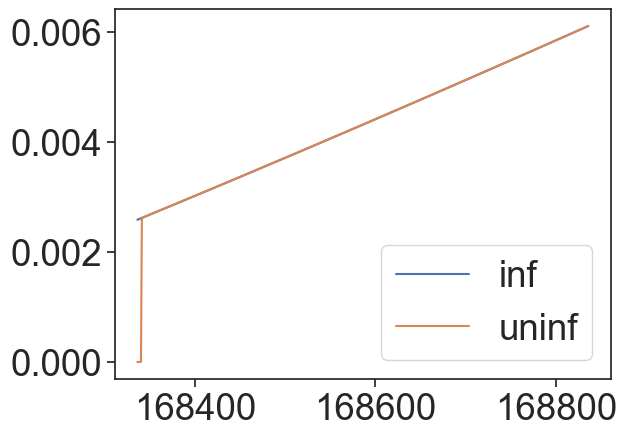

In [1201]:
plt.plot(lZi,label="inf")
plt.plot(lZu,label="uninf")
plt.legend()

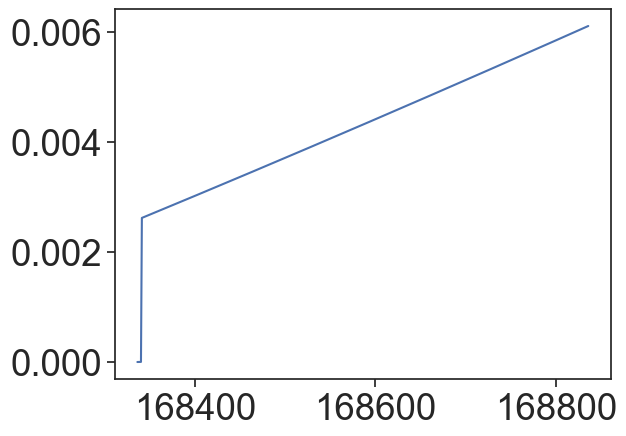

In [1202]:
plt.plot(diff_tab)

In [1203]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


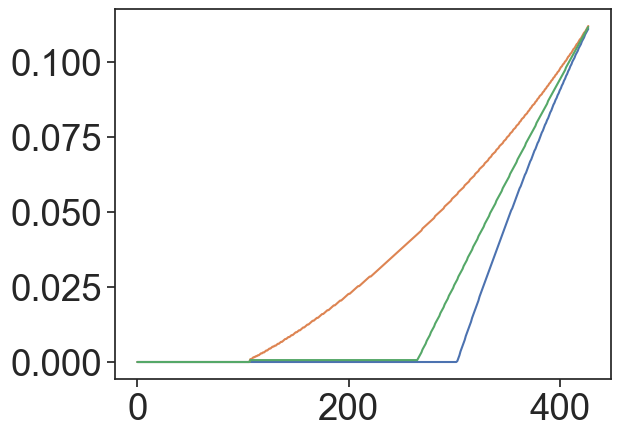

In [1204]:
x_lim=428
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

### Df_flat and plot

In [8]:
y_s = diff_s

#### Pickle

In [1206]:
df = data_frame_tot
#DATA MANIPULATION
g_list = np.sort(df[g2_s].unique())
d_list = np.sort(df[D_s].unique())

len_g = len(g_list)
len_d= len(d_list)

y_tab = np.zeros((len_g,len_d))
d_tab = np.zeros((len_g,len_d))
g_tab = np.zeros((len_g,len_d))

for i_g,g in enumerate(g_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_g][i_d] = df[(df[g2_s]==g) & (df[D_s]==d)][y_s].values[0]
        g_tab[i_g][i_d] = g
        d_tab[i_g][i_d] = d
df_flat = pd.DataFrame({g2_s:g_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

#with lzma.open("../Data_flat/df_spM_Isi_08.xz", "wb") as f:
#        pickle.dump(df_flat, f)

#### Load

In [3]:
with lzma.open("../Data_flat/df_spM_Isi_08.xz", "rb") as f:
    df_flat = pickle.load(f)

In [4]:
df_flat[g2_s].unique()[340:]

array([0.1088 , 0.10912, 0.10944, 0.10976, 0.11008, 0.1104 , 0.11072,
       0.11104, 0.11136, 0.11168, 0.112  , 0.11232, 0.11264, 0.11296,
       0.11328, 0.1136 , 0.11392, 0.11424, 0.11456, 0.11488, 0.1152 ,
       0.11552, 0.11584, 0.11616, 0.11648, 0.1168 , 0.11712, 0.11744,
       0.11776, 0.11808, 0.1184 , 0.11872, 0.11904, 0.11936, 0.11968,
       0.12   , 0.12032, 0.12064, 0.12096, 0.12128, 0.1216 , 0.12192,
       0.12224, 0.12256, 0.12288, 0.1232 , 0.12352, 0.12384, 0.12416,
       0.12448, 0.1248 , 0.12512, 0.12544, 0.12576, 0.12608, 0.1264 ,
       0.12672, 0.12704, 0.12736, 0.12768, 0.128  , 0.12832, 0.12864,
       0.12896, 0.12928, 0.1296 , 0.12992, 0.13024, 0.13056, 0.13088,
       0.1312 , 0.13152, 0.13184, 0.13216, 0.13248, 0.1328 , 0.13312,
       0.13344, 0.13376, 0.13408, 0.1344 , 0.13472, 0.13504, 0.13536,
       0.13568, 0.136  , 0.13632, 0.13664, 0.13696, 0.13728, 0.1376 ,
       0.13792, 0.13824, 0.13856, 0.13888, 0.1392 , 0.13952, 0.13984,
       0.14016, 0.14

In [5]:
df_flat[abs(df_flat[g2_s]-0.0) < 1e-6][410:430]

$\gamma^2$  $\Delta/\rho^2$  $\delta m/\rho$
410         0.0           1.0730     0.000000e+00
411         0.0           1.0733     7.615293e-33
412         0.0           1.0736     7.817160e-33
413         0.0           1.0739     0.000000e+00
414         0.0           1.0742     0.000000e+00
415         0.0           1.0745     0.000000e+00
416         0.0           1.0748     0.000000e+00
417         0.0           1.0751     0.000000e+00
418         0.0           1.0754     0.000000e+00
419         0.0           1.0757     0.000000e+00
420         0.0           1.0760     0.000000e+00
421         0.0           1.0763     0.000000e+00
422         0.0           1.0766     0.000000e+00
423         0.0           1.0769     0.000000e+00
424         0.0           1.0772     7.344057e-33
425         0.0           1.0775     0.000000e+00
426         0.0           1.0778     0.000000e+00
427         0.0           1.0781     7.567854e-33
428         0.0           1.0784    -7.468355e-33
429         0.0           1.0787     0.000000e+00

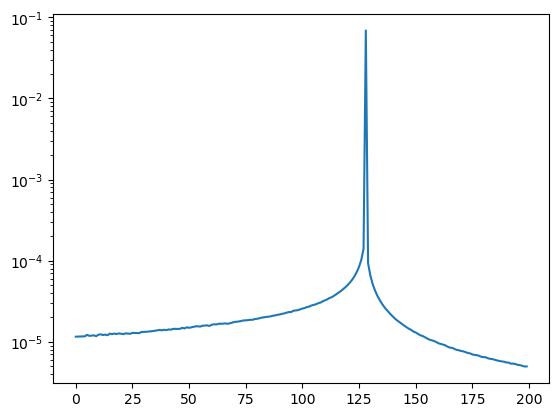

In [6]:
plt.plot(df_flat[abs(df_flat[g2_s]-0.112) < 1e-6][300:500][diff_s].values)
plt.yscale("log")

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_35405/373422656.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(g2_s,D_s,y_s),vmin=0.,vmax=0.5)


NameError: name 'x_lim' is not defined

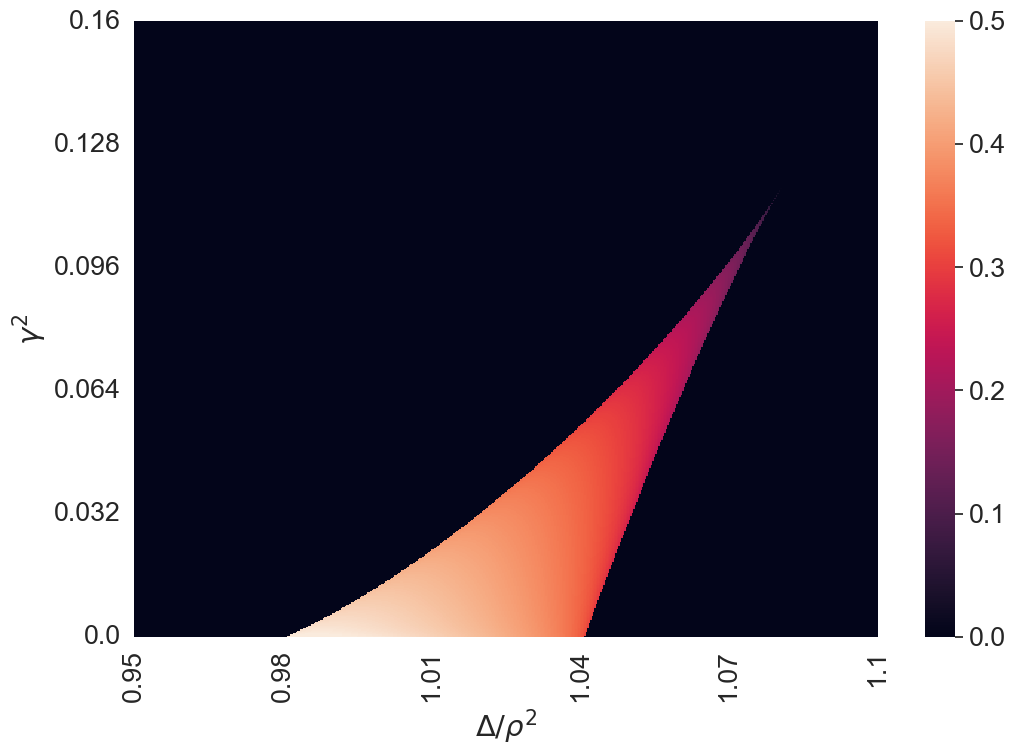

In [9]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike matrix model, Rademacher prior, {rho_s} = 0.0909")
ax = sns.heatmap(df_flat.pivot(g2_s,D_s,y_s),vmin=0.,vmax=0.5)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_ylabel(r"$\gamma^2$")
ax.set_xticks([0,100,200,300,400,500])
ax.set_xticklabels([df_flat[D_s].unique()[0].round(3),df_flat[D_s].unique()[99].round(3),df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[299].round(3),df_flat[D_s].unique()[399].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks([0,100,200,300,400,500])
ax.set_yticklabels([df_flat["$\\gamma^2$"].unique()[0].round(3),df_flat["$\\gamma^2$"].unique()[100].round(3),df_flat["$\\gamma^2$"].unique()[200].round(3),df_flat["$\\gamma^2$"].unique()[300].round(3),df_flat["$\\gamma^2$"].unique()[400].round(3),df_flat["$\\gamma^2$"].unique()[500].round(3)])
ax.plot(np.arange(264,x_lim),IT_tab[264:x_lim]*500/0.16,"--",color="black",lw=3.)
ax.plot(np.arange(302,x_lim-1),sp1_tab[302:x_lim-1]*500/0.16,"--",color="white",lw=2.13)
ax.plot(np.arange(95,x_lim-2),sp2_tab[95:x_lim-2]*500/0.16,"--",color="white",lw=2.13)
plt.tight_layout()
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_rho_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_IsiM_08.png",dpi=600)

##### Compressed image

In [1212]:
D_cut = np.sort(data_frame_tot[D_s].unique())[0::3]
g2_cut = np.sort(data_frame_tot[g2_s].unique())[0::3]
df_cut = df_flat.loc[(df_flat[D_s].isin(D_cut)) & (df_flat[g2_s].isin(g2_cut))]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/2057006150.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_cut.pivot(g2_s,D_s,y_s),vmin=0.,vmax=0.5)


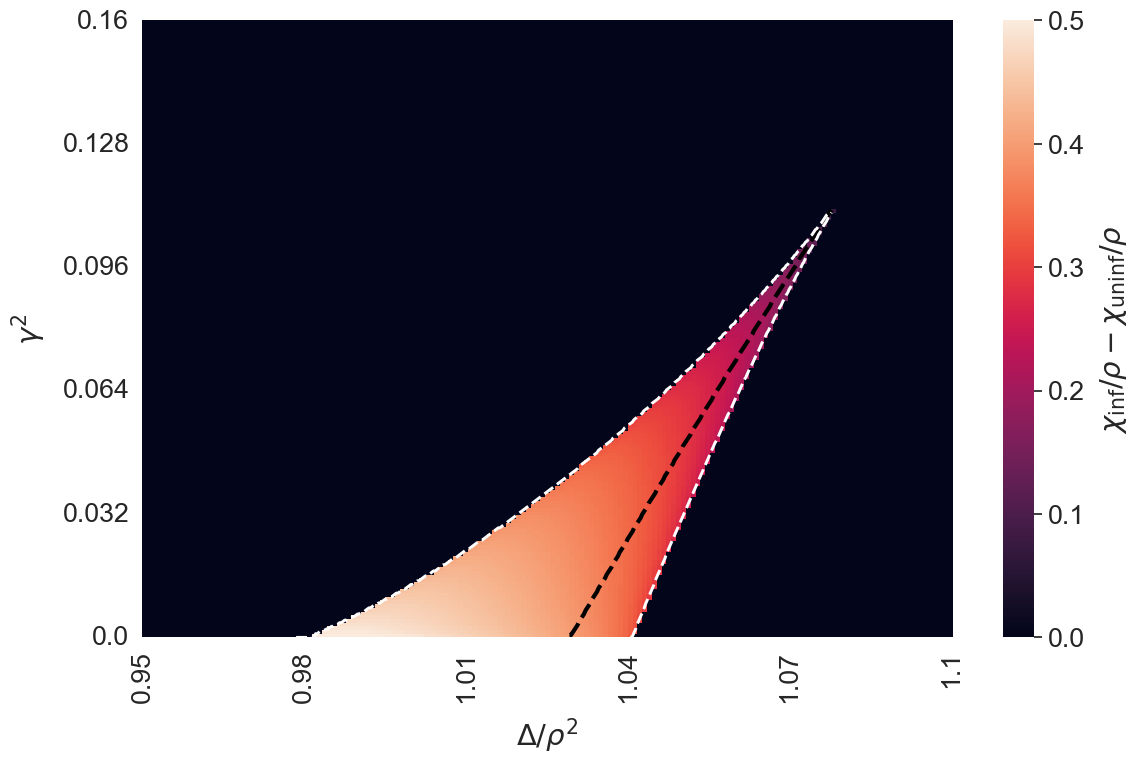

In [1214]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike matrix model, Rademacher prior, {rho_s} = 0.0909")
ax = sns.heatmap(df_cut.pivot(g2_s,D_s,y_s),vmin=0.,vmax=0.5)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_ylabel(r"$\gamma^2$")
ax.set_xticks(np.array([0,100,200,300,400,500])/3)
ax.set_xticklabels([df_flat[D_s].unique()[0].round(3),df_flat[D_s].unique()[99].round(3),df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[299].round(3),df_flat[D_s].unique()[399].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks(np.array([0,100,200,300,400,500])/3)
ax.set_yticklabels([df_flat["$\\gamma^2$"].unique()[0].round(3),df_flat["$\\gamma^2$"].unique()[100].round(3),df_flat["$\\gamma^2$"].unique()[200].round(3),df_flat["$\\gamma^2$"].unique()[300].round(3),df_flat["$\\gamma^2$"].unique()[400].round(3),df_flat["$\\gamma^2$"].unique()[500].round(3)])
ax.plot(np.arange(264,x_lim)/3,(IT_tab[264:x_lim]*500/0.16)/3,"--",color="black",lw=3.)
ax.plot(np.arange(302,x_lim-1)/3,(sp1_tab[302:x_lim-1]*500/0.16)/3,"--",color="white",lw=2.13)
ax.plot(np.arange(95,x_lim-2)/3,(sp2_tab[95:x_lim-2]*500/0.16)/3,"--",color="white",lw=2.13)
plt.tight_layout()
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_rho_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_IsiM_08.pdf")

### Decimation

In [1215]:
T_s = r"$\theta$"

### Skip

In [1216]:
load_dir = "../Data/Data_Sparse/PD_Deci_08/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0  0.000000     0         99999.0       99999.0      1.334518e-32   
1  0.000024     1           609.0         999.0      5.085542e-04   
2  0.000048     2           599.0         959.0      1.007173e-03   
3  0.000072     3           590.0         932.0      1.496606e-03   
4  0.000096     4           581.0         911.0      1.977516e-03   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0    1.569120e-32     2.346015e-33     -4.244375e-65   -5.867820e-65   
1    5.085546e-04     4.095629e-10     -6.687547e-06   -6.687547e-06   
2    1.007174e-03     7.976309e-10     -1.336934e-05   -1.336934e-05   
3    1.496607e-03     1.164131e-09     -2.004548e-05   -2.004548e-05   
4    1.977518e-03     1.522669e-09     -2.671608e-05   -2.671608e-05   

   $\delta logZ$  $\Delta/\rho^2$    $\beta$  Tmin   Tmax   rho   NT  
0  -1.623446e-65            1.049  12.204564   0.0  0.012  0.08  501  
1  -3.985883e-17            1.049  12.204564   0.0  0.012  0.08  501  
2   3.440140e-17            1.049  12.204564   0.0  0.012  0.08  501  
3  -4.747789e-17            1.049  12.204564   0.0  0.012  0.08  501  
4  -2.852807e-18            1.049  12.204564   0.0  0.012  0.08  501

#### Free energy

In [1217]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [1218]:
data_frame_tot[diff_logZ_s] = data_frame_tot[logZi_s] - data_frame_tot[logZu_s]

In [1219]:
D_tab[350:450]

array([1.055 , 1.0553, 1.0556, 1.0559, 1.0562, 1.0565, 1.0568, 1.0571,
       1.0574, 1.0577, 1.058 , 1.0583, 1.0586, 1.0589, 1.0592, 1.0595,
       1.0598, 1.0601, 1.0604, 1.0607, 1.061 , 1.0613, 1.0616, 1.0619,
       1.0622, 1.0625, 1.0628, 1.0631, 1.0634, 1.0637, 1.064 , 1.0643,
       1.0646, 1.0649, 1.0652, 1.0655, 1.0658, 1.0661, 1.0664, 1.0667,
       1.067 , 1.0673, 1.0676, 1.0679, 1.0682, 1.0685, 1.0688, 1.0691,
       1.0694, 1.0697, 1.07  , 1.0703, 1.0706, 1.0709, 1.0712, 1.0715,
       1.0718, 1.0721, 1.0724, 1.0727, 1.073 , 1.0733, 1.0736, 1.0739,
       1.0742, 1.0745, 1.0748, 1.0751, 1.0754, 1.0757, 1.076 , 1.0763,
       1.0766, 1.0769, 1.0772, 1.0775, 1.0778, 1.0781, 1.0784, 1.0787,
       1.079 , 1.0793, 1.0796, 1.0799, 1.0802, 1.0805, 1.0808, 1.0811,
       1.0814, 1.0817, 1.082 , 1.0823, 1.0826, 1.0829, 1.0832, 1.0835,
       1.0838, 1.0841, 1.0844, 1.0847])

In [1220]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==1.0679][diff_logZ_s]

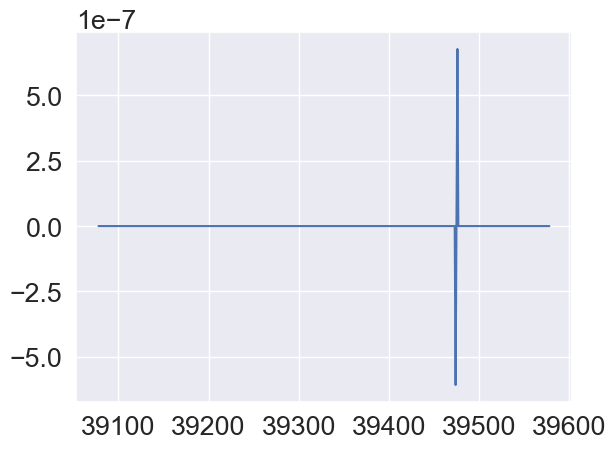

In [1221]:
plt.plot(diff_tab)

In [1222]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-7:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


In [1223]:
IT_tab[339]

0.005592

In [1224]:
D_tab[339]

1.0517

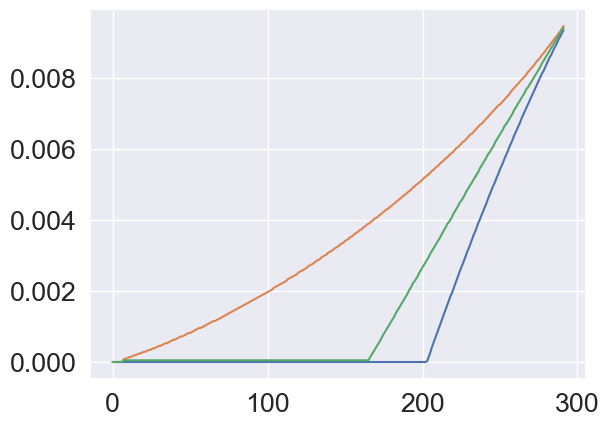

In [1225]:
x_l=100
x_lim=392
plt.plot(sp1_tab[x_l:x_lim],"-")
plt.plot(sp2_tab[x_l:x_lim],"-")
plt.plot(IT_tab[x_l:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

### Df_flat and plot

In [1226]:
y_s = diff_s

#### Pickle

In [387]:
df = data_frame_tot
#DATA MANIPULATION
T_list = np.sort(df[T_s].unique())
d_list = np.sort(df[D_s].unique())

len_T = len(T_list)
len_d= len(d_list)

y_tab = np.zeros((len_T,len_d))
d_tab = np.zeros((len_T,len_d))
T_tab = np.zeros((len_T,len_d))

for i_T,T in enumerate(T_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_T][i_d] = df[(df[T_s]==T) & (df[D_s]==d)][y_s].values[0]
        T_tab[i_T][i_d] = T
        d_tab[i_T][i_d] = d
df_flat = pd.DataFrame({T_s:T_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

#with lzma.open("../Data_flat/df_Deci_spM_08.xz", "wb") as f:
#        pickle.dump(df_flat, f)

#### Load

In [1227]:
with lzma.open("../Data_flat/df_Deci_spM_08.xz", "rb") as f:
    df_flat = pickle.load(f)

In [1228]:
df_flat[T_s].unique()[350:450]

array([0.0084  , 0.008424, 0.008448, 0.008472, 0.008496, 0.00852 ,
       0.008544, 0.008568, 0.008592, 0.008616, 0.00864 , 0.008664,
       0.008688, 0.008712, 0.008736, 0.00876 , 0.008784, 0.008808,
       0.008832, 0.008856, 0.00888 , 0.008904, 0.008928, 0.008952,
       0.008976, 0.009   , 0.009024, 0.009048, 0.009072, 0.009096,
       0.00912 , 0.009144, 0.009168, 0.009192, 0.009216, 0.00924 ,
       0.009264, 0.009288, 0.009312, 0.009336, 0.00936 , 0.009384,
       0.009408, 0.009432, 0.009456, 0.00948 , 0.009504, 0.009528,
       0.009552, 0.009576, 0.0096  , 0.009624, 0.009648, 0.009672,
       0.009696, 0.00972 , 0.009744, 0.009768, 0.009792, 0.009816,
       0.00984 , 0.009864, 0.009888, 0.009912, 0.009936, 0.00996 ,
       0.009984, 0.010008, 0.010032, 0.010056, 0.01008 , 0.010104,
       0.010128, 0.010152, 0.010176, 0.0102  , 0.010224, 0.010248,
       0.010272, 0.010296, 0.01032 , 0.010344, 0.010368, 0.010392,
       0.010416, 0.01044 , 0.010464, 0.010488, 0.010512, 0.010

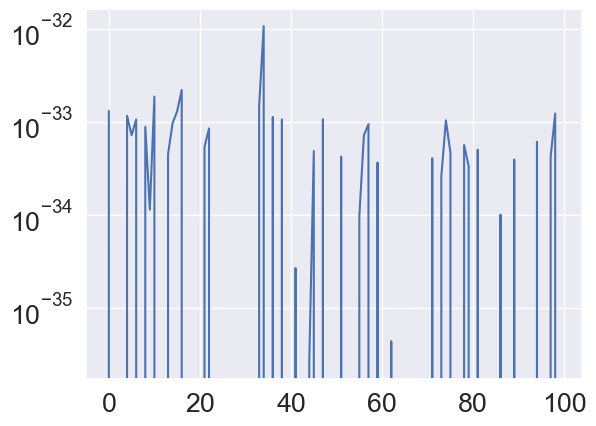

In [1229]:
plt.plot(df_flat[abs(df_flat[T_s]-0.00) < 1e-6][350:450][diff_s].values)
plt.yscale("log")

In [1230]:
df_flat[abs(df_flat[T_s]-0.0096) < 1e-6][350:400]

$\theta$  $\Delta/\rho^2$  $\delta m/\rho$
200750    0.0096           1.0550     2.019415e-07
200751    0.0096           1.0553     2.054335e-07
200752    0.0096           1.0556     2.074041e-07
200753    0.0096           1.0559     2.079876e-07
200754    0.0096           1.0562     2.142768e-07
200755    0.0096           1.0565     2.125294e-07
200756    0.0096           1.0568     2.167450e-07
200757    0.0096           1.0571     2.201989e-07
200758    0.0096           1.0574     2.265112e-07
200759    0.0096           1.0577     2.290245e-07
200760    0.0096           1.0580     2.314143e-07
200761    0.0096           1.0583     2.339514e-07
200762    0.0096           1.0586     2.369004e-07
200763    0.0096           1.0589     2.439114e-07
200764    0.0096           1.0592     2.452892e-07
200765    0.0096           1.0595     2.514417e-07
200766    0.0096           1.0598     2.561438e-07
200767    0.0096           1.0601     2.599074e-07
200768    0.0096           1.0604     2.665508e-07
200769    0.0096           1.0607     2.701823e-07
200770    0.0096           1.0610     2.779989e-07
200771    0.0096           1.0613     2.843603e-07
200772    0.0096           1.0616     2.933949e-07
200773    0.0096           1.0619     2.998266e-07
200774    0.0096           1.0622     3.081504e-07
200775    0.0096           1.0625     3.166918e-07
200776    0.0096           1.0628     3.272618e-07
200777    0.0096           1.0631     3.326604e-07
200778    0.0096           1.0634     3.479265e-07
200779    0.0096           1.0637     3.577082e-07
200780    0.0096           1.0640     3.721585e-07
200781    0.0096           1.0643     3.871365e-07
200782    0.0096           1.0646     4.060085e-07
200783    0.0096           1.0649     4.222068e-07
200784    0.0096           1.0652     4.468862e-07
200785    0.0096           1.0655     4.717877e-07
200786    0.0096           1.0658     5.040113e-07
200787    0.0096           1.0661     5.408516e-07
200788    0.0096           1.0664     5.889424e-07
200789    0.0096           1.0667     6.510955e-07
200790    0.0096           1.0670     7.280665e-07
200791    0.0096           1.0673     8.489615e-07
200792    0.0096           1.0676     1.040773e-06
200793    0.0096           1.0679     1.437744e-06
200794    0.0096           1.0682     6.489355e-02
200795    0.0096           1.0685     9.977564e-07
200796    0.0096           1.0688     6.878326e-07
200797    0.0096           1.0691     5.369029e-07
200798    0.0096           1.0694     4.476717e-07
200799    0.0096           1.0697     3.860316e-07

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/2963849292.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(T_s,D_s,y_s),vmin=0.,vmax=0.5)


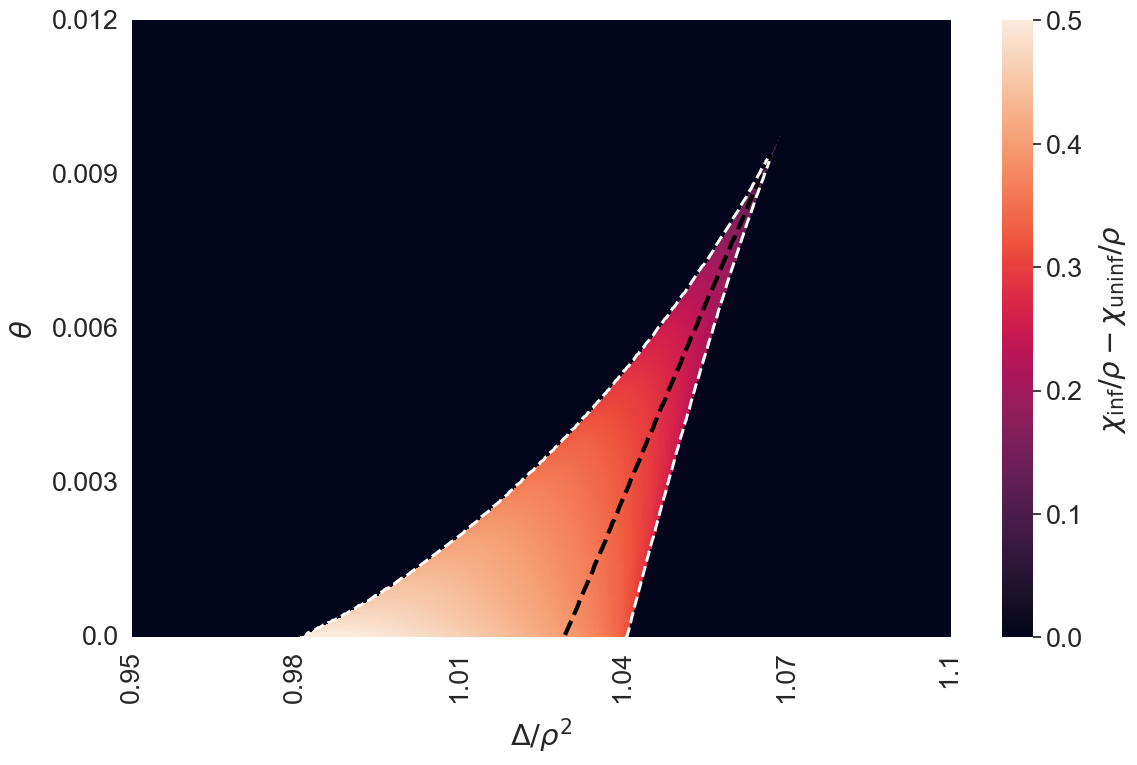

In [1231]:
x_lim=392
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_flat.pivot(T_s,D_s,y_s),vmin=0.,vmax=0.5)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks([0,100,200,300,400,500])
ax.set_xticklabels([df_flat[D_s].unique()[0].round(3),df_flat[D_s].unique()[100].round(3),df_flat[D_s].unique()[200].round(3),df_flat[D_s].unique()[300].round(3),df_flat[D_s].unique()[400].round(3),df_flat[D_s].unique()[500].round(3)])
ax.set_yticks([0,125,250,375,500])
ax.set_yticklabels([df_flat[T_s].unique()[0].round(3),df_flat[T_s].unique()[125].round(3),df_flat[T_s].unique()[250].round(3),df_flat[T_s].unique()[375].round(3),df_flat[T_s].unique()[500].round(3)])
ax.plot(np.arange(265,x_lim),IT_tab[265:x_lim]*501/0.012,"--",color="black",lw=3.)
ax.plot(np.arange(302,x_lim-1),sp1_tab[302:x_lim-1]*501/0.012,"--",color="white",lw=2.15)
ax.plot(np.arange(104,x_lim-2),sp2_tab[104:x_lim-2]*501/0.012,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_rho_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
fig.savefig(f"../Figures/PhD_Deci_SpM_08.png", dpi=600)

##### Compressed image

In [1232]:
D_cut = np.sort(data_frame_tot[D_s].unique())[0::3]
T_cut = np.sort(data_frame_tot[T_s].unique())[0::3]
df_cut = df_flat.loc[(df_flat[D_s].isin(D_cut)) & (df_flat[T_s].isin(T_cut))]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/3148721094.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_cut.pivot(T_s,D_s,y_s),vmin=0.,vmax=0.5)


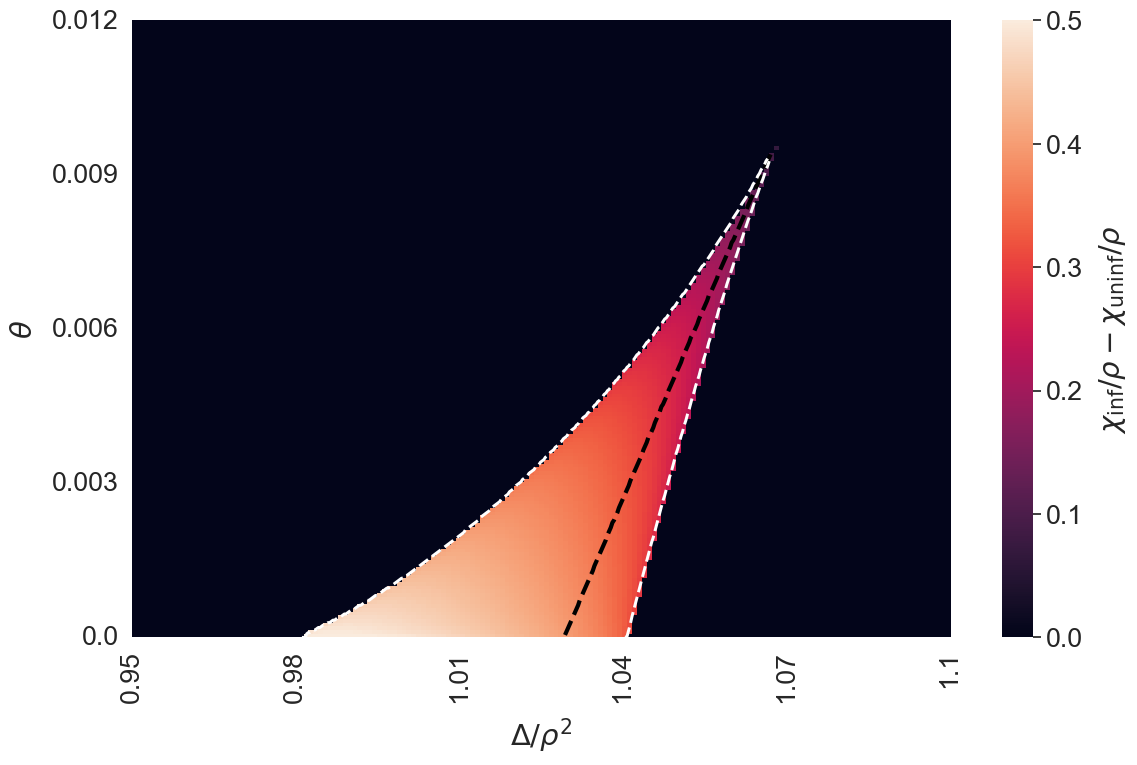

In [1233]:
x_lim=392
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_cut.pivot(T_s,D_s,y_s),vmin=0.,vmax=0.5)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks(np.array([0,100,200,300,400,500])/3)
ax.set_xticklabels([df_flat[D_s].unique()[0].round(3),df_flat[D_s].unique()[100].round(3),df_flat[D_s].unique()[200].round(3),df_flat[D_s].unique()[300].round(3),df_flat[D_s].unique()[400].round(3),df_flat[D_s].unique()[500].round(3)])
ax.set_yticks(np.array([0,125,250,375,500])/3)
ax.set_yticklabels([df_flat[T_s].unique()[0].round(3),df_flat[T_s].unique()[125].round(3),df_flat[T_s].unique()[250].round(3),df_flat[T_s].unique()[375].round(3),df_flat[T_s].unique()[500].round(3)])
ax.plot(np.arange(265,x_lim)/3,(IT_tab[265:x_lim]*501/0.012)/3,"--",color="black",lw=3.)
ax.plot(np.arange(302,x_lim-1)/3,(sp1_tab[302:x_lim-1]*501/0.012)/3,"--",color="white",lw=2.15)
ax.plot(np.arange(104,x_lim-2)/3,(sp2_tab[104:x_lim-2]*501/0.012)/3,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_rho_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
fig.savefig(f"../Figures/PhD_Deci_SpM_08.pdf")

# Ising 3-spin

### Skip

In [56]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_SparseT/PDlogZ/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0      0.0000     0           146.0          79.0          0.000000   
1      0.0005     1            20.0          79.0          0.000501   
2      0.0010     2            20.0          79.0          0.001002   
3      0.0015     3            20.0          79.0          0.001505   
4      0.0020     4            20.0          78.0          0.002010   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.783563         0.783563      0.000000e+00       -0.009413   
1        0.783821         0.783321      6.253240e-08       -0.009217   
2        0.784079         0.783076      2.503692e-07       -0.009021   
3        0.784335         0.782829      5.638167e-07       -0.008825   
4        0.784590         0.782580      1.003183e-06       -0.008629   

   $\Delta/\rho^2$   $\beta$  gmin  gmax  rho   Ng  
0            0.292  1.850583   0.0   0.5  1.0  501  
1            0.292  1.850583   0.0   0.5  1.0  501  
2            0.292  1.850583   0.0   0.5  1.0  501  
3            0.292  1.850583   0.0   0.5  1.0  501  
4            0.292  1.850583   0.0   0.5  1.0  501

#### Free energy

In [57]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"


In [58]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.32][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.32][logZu_s]

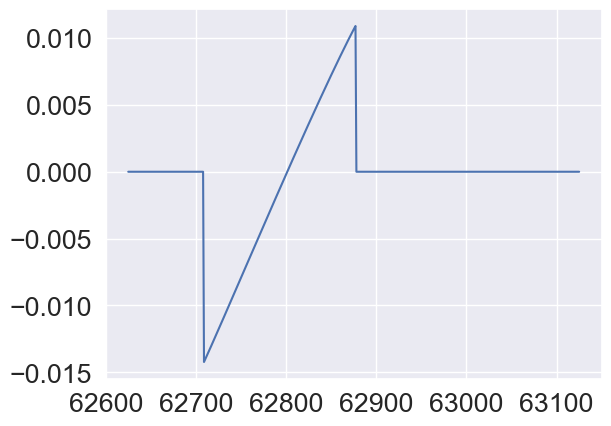

In [59]:
plt.plot(diff_tab)

In [60]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


In [61]:
IT_tab[339]

0.1265

In [62]:
g_tab[222]

0.111

In [63]:
D_tab[339]

0.34

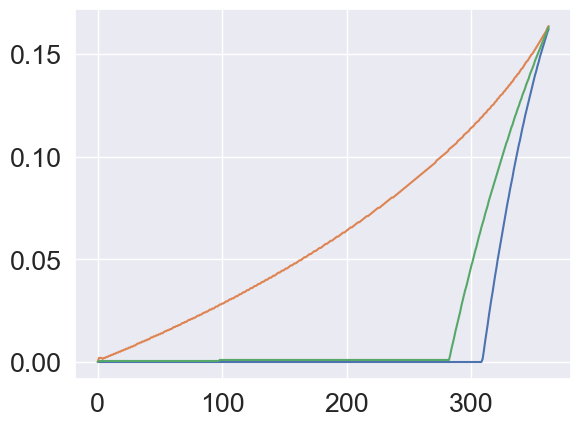

In [64]:
x_lim=363
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

### Df_flat and plot

In [65]:
y_s = diff_s

#### Pickle

In [ ]:
df = data_frame_tot
#DATA MANIPULATION
g_list = np.sort(df[g2_s].unique())
d_list = np.sort(df[D_s].unique())

len_g = len(g_list)
len_d= len(d_list)

y_tab = np.zeros((len_g,len_d))
d_tab = np.zeros((len_g,len_d))
g_tab = np.zeros((len_g,len_d))

for i_g,g in enumerate(g_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_g][i_d] = df[(df[g2_s]==g) & (df[D_s]==d)][y_s].values[0]
        g_tab[i_g][i_d] = g
        d_tab[i_g][i_d] = d
df_flat = pd.DataFrame({g2_s:g_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

#with lzma.open("./Data_flat/df_spT_Isi.xz", "wb") as f:
#        pickle.dump(df_flat, f)

#### Load

In [276]:
with lzma.open("../Data_flat/df_spT_Isi.xz", "rb") as f:
    df_flat = pickle.load(f)

In [277]:
df_flat[g2_s].unique()[340:]

array([0.17  , 0.1705, 0.171 , 0.1715, 0.172 , 0.1725, 0.173 , 0.1735,
       0.174 , 0.1745, 0.175 , 0.1755, 0.176 , 0.1765, 0.177 , 0.1775,
       0.178 , 0.1785, 0.179 , 0.1795, 0.18  , 0.1805, 0.181 , 0.1815,
       0.182 , 0.1825, 0.183 , 0.1835, 0.184 , 0.1845, 0.185 , 0.1855,
       0.186 , 0.1865, 0.187 , 0.1875, 0.188 , 0.1885, 0.189 , 0.1895,
       0.19  , 0.1905, 0.191 , 0.1915, 0.192 , 0.1925, 0.193 , 0.1935,
       0.194 , 0.1945, 0.195 , 0.1955, 0.196 , 0.1965, 0.197 , 0.1975,
       0.198 , 0.1985, 0.199 , 0.1995, 0.2   , 0.2005, 0.201 , 0.2015,
       0.202 , 0.2025, 0.203 , 0.2035, 0.204 , 0.2045, 0.205 , 0.2055,
       0.206 , 0.2065, 0.207 , 0.2075, 0.208 , 0.2085, 0.209 , 0.2095,
       0.21  , 0.2105, 0.211 , 0.2115, 0.212 , 0.2125, 0.213 , 0.2135,
       0.214 , 0.2145, 0.215 , 0.2155, 0.216 , 0.2165, 0.217 , 0.2175,
       0.218 , 0.2185, 0.219 , 0.2195, 0.22  , 0.2205, 0.221 , 0.2215,
       0.222 , 0.2225, 0.223 , 0.2235, 0.224 , 0.2245, 0.225 , 0.2255,
      

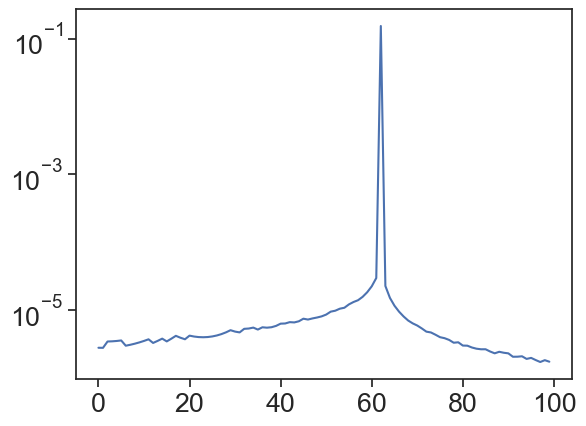

In [278]:
plt.plot(df_flat[abs(df_flat[g2_s]-0.163) < 1e-6][300:400][diff_s].values)
plt.yscale("log")

In [279]:
df_flat[abs(df_flat[g2_s]-0.163) < 1e-6][340:380]

$\gamma^2$  $\Delta/\rho^2$  $\delta m/\rho$
130740       0.163            0.341         0.000006
130741       0.163            0.342         0.000006
130742       0.163            0.343         0.000007
130743       0.163            0.344         0.000007
130744       0.163            0.345         0.000007
130745       0.163            0.346         0.000007
130746       0.163            0.347         0.000007
130747       0.163            0.348         0.000008
130748       0.163            0.349         0.000008
130749       0.163            0.350         0.000008
130750       0.163            0.351         0.000009
130751       0.163            0.352         0.000009
130752       0.163            0.353         0.000010
130753       0.163            0.354         0.000010
130754       0.163            0.355         0.000011
130755       0.163            0.356         0.000012
130756       0.163            0.357         0.000013
130757       0.163            0.358         0.000014
130758       0.163            0.359         0.000016
130759       0.163            0.360         0.000018
130760       0.163            0.361         0.000022
130761       0.163            0.362         0.000030
130762       0.163            0.363         0.153018
130763       0.163            0.364         0.000023
130764       0.163            0.365         0.000015
130765       0.163            0.366         0.000012
130766       0.163            0.367         0.000009
130767       0.163            0.368         0.000008
130768       0.163            0.369         0.000007
130769       0.163            0.370         0.000006
130770       0.163            0.371         0.000006
130771       0.163            0.372         0.000005
130772       0.163            0.373         0.000005
130773       0.163            0.374         0.000005
130774       0.163            0.375         0.000004
130775       0.163            0.376         0.000004
130776       0.163            0.377         0.000004
130777       0.163            0.378         0.000004
130778       0.163            0.379         0.000003
130779       0.163            0.380         0.000003

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/2081455202.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)


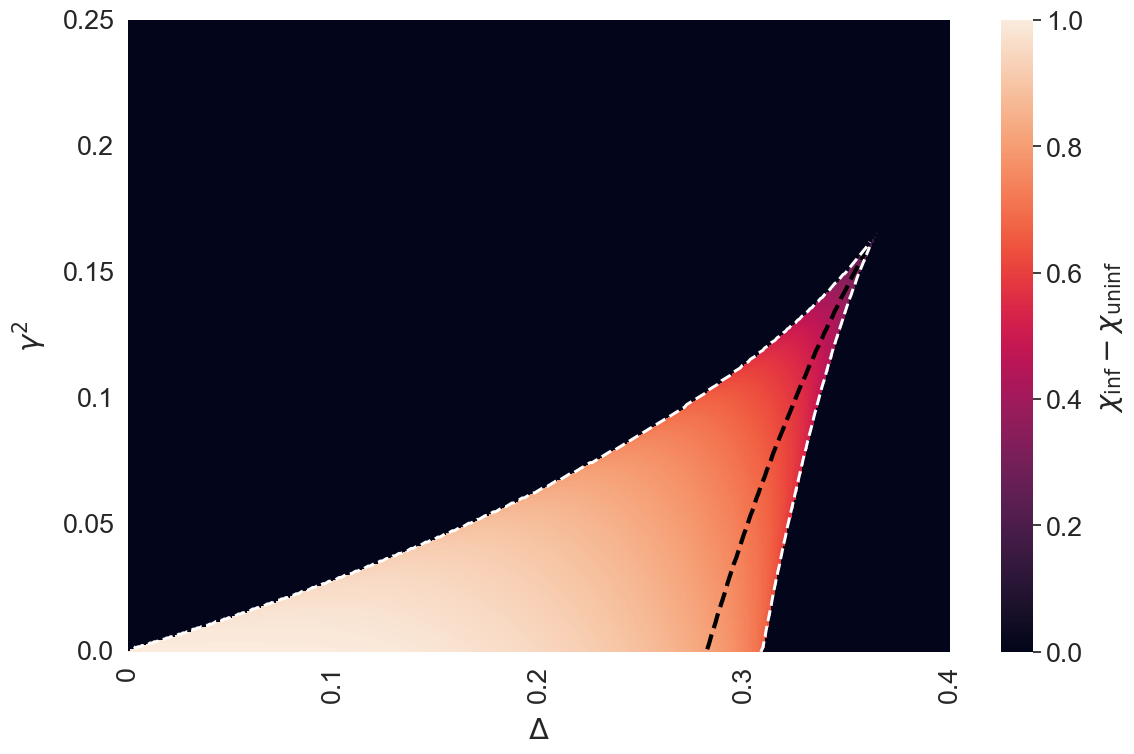

In [70]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_flat.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks([0,100,200,300,400])
ax.set_xticklabels([0,df_flat[D_s].unique()[99].round(3),df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[299].round(3),df_flat[D_s].unique()[399].round(3)])
ax.set_yticks([0,100,200,300,400,500])
ax.set_yticklabels([df_flat["$\\gamma^2$"].unique()[0].round(3),df_flat["$\\gamma^2$"].unique()[100].round(3),df_flat["$\\gamma^2$"].unique()[200].round(3),df_flat["$\\gamma^2$"].unique()[300].round(3),df_flat["$\\gamma^2$"].unique()[400].round(3),df_flat["$\\gamma^2$"].unique()[500].round(3)])
ax.plot(np.arange(282,x_lim),IT_tab[282:x_lim]*500/0.25,"--",color="black",lw=3.)
ax.plot(np.arange(308,x_lim-1),sp1_tab[308:x_lim-1]*500/0.25,"--",color="white",lw=2.15)
ax.plot(np.arange(3,x_lim-1),sp2_tab[3:x_lim-1]*500/0.25,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_IsiT.png", dpi=600)

##### Compressed image

In [71]:
D_cut = np.sort(data_frame_tot[D_s].unique())[0::3]
g2_cut = np.sort(data_frame_tot[g2_s].unique())[0::3]
df_cut = df_flat.loc[(df_flat[D_s].isin(D_cut)) & (df_flat[g2_s].isin(g2_cut))]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/808524879.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_cut.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)


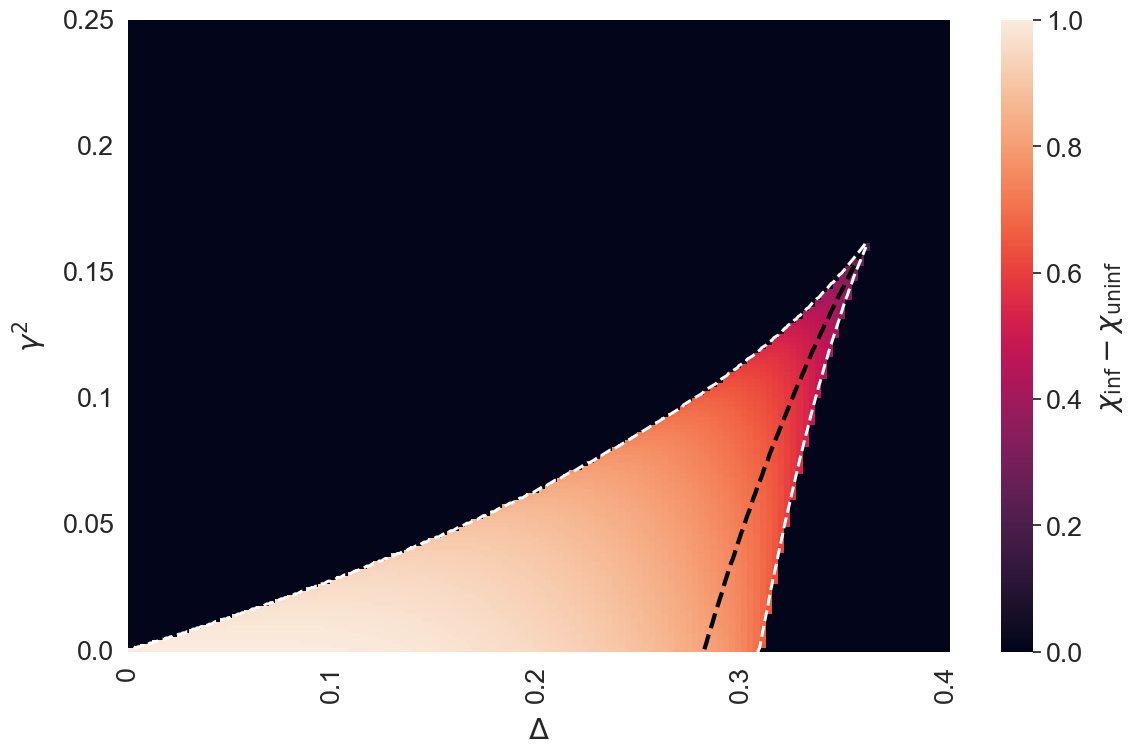

In [74]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_cut.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks(np.array([0,100,200,300,400])/3)
ax.set_xticklabels([0,df_flat[D_s].unique()[99].round(3),df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[299].round(3),df_flat[D_s].unique()[399].round(3)])
ax.set_yticks(np.array([0,100,200,300,400,500])/3)
ax.set_yticklabels([df_flat["$\\gamma^2$"].unique()[0].round(3),df_flat["$\\gamma^2$"].unique()[100].round(3),df_flat["$\\gamma^2$"].unique()[200].round(3),df_flat["$\\gamma^2$"].unique()[300].round(3),df_flat["$\\gamma^2$"].unique()[400].round(3),df_flat["$\\gamma^2$"].unique()[500].round(3)])
ax.plot((np.arange(282,x_lim))/3,(IT_tab[282:x_lim]*500/0.25)/3,"--",color="black",lw=3.)
ax.plot((np.arange(308,x_lim-1))/3,(sp1_tab[308:x_lim-1]*500/0.25)/3,"--",color="white",lw=2.15)
ax.plot((np.arange(3,x_lim-1))/3,(sp2_tab[3:x_lim-1]*500/0.25)/3,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_IsiT.pdf")

### Decimation

In [75]:
T_s = r"$\theta$"

### Skip

In [76]:
load_dir = "../Data/Data_SparseT/PD_Deci_logZ/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0    0.0000     0           146.0         248.0          0.000000   
1    0.0004     1            19.0         114.0          0.000401   
2    0.0008     2            20.0         114.0          0.000802   
3    0.0012     3            20.0         115.0          0.001205   
4    0.0016     4            20.0         116.0          0.001608   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.000000     0.000000e+00      0.000000e+00    0.000000e+00   
1        0.000401     6.980114e-10      3.388694e-11    3.388701e-11   
2        0.000802     1.202498e-09      2.716884e-10    2.716884e-10   
3        0.001205     1.727205e-09      9.187896e-10    9.187896e-10   
4        0.001608     2.432146e-09      2.182156e-09    2.182156e-09   

   $\delta logZ$  $\Delta/\rho^2$   $\beta$  Tmin  Tmax  rho   NT  
0   0.000000e+00           0.3152  1.781176   0.0   0.2  1.0  501  
1   7.739688e-17           0.3152  1.781176   0.0   0.2  1.0  501  
2   4.673791e-17           0.3152  1.781176   0.0   0.2  1.0  501  
3   1.989256e-18           0.3152  1.781176   0.0   0.2  1.0  501  
4  -4.423131e-17           0.3152  1.781176   0.0   0.2  1.0  501

#### Free energy

In [77]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [78]:
D_tab[400:500]

array([0.3208, 0.3216, 0.3224, 0.3232, 0.324 , 0.3248, 0.3256, 0.3264,
       0.3272, 0.328 , 0.3288, 0.3296, 0.3304, 0.3312, 0.332 , 0.3328,
       0.3336, 0.3344, 0.3352, 0.336 , 0.3368, 0.3376, 0.3384, 0.3392,
       0.34  , 0.3408, 0.3416, 0.3424, 0.3432, 0.344 , 0.3448, 0.3456,
       0.3464, 0.3472, 0.348 , 0.3488, 0.3496, 0.3504, 0.3512, 0.352 ,
       0.3528, 0.3536, 0.3544, 0.3552, 0.356 , 0.3568, 0.3576, 0.3584,
       0.3592, 0.36  , 0.3608, 0.3616, 0.3624, 0.3632, 0.364 , 0.3648,
       0.3656, 0.3664, 0.3672, 0.368 , 0.3688, 0.3696, 0.3704, 0.3712,
       0.372 , 0.3728, 0.3736, 0.3744, 0.3752, 0.376 , 0.3768, 0.3776,
       0.3784, 0.3792, 0.38  , 0.3808, 0.3816, 0.3824, 0.3832, 0.384 ,
       0.3848, 0.3856, 0.3864, 0.3872, 0.388 , 0.3888, 0.3896, 0.3904,
       0.3912, 0.392 , 0.3928, 0.3936, 0.3944, 0.3952, 0.396 , 0.3968,
       0.3976, 0.3984, 0.3992, 0.4   ])

In [79]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.380][diff_logZ_s]

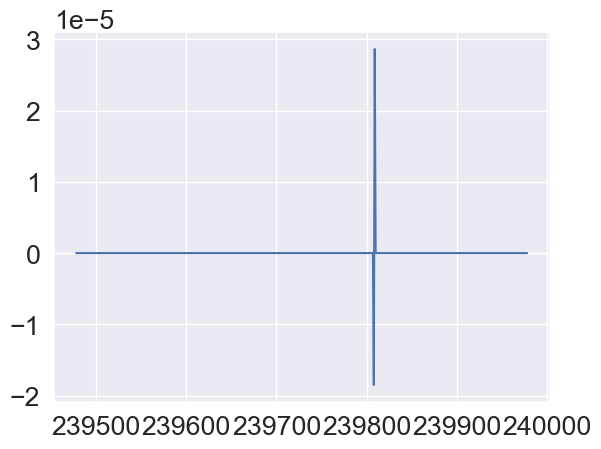

In [80]:
plt.plot(diff_tab)

In [81]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


In [82]:
IT_tab[339]

0.0008

In [83]:
D_tab[339]

0.272

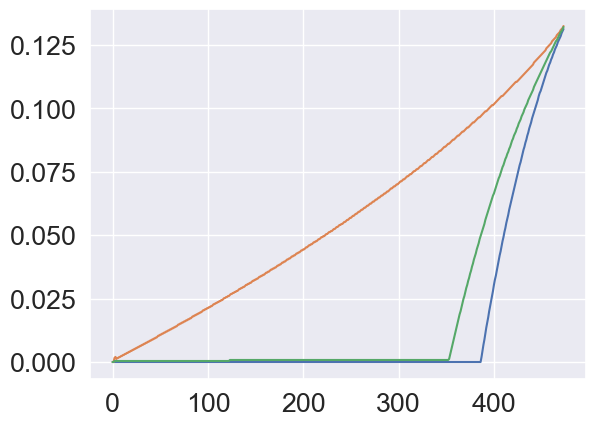

In [84]:
x_lim=474
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

### Df_flat and plot

In [85]:
y_s = diff_s

#### Pickle

In [44]:
df = data_frame_tot
#DATA MANIPULATION
T_list = np.sort(df[T_s].unique())
d_list = np.sort(df[D_s].unique())

len_T = len(T_list)
len_d= len(d_list)

y_tab = np.zeros((len_T,len_d))
d_tab = np.zeros((len_T,len_d))
T_tab = np.zeros((len_T,len_d))

for i_T,T in enumerate(T_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_T][i_d] = df[(df[T_s]==T) & (df[D_s]==d)][y_s].values[0]
        T_tab[i_T][i_d] = T
        d_tab[i_T][i_d] = d
df_flat = pd.DataFrame({T_s:T_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

with lzma.open("../Data_flat/df_Deci_spT_Isi.xz", "wb") as f:
        pickle.dump(df_flat, f)

In [45]:
data_frame_tot

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0         0.0000     0           146.0         248.0          0.000000   
1         0.0004     1            19.0         114.0          0.000401   
2         0.0008     2            20.0         114.0          0.000802   
3         0.0012     3            20.0         115.0          0.001205   
4         0.0016     4            20.0         116.0          0.001608   
...          ...   ...             ...           ...               ...   
250495    0.1984   496            26.0          14.0          0.991170   
250496    0.1988   497            26.0          14.0          0.991174   
250497    0.1992   498            26.0          14.0          0.991179   
250498    0.1996   499            26.0          14.0          0.991184   
250499    0.2000   500            26.0          14.0          0.991189   

        $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0             0.000000     0.000000e+00      0.000000e+00    0.000000e+00   
1             0.000401     6.980114e-10      3.388694e-11    3.388701e-11   
2             0.000802     1.202498e-09      2.716884e-10    2.716884e-10   
3             0.001205     1.727205e-09      9.187896e-10    9.187896e-10   
4             0.001608     2.432146e-09      2.182156e-09    2.182156e-09   
...                ...              ...               ...             ...   
250495        0.991171     1.669794e-06      6.776649e-01    6.776649e-01   
250496        0.991176     1.663285e-06      6.779382e-01    6.779382e-01   
250497        0.991181     1.656828e-06      6.782114e-01    6.782114e-01   
250498        0.991186     1.650424e-06      6.784846e-01    6.784846e-01   
250499        0.991190     1.644071e-06      6.787578e-01    6.787578e-01   

        $\delta logZ$  $\Delta/\rho^2$   $\beta$  Tmin  Tmax  rho   NT  
0        0.000000e+00           0.3152  1.781176   0.0   0.2  1.0  501  
1        7.739688e-17           0.3152  1.781176   0.0   0.2  1.0  501  
2        4.673791e-17           0.3152  1.781176   0.0   0.2  1.0  501  
3        1.989256e-18           0.3152  1.781176   0.0   0.2  1.0  501  
4       -4.423131e-17           0.3152  1.781176   0.0   0.2  1.0  501  
...               ...              ...       ...   ...   ...  ...  ...  
250495   8.903989e-13           0.1360  2.711631   0.0   0.2  1.0  501  
250496   8.602008e-13           0.1360  2.711631   0.0   0.2  1.0  501  
250497   8.300027e-13           0.1360  2.711631   0.0   0.2  1.0  501  
250498   7.993606e-13           0.1360  2.711631   0.0   0.2  1.0  501  
250499   7.709389e-13           0.1360  2.711631   0.0   0.2  1.0  501  

[250500 rows x 16 columns]

#### Load

In [86]:
with lzma.open("../Data_flat/df_Deci_spT_Isi.xz", "rb") as f:
    df_flat = pickle.load(f)

In [87]:
df_flat[T_s].unique()[340:]

array([0.136 , 0.1364, 0.1368, 0.1372, 0.1376, 0.138 , 0.1384, 0.1388,
       0.1392, 0.1396, 0.14  , 0.1404, 0.1408, 0.1412, 0.1416, 0.142 ,
       0.1424, 0.1428, 0.1432, 0.1436, 0.144 , 0.1444, 0.1448, 0.1452,
       0.1456, 0.146 , 0.1464, 0.1468, 0.1472, 0.1476, 0.148 , 0.1484,
       0.1488, 0.1492, 0.1496, 0.15  , 0.1504, 0.1508, 0.1512, 0.1516,
       0.152 , 0.1524, 0.1528, 0.1532, 0.1536, 0.154 , 0.1544, 0.1548,
       0.1552, 0.1556, 0.156 , 0.1564, 0.1568, 0.1572, 0.1576, 0.158 ,
       0.1584, 0.1588, 0.1592, 0.1596, 0.16  , 0.1604, 0.1608, 0.1612,
       0.1616, 0.162 , 0.1624, 0.1628, 0.1632, 0.1636, 0.164 , 0.1644,
       0.1648, 0.1652, 0.1656, 0.166 , 0.1664, 0.1668, 0.1672, 0.1676,
       0.168 , 0.1684, 0.1688, 0.1692, 0.1696, 0.17  , 0.1704, 0.1708,
       0.1712, 0.1716, 0.172 , 0.1724, 0.1728, 0.1732, 0.1736, 0.174 ,
       0.1744, 0.1748, 0.1752, 0.1756, 0.176 , 0.1764, 0.1768, 0.1772,
       0.1776, 0.178 , 0.1784, 0.1788, 0.1792, 0.1796, 0.18  , 0.1804,
      

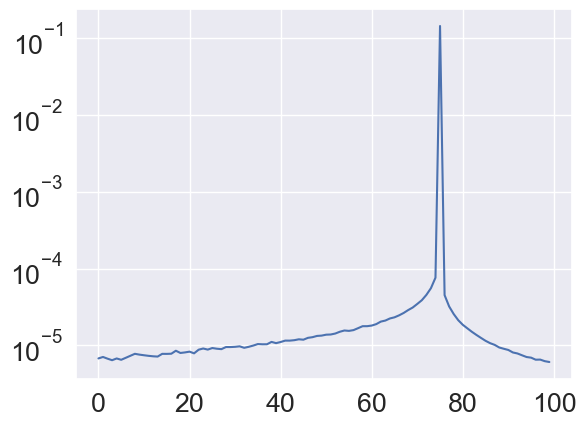

In [88]:
plt.plot(df_flat[abs(df_flat[T_s]-0.1328) < 1e-6][400:500][diff_s].values)
plt.yscale("log")

In [89]:
df_flat[abs(df_flat[T_s]-0.1328) < 1e-6][450:500]

$\theta$  $\Delta/\rho^2$  $\delta m/\rho$
166450    0.1328           0.3608         0.000014
166451    0.1328           0.3616         0.000014
166452    0.1328           0.3624         0.000014
166453    0.1328           0.3632         0.000015
166454    0.1328           0.3640         0.000016
166455    0.1328           0.3648         0.000015
166456    0.1328           0.3656         0.000016
166457    0.1328           0.3664         0.000017
166458    0.1328           0.3672         0.000018
166459    0.1328           0.3680         0.000018
166460    0.1328           0.3688         0.000018
166461    0.1328           0.3696         0.000019
166462    0.1328           0.3704         0.000020
166463    0.1328           0.3712         0.000021
166464    0.1328           0.3720         0.000022
166465    0.1328           0.3728         0.000023
166466    0.1328           0.3736         0.000025
166467    0.1328           0.3744         0.000026
166468    0.1328           0.3752         0.000029
166469    0.1328           0.3760         0.000031
166470    0.1328           0.3768         0.000035
166471    0.1328           0.3776         0.000039
166472    0.1328           0.3784         0.000046
166473    0.1328           0.3792         0.000056
166474    0.1328           0.3800         0.000076
166475    0.1328           0.3808         0.143930
166476    0.1328           0.3816         0.000045
166477    0.1328           0.3824         0.000032
166478    0.1328           0.3832         0.000026
166479    0.1328           0.3840         0.000021
166480    0.1328           0.3848         0.000019
166481    0.1328           0.3856         0.000017
166482    0.1328           0.3864         0.000015
166483    0.1328           0.3872         0.000014
166484    0.1328           0.3880         0.000013
166485    0.1328           0.3888         0.000011
166486    0.1328           0.3896         0.000011
166487    0.1328           0.3904         0.000010
166488    0.1328           0.3912         0.000009
166489    0.1328           0.3920         0.000009
166490    0.1328           0.3928         0.000009
166491    0.1328           0.3936         0.000008
166492    0.1328           0.3944         0.000008
166493    0.1328           0.3952         0.000007
166494    0.1328           0.3960         0.000007
166495    0.1328           0.3968         0.000007
166496    0.1328           0.3976         0.000007
166497    0.1328           0.3984         0.000007
166498    0.1328           0.3992         0.000006
166499    0.1328           0.4000         0.000006

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/895566343.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)


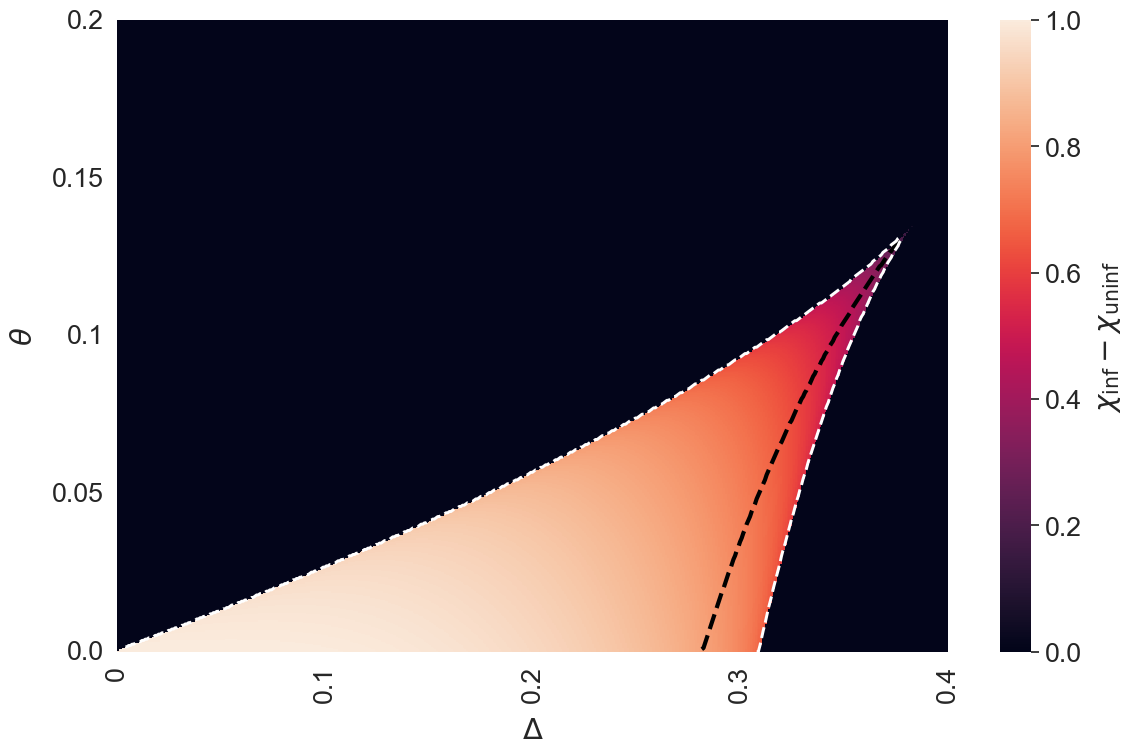

In [90]:
x_lim=474
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_flat.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks([0,125,250,375,500])
ax.set_xticklabels([0,df_flat[D_s].unique()[124].round(3),df_flat[D_s].unique()[249].round(3),df_flat[D_s].unique()[374].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks([0,125,250,375,500])
ax.set_yticklabels([df_flat[T_s].unique()[0].round(3),df_flat[T_s].unique()[125].round(3),df_flat[T_s].unique()[250].round(3),df_flat[T_s].unique()[375].round(3),df_flat[T_s].unique()[500].round(3)])
ax.plot(np.arange(352,x_lim),IT_tab[352:x_lim]*501/0.2,"--",color="black",lw=3.)
ax.plot(np.arange(385,x_lim-1),sp1_tab[385:x_lim-1]*501/0.2,"--",color="white",lw=2.15)
ax.plot(np.arange(5,x_lim-2),sp2_tab[5:x_lim-2]*501/0.2,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_Deci_IsiT.png", dpi=600)

##### Compressed image

In [91]:
D_cut = np.sort(data_frame_tot[D_s].unique())[0::3]
T_cut = np.sort(data_frame_tot[T_s].unique())[0::3]
df_cut = df_flat.loc[(df_flat[D_s].isin(D_cut)) & (df_flat[T_s].isin(T_cut))]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/1436561799.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_cut.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)


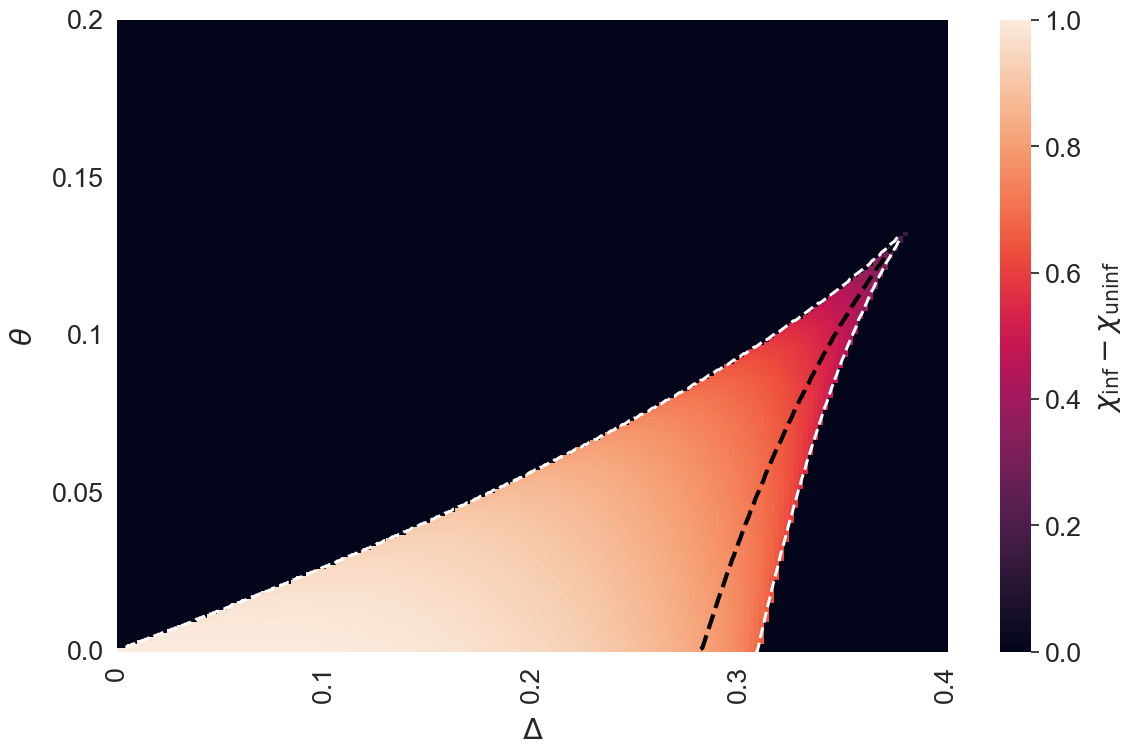

In [92]:
x_lim=474
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_cut.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks(np.array([0,125,250,375,500])/3)
ax.set_xticklabels([0,df_flat[D_s].unique()[124].round(3),df_flat[D_s].unique()[249].round(3),df_flat[D_s].unique()[374].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks(np.array([0,125,250,375,500])/3)
ax.set_yticklabels([df_flat[T_s].unique()[0].round(3),df_flat[T_s].unique()[125].round(3),df_flat[T_s].unique()[250].round(3),df_flat[T_s].unique()[375].round(3),df_flat[T_s].unique()[500].round(3)])
ax.plot(np.arange(352,x_lim)/3,(IT_tab[352:x_lim]*501/0.2)/3,"--",color="black",lw=3.)
ax.plot(np.arange(385,x_lim-1)/3,(sp1_tab[385:x_lim-1]*501/0.2)/3,"--",color="white",lw=2.15)
ax.plot(np.arange(5,x_lim-2)/3,(sp2_tab[5:x_lim-2]*501/0.2)/3,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
fig.savefig(f"../Figures/PhD_Deci_IsiT.pdf")

### Symm


In [759]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "./Data_SparseT/PD_Symm/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$t$   $1-t$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0  0.8000  0.2000     0            35.0          22.0          0.950205   
1  0.8004  0.1996     1            35.0          22.0          0.950176   
2  0.8008  0.1992     2            35.0          22.0          0.950147   
3  0.8012  0.1988     3            35.0          22.0          0.950118   
4  0.8016  0.1984     4            35.0          22.0          0.950089   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.950207         0.000002               0.0             0.0   
1        0.950178         0.000002               0.0             0.0   
2        0.950149         0.000002               0.0             0.0   
3        0.950121         0.000002               0.0             0.0   
4        0.950092         0.000002               0.0             0.0   

   $\Delta/\rho^2$   $\beta$  tmin  tmax  rho   Nt  
0           0.2152  2.155653   0.8   1.0  1.0  501  
1           0.2152  2.155653   0.8   1.0  1.0  501  
2           0.2152  2.155653   0.8   1.0  1.0  501  
3           0.2152  2.155653   0.8   1.0  1.0  501  
4           0.2152  2.155653   0.8   1.0  1.0  501

In [762]:
onemt_s = r"$1-t$"

#### Free energy

In [ ]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"


In [ ]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.28][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.28][logZu_s]

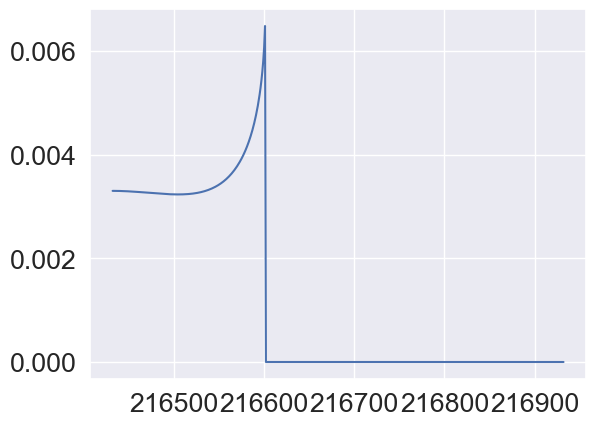

In [ ]:
plt.plot(diff_tab)

In [ ]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


In [ ]:
IT_tab[339]

0.0305

In [ ]:
g_tab[222]

0.111

In [ ]:
D_tab[339]

0.272

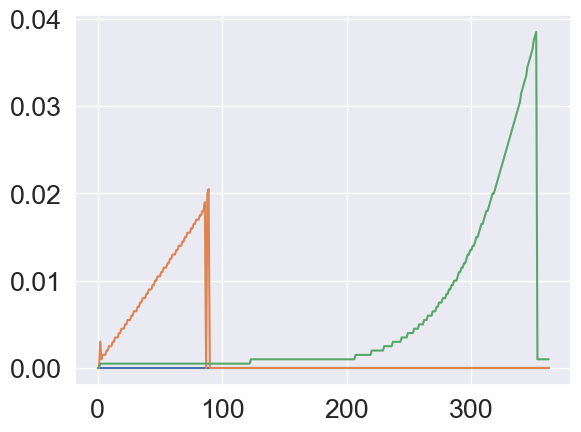

In [ ]:
x_lim=363
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

### Df_flat and plot

#### Pickle

In [763]:
df = data_frame_tot
y_s = diff_s
#DATA MANIPULATION
t_list = np.sort(df[onemt_s].unique())
d_list = np.sort(df[D_s].unique())

len_t = len(t_list)
len_d= len(d_list)

y_tab = np.zeros((len_t,len_d))
d_tab = np.zeros((len_t,len_d))
t_tab = np.zeros((len_t,len_d))

for i_t,t in enumerate(t_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_t][i_d] = df[(df[onemt_s]==t) & (df[D_s]==d)][y_s].values[0]
        t_tab[i_t][i_d] = t
        d_tab[i_t][i_d] = d
df_flat = pd.DataFrame({onemt_s:t_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

with lzma.open("./Data_flat/df_Symm_spT_Isi.xz", "wb") as f:
        pickle.dump(df_flat, f)

#### Load

In [764]:
with lzma.open("./Data_flat/df_Symm_spT_Isi.xz", "rb") as f:
    df_flat = pickle.load(f)

In [765]:
len(df_flat[D_s].unique())

500

In [767]:
df_flat[onemt_s].unique()[340:]

array([0.136 , 0.1364, 0.1368, 0.1372, 0.1376, 0.138 , 0.1384, 0.1388,
       0.1392, 0.1396, 0.14  , 0.1404, 0.1408, 0.1412, 0.1416, 0.142 ,
       0.1424, 0.1428, 0.1432, 0.1436, 0.144 , 0.1444, 0.1448, 0.1452,
       0.1456, 0.146 , 0.1464, 0.1468, 0.1472, 0.1476, 0.148 , 0.1484,
       0.1488, 0.1492, 0.1496, 0.15  , 0.1504, 0.1508, 0.1512, 0.1516,
       0.152 , 0.1524, 0.1528, 0.1532, 0.1536, 0.154 , 0.1544, 0.1548,
       0.1552, 0.1556, 0.156 , 0.1564, 0.1568, 0.1572, 0.1576, 0.158 ,
       0.1584, 0.1588, 0.1592, 0.1596, 0.16  , 0.1604, 0.1608, 0.1612,
       0.1616, 0.162 , 0.1624, 0.1628, 0.1632, 0.1636, 0.164 , 0.1644,
       0.1648, 0.1652, 0.1656, 0.166 , 0.1664, 0.1668, 0.1672, 0.1676,
       0.168 , 0.1684, 0.1688, 0.1692, 0.1696, 0.17  , 0.1704, 0.1708,
       0.1712, 0.1716, 0.172 , 0.1724, 0.1728, 0.1732, 0.1736, 0.174 ,
       0.1744, 0.1748, 0.1752, 0.1756, 0.176 , 0.1764, 0.1768, 0.1772,
       0.1776, 0.178 , 0.1784, 0.1788, 0.1792, 0.1796, 0.18  , 0.1804,
      

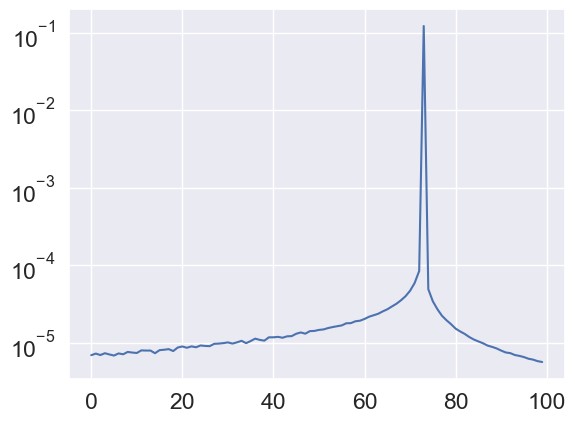

In [786]:
plt.plot(df_flat[abs(df_flat[onemt_s]-0.1348) < 1e-5][400:500][diff_s].values)
plt.yscale("log")

In [788]:
df_flat[abs(df_flat[onemt_s]-0.1348) < 1e-6][450:500]

$1-t$  $\Delta/\rho^2$  $\delta m/\rho$
168950  0.1348           0.3608         0.000015
168951  0.1348           0.3616         0.000015
168952  0.1348           0.3624         0.000015
168953  0.1348           0.3632         0.000016
168954  0.1348           0.3640         0.000016
168955  0.1348           0.3648         0.000017
168956  0.1348           0.3656         0.000018
168957  0.1348           0.3664         0.000018
168958  0.1348           0.3672         0.000019
168959  0.1348           0.3680         0.000019
168960  0.1348           0.3688         0.000020
168961  0.1348           0.3696         0.000022
168962  0.1348           0.3704         0.000023
168963  0.1348           0.3712         0.000024
168964  0.1348           0.3720         0.000025
168965  0.1348           0.3728         0.000027
168966  0.1348           0.3736         0.000029
168967  0.1348           0.3744         0.000032
168968  0.1348           0.3752         0.000035
168969  0.1348           0.3760         0.000040
168970  0.1348           0.3768         0.000047
168971  0.1348           0.3776         0.000059
168972  0.1348           0.3784         0.000084
168973  0.1348           0.3792         0.123329
168974  0.1348           0.3800         0.000049
168975  0.1348           0.3808         0.000034
168976  0.1348           0.3816         0.000027
168977  0.1348           0.3824         0.000022
168978  0.1348           0.3832         0.000019
168979  0.1348           0.3840         0.000017
168980  0.1348           0.3848         0.000015
168981  0.1348           0.3856         0.000014
168982  0.1348           0.3864         0.000013
168983  0.1348           0.3872         0.000012
168984  0.1348           0.3880         0.000011
168985  0.1348           0.3888         0.000010
168986  0.1348           0.3896         0.000010
168987  0.1348           0.3904         0.000009
168988  0.1348           0.3912         0.000009
168989  0.1348           0.3920         0.000008
168990  0.1348           0.3928         0.000008
168991  0.1348           0.3936         0.000007
168992  0.1348           0.3944         0.000007
168993  0.1348           0.3952         0.000007
168994  0.1348           0.3960         0.000007
168995  0.1348           0.3968         0.000007
168996  0.1348           0.3976         0.000006
168997  0.1348           0.3984         0.000006
168998  0.1348           0.3992         0.000006
168999  0.1348           0.4000         0.000006

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_75546/3672347367.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(onemt_s,D_s,y_s),vmin=0.,vmax=1.)


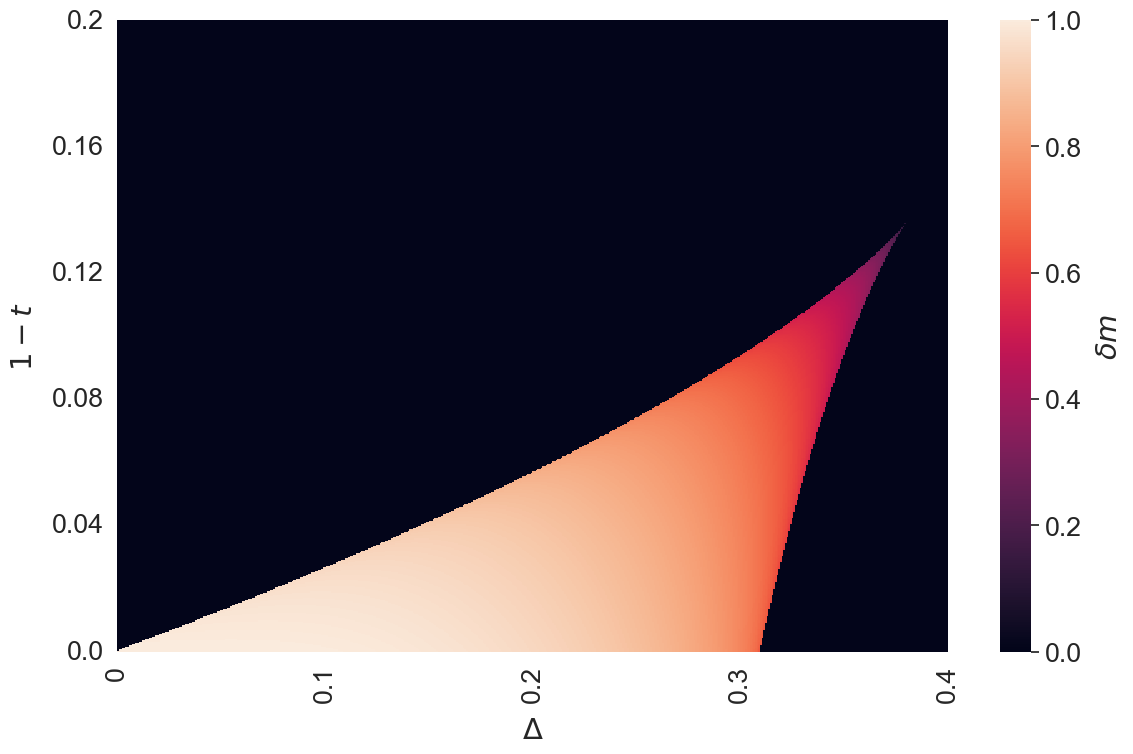

In [790]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_flat.pivot(onemt_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks([0,125,250,375,500])
ax.set_xticklabels([0,df_flat[D_s].unique()[124].round(3),df_flat[D_s].unique()[249].round(3),df_flat[D_s].unique()[374].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks([0,100,200,300,400,500])
ax.set_yticklabels([df_flat[onemt_s].unique()[0].round(3),df_flat[onemt_s].unique()[100].round(3),df_flat[onemt_s].unique()[200].round(3),df_flat[onemt_s].unique()[300].round(3),df_flat[onemt_s].unique()[400].round(3),df_flat[onemt_s].unique()[500].round(3)])
#ax.plot(np.arange(282,x_lim),IT_tab[282:x_lim]*500/0.25,"--",color="black",lw=3.)
#ax.plot(np.arange(308,x_lim-1),sp1_tab[308:x_lim-1]*500/0.25,"--",color="white",lw=2.15)
#ax.plot(np.arange(3,x_lim-1),sp2_tab[3:x_lim-1]*500/0.25,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(onemt_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(r"$\delta m$", labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
fig.savefig(f"Figures/PhD_Symm_IsiT.png", dpi=600)

# Spherical 3-spin

In [510]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_SparseT/PDlogZ_Sph/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0      0.0000     0           146.0          57.0          0.000000   
1      0.0002     1            20.0          57.0          0.000200   
2      0.0004     2            20.0          57.0          0.000401   
3      0.0006     3            20.0          57.0          0.000603   
4      0.0008     4            20.0          57.0          0.000805   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.856090         0.856090          0.918939        1.226482   
1        0.856096         0.855895          0.918939        1.226568   
2        0.856102         0.855700          0.918939        1.226653   
3        0.856107         0.855505          0.918939        1.226739   
4        0.856113         0.855309          0.918939        1.226825   

   $\Delta/\rho^2$  gmin  gmax   mu   Ng  
0           0.1232   0.0   0.4  0.0  801  
1           0.1232   0.0   0.4  0.0  801  
2           0.1232   0.0   0.4  0.0  801  
3           0.1232   0.0   0.4  0.0  801  
4           0.1232   0.0   0.4  0.0  801

In [511]:
data_frame_tot[r"$\delta logZ$"] = data_frame_tot[logZi_s] - data_frame_tot[logZu_s]

#### Free energy

In [512]:
data_frame_tot[np.abs(data_frame_tot[g2_s]-0.0)<1e-6]

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0              0.0     0           146.0          57.0               0.0   
801            0.0     0           146.0          97.0               0.0   
1602           0.0     0           146.0          67.0               0.0   
2403           0.0     0           146.0          71.0               0.0   
3204           0.0     0           146.0         189.0               0.0   
...            ...   ...             ...           ...               ...   
636795         0.0     0           146.0          37.0               0.0   
637596         0.0     0           146.0          40.0               0.0   
638397         0.0     0           146.0          95.0               0.0   
639198         0.0     0           146.0         130.0               0.0   
639999         0.0     0           146.0          44.0               0.0   

        $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0             0.856090         0.856090          0.918939        1.226482   
801           0.727156         0.727156          0.918939        0.956080   
1602          0.810483         0.810483          0.918939        1.070224   
2403          0.795296         0.795296          0.918939        1.038460   
3204          0.000000         0.000000          0.918939        0.918939   
...                ...              ...               ...             ...   
636795        0.974552         0.974552          0.918939        5.790967   
637596        0.953872         0.953872          0.918939        3.145212   
638397        0.731517         0.731517          0.918939        0.959399   
639198        0.672047         0.672047          0.918939        0.927048   
639999        0.929884         0.929884          0.918939        2.110436   

        $\Delta/\rho^2$  gmin  gmax   mu   Ng  $\delta logZ$  
0                0.1232   0.0   0.4  0.0  801       0.307544  
801              0.1984   0.0   0.4  0.0  801       0.037141  
1602             0.1536   0.0   0.4  0.0  801       0.151286  
2403             0.1628   0.0   0.4  0.0  801       0.119521  
3204             0.2952   0.0   0.4  0.0  801       0.000000  
...                 ...   ...   ...  ...  ...            ...  
636795           0.0248   0.0   0.4  0.0  801       4.872028  
637596           0.0440   0.0   0.4  0.0  801       2.226273  
638397           0.1964   0.0   0.4  0.0  801       0.040460  
639198           0.2204   0.0   0.4  0.0  801       0.008109  
639999           0.0652   0.0   0.4  0.0  801       1.191498  

[800 rows x 15 columns]

<Axes: xlabel='$\\gamma^2$', ylabel='$m_{inf}/\\rho$'>

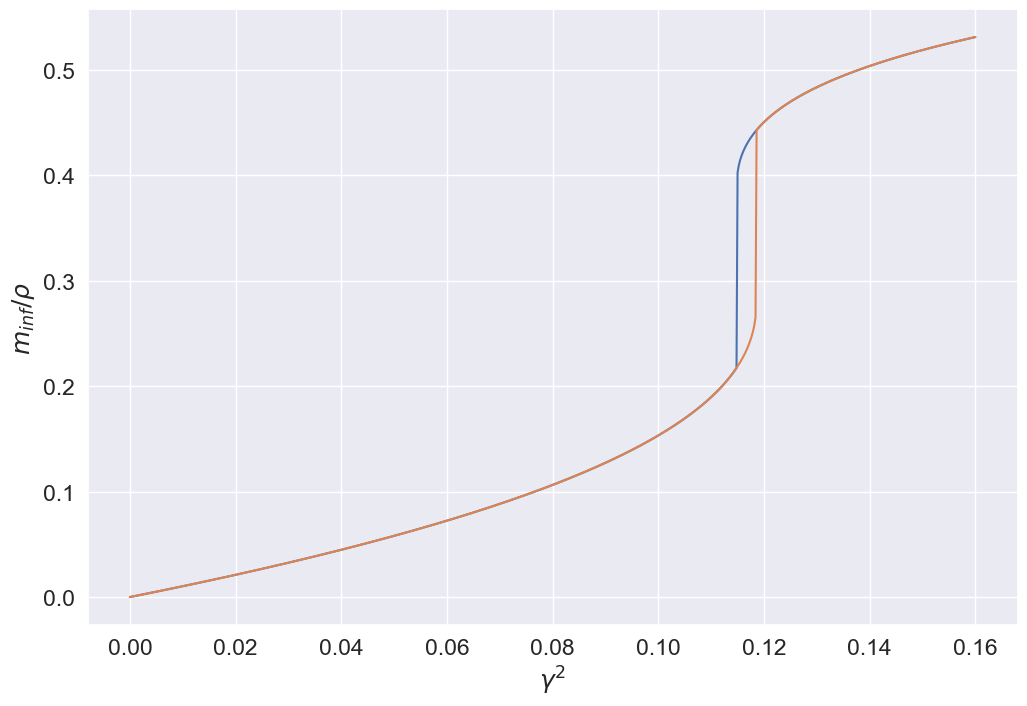

In [552]:
sns.set_theme(font_scale=1.5)   
fig,axs = plt.subplots(1,1,figsize=(12,8))
#sns.lineplot(data=data_frame_tot[data_frame_tot[g2_s]==0.],x=r"$m_{uninf}/\rho$",y=logZu_s,ax=axs)
sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[D_s]-DDD)<1e-10],x=g2_s,y=r"$m_{inf}/\rho$",ax=axs)
sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[D_s]-DDD)<1e-10],x=g2_s,y=r"$m_{uninf}/\rho$",ax=axs)
#axs.set_yscale("log")

In [644]:
D_tab[590:]

array([0.2364, 0.2368, 0.2372, 0.2376, 0.238 , 0.2384, 0.2388, 0.2392,
       0.2396, 0.24  , 0.2404, 0.2408, 0.2412, 0.2416, 0.242 , 0.2424,
       0.2428, 0.2432, 0.2436, 0.244 , 0.2444, 0.2448, 0.2452, 0.2456,
       0.246 , 0.2464, 0.2468, 0.2472, 0.2476, 0.248 , 0.2484, 0.2488,
       0.2492, 0.2496, 0.25  , 0.2504, 0.2508, 0.2512, 0.2516, 0.252 ,
       0.2524, 0.2528, 0.2532, 0.2536, 0.254 , 0.2544, 0.2548, 0.2552,
       0.2556, 0.256 , 0.2564, 0.2568, 0.2572, 0.2576, 0.258 , 0.2584,
       0.2588, 0.2592, 0.2596, 0.26  , 0.2604, 0.2608, 0.2612, 0.2616,
       0.262 , 0.2624, 0.2628, 0.2632, 0.2636, 0.264 , 0.2644, 0.2648,
       0.2652, 0.2656, 0.266 , 0.2664, 0.2668, 0.2672, 0.2676, 0.268 ,
       0.2684, 0.2688, 0.2692, 0.2696, 0.27  , 0.2704, 0.2708, 0.2712,
       0.2716, 0.272 , 0.2724, 0.2728, 0.2732, 0.2736, 0.274 , 0.2744,
       0.2748, 0.2752, 0.2756, 0.276 , 0.2764, 0.2768, 0.2772, 0.2776,
       0.278 , 0.2784, 0.2788, 0.2792, 0.2796, 0.28  , 0.2804, 0.2808,
      

In [681]:
g2_tab=np.sort(data_frame_tot[g2_s].unique())
DDD =0.2952
mmm=1.
x = mmm**2/D_tab + ggg

(0.12, 0.13)

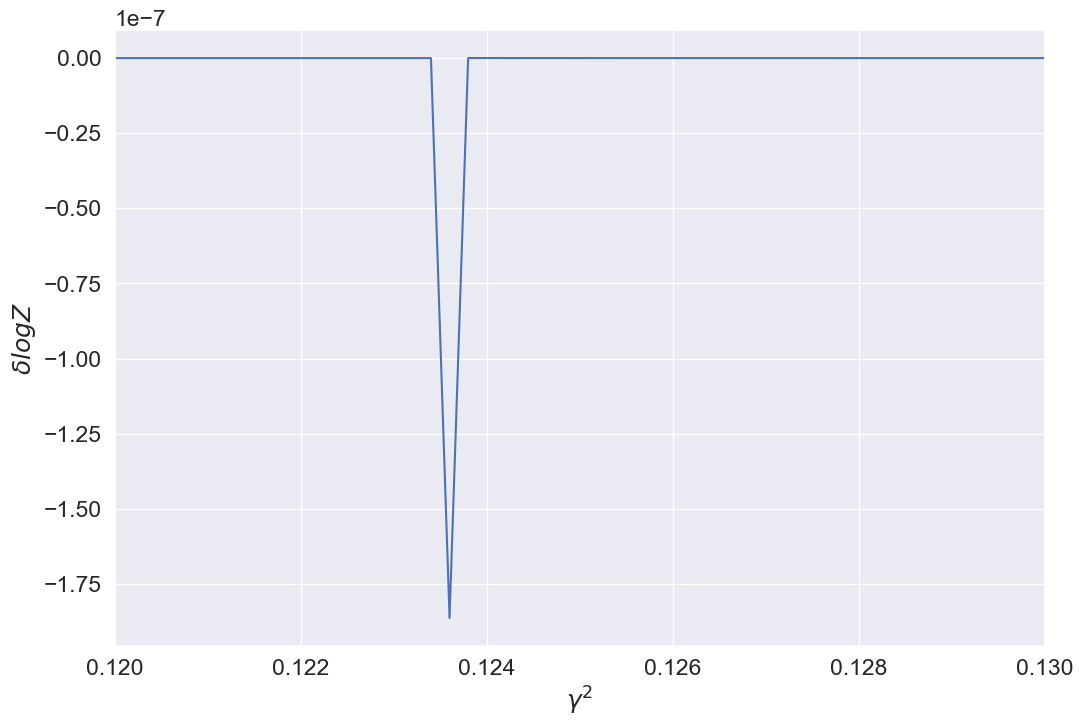

In [683]:
sns.set_theme(font_scale=1.5)   
fig,axs = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[D_s]-DDD)<1e-10],x=g2_s,y=diff_logZ_s,ax=axs)
#sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[D_s]-DDD)<1e-10],x=g2_s,y=logZi_s,ax=axs)
#sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[g2_s]-ggg)<1e-10],x=D_s,y=m,ax=axs)#,y=r"$\delta logZ$",ax=axs)
#sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[g2_s]-ggg)<1e-10],x=D_s,y=m_u_tab,ax=axs)#,y=r"$\delta logZ$",ax=axs)
#axs.plot(D_tab,0.5*x + 0.5*np.log(2*np.pi/(1+x))-mmm**3/(3*D_tab),"--",color="black",lw=3.)
#axs.set_ylim([0.92,0.93])
axs.set_xlim([0.12,0.13])
#axs.set_yscale("log")

In [598]:
data_frame_tot[np.abs(data_frame_tot[g2_s]-0.0)<1e-6]

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0              0.0     0           146.0          57.0               0.0   
801            0.0     0           146.0          97.0               0.0   
1602           0.0     0           146.0          67.0               0.0   
2403           0.0     0           146.0          71.0               0.0   
3204           0.0     0           146.0         189.0               0.0   
...            ...   ...             ...           ...               ...   
636795         0.0     0           146.0          37.0               0.0   
637596         0.0     0           146.0          40.0               0.0   
638397         0.0     0           146.0          95.0               0.0   
639198         0.0     0           146.0         130.0               0.0   
639999         0.0     0           146.0          44.0               0.0   

        $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0             0.856090         0.856090          0.918939        1.226482   
801           0.727156         0.727156          0.918939        0.956080   
1602          0.810483         0.810483          0.918939        1.070224   
2403          0.795296         0.795296          0.918939        1.038460   
3204          0.000000         0.000000          0.918939        0.918939   
...                ...              ...               ...             ...   
636795        0.974552         0.974552          0.918939        5.790967   
637596        0.953872         0.953872          0.918939        3.145212   
638397        0.731517         0.731517          0.918939        0.959399   
639198        0.672047         0.672047          0.918939        0.927048   
639999        0.929884         0.929884          0.918939        2.110436   

        $\Delta/\rho^2$  gmin  gmax   mu   Ng  $\delta logZ$  
0                0.1232   0.0   0.4  0.0  801       0.307544  
801              0.1984   0.0   0.4  0.0  801       0.037141  
1602             0.1536   0.0   0.4  0.0  801       0.151286  
2403             0.1628   0.0   0.4  0.0  801       0.119521  
3204             0.2952   0.0   0.4  0.0  801       0.000000  
...                 ...   ...   ...  ...  ...            ...  
636795           0.0248   0.0   0.4  0.0  801       4.872028  
637596           0.0440   0.0   0.4  0.0  801       2.226273  
638397           0.1964   0.0   0.4  0.0  801       0.040460  
639198           0.2204   0.0   0.4  0.0  801       0.008109  
639999           0.0652   0.0   0.4  0.0  801       1.191498  

[800 rows x 15 columns]

<Axes: xlabel='$m_{inf}/\\rho$', ylabel='$\\log Z_{inf}$'>

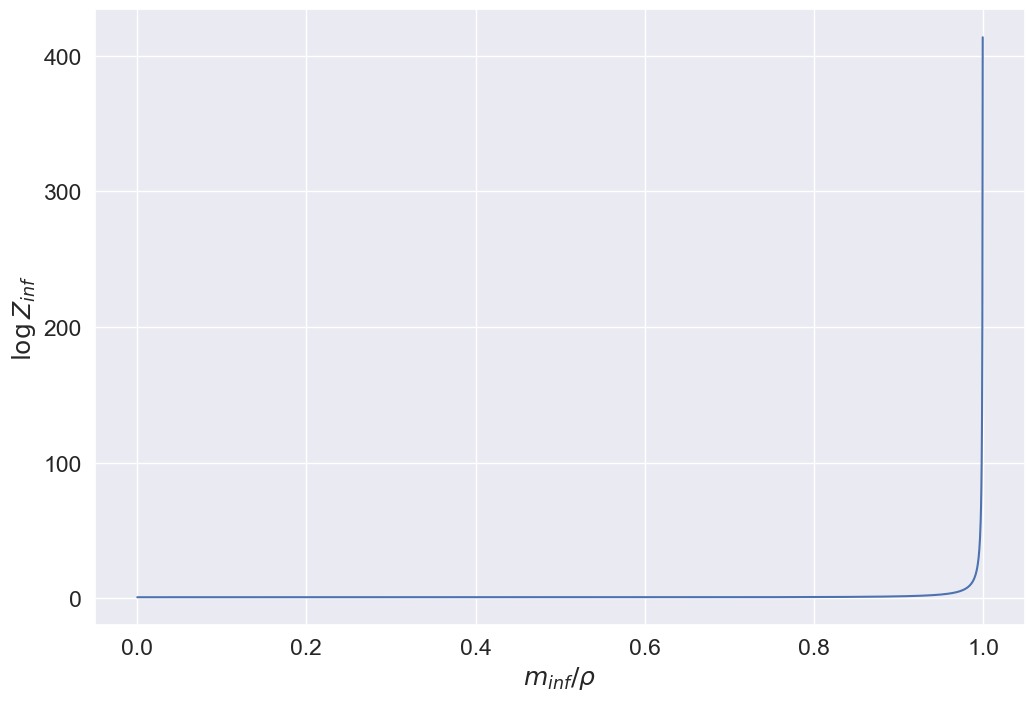

In [118]:
sns.set_theme(font_scale=1.5)   
fig,axs = plt.subplots(1,1,figsize=(12,8))
#sns.lineplot(data=data_frame_tot[data_frame_tot[g2_s]==0.],x=r"$m_{uninf}/\rho$",y=logZu_s,ax=axs)
sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[g2_s]-0.0)<1e-6],x=r"$m_{inf}/\rho$",y=logZi_s,ax=axs)#,y=r"$\delta logZ$",ax=axs)
#sns.lineplot(data=data_frame_tot[np.abs(data_frame_tot[g2_s]-0.04)<1e-10],x=r"$m_{inf}/\rho$",y=logZi_s,ax=axs)#,y=r"$\delta logZ$",ax=axs)
#axs.set_ylim([0.6,2])
#axs.set_yscale("log")

In [119]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())

In [120]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.29][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.296][logZu_s]

In [121]:
g_tab

array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
       0.0016, 0.0018, 0.002 , 0.0022, 0.0024, 0.0026, 0.0028, 0.003 ,
       0.0032, 0.0034, 0.0036, 0.0038, 0.004 , 0.0042, 0.0044, 0.0046,
       0.0048, 0.005 , 0.0052, 0.0054, 0.0056, 0.0058, 0.006 , 0.0062,
       0.0064, 0.0066, 0.0068, 0.007 , 0.0072, 0.0074, 0.0076, 0.0078,
       0.008 , 0.0082, 0.0084, 0.0086, 0.0088, 0.009 , 0.0092, 0.0094,
       0.0096, 0.0098, 0.01  , 0.0102, 0.0104, 0.0106, 0.0108, 0.011 ,
       0.0112, 0.0114, 0.0116, 0.0118, 0.012 , 0.0122, 0.0124, 0.0126,
       0.0128, 0.013 , 0.0132, 0.0134, 0.0136, 0.0138, 0.014 , 0.0142,
       0.0144, 0.0146, 0.0148, 0.015 , 0.0152, 0.0154, 0.0156, 0.0158,
       0.016 , 0.0162, 0.0164, 0.0166, 0.0168, 0.017 , 0.0172, 0.0174,
       0.0176, 0.0178, 0.018 , 0.0182, 0.0184, 0.0186, 0.0188, 0.019 ,
       0.0192, 0.0194, 0.0196, 0.0198, 0.02  , 0.0202, 0.0204, 0.0206,
       0.0208, 0.021 , 0.0212, 0.0214, 0.0216, 0.0218, 0.022 , 0.0222,
      

In [122]:
gmm=0.0
logzi_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZi_s]
logzu_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZu_s]
diff_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZi_s] - data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZu_s]
delta_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][D_s]
d_sort = [x for _,x in sorted(zip(delta_tab,diff_tab))]
logzi_sort = [x for _,x in sorted(zip(delta_tab,logzi_tab))]
logzu_sort = [x for _,x in sorted(zip(delta_tab,logzu_tab))]
doverrho2_tab = np.sort(delta_tab)

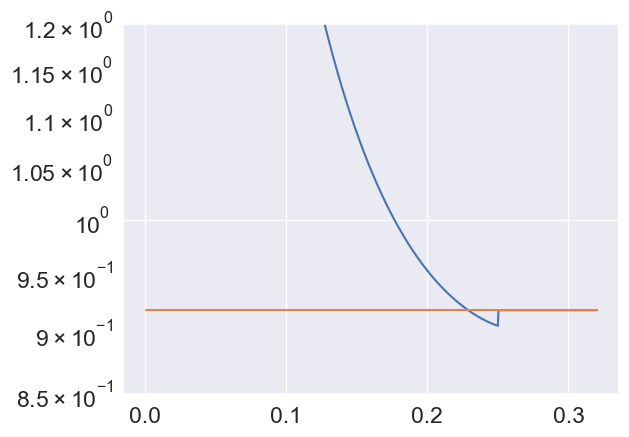

In [123]:
plt.plot(doverrho2_tab, logzi_sort)
plt.plot(doverrho2_tab, logzu_sort)
#plt.plot(doverrho2_tab, d_sort)
plt.ylim([0.85,1.2])
plt.yscale("log")   

In [124]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


In [125]:
sp2_tab

array([0.    , 0.    , 0.    , 0.001 , 0.001 , 0.0008, 0.0012, 0.001 ,
       0.001 , 0.0012, 0.0012, 0.0014, 0.0014, 0.0016, 0.0016, 0.0018,
       0.0018, 0.002 , 0.002 , 0.0022, 0.0022, 0.0024, 0.0024, 0.0026,
       0.0026, 0.0028, 0.0028, 0.003 , 0.003 , 0.0032, 0.0032, 0.0034,
       0.0034, 0.0036, 0.0036, 0.0038, 0.0038, 0.004 , 0.004 , 0.0042,
       0.0042, 0.0044, 0.0044, 0.0046, 0.0046, 0.0048, 0.0048, 0.005 ,
       0.005 , 0.0052, 0.0054, 0.0054, 0.0056, 0.0056, 0.0058, 0.0058,
       0.006 , 0.006 , 0.0062, 0.0062, 0.0064, 0.0064, 0.0066, 0.0066,
       0.0068, 0.0068, 0.007 , 0.007 , 0.0072, 0.0074, 0.0074, 0.0076,
       0.0076, 0.0078, 0.0078, 0.008 , 0.008 , 0.0082, 0.0082, 0.0084,
       0.0084, 0.0086, 0.0086, 0.0088, 0.009 , 0.009 , 0.0092, 0.0092,
       0.0094, 0.0094, 0.0096, 0.0096, 0.0098, 0.0098, 0.01  , 0.01  ,
       0.0102, 0.0104, 0.0104, 0.0106, 0.0106, 0.0108, 0.0108, 0.011 ,
       0.011 , 0.0112, 0.0112, 0.0114, 0.0116, 0.0116, 0.0118, 0.0118,
      

In [126]:
g_tab[222]

0.04440000000000001

In [127]:
D_tab[340]

0.1364

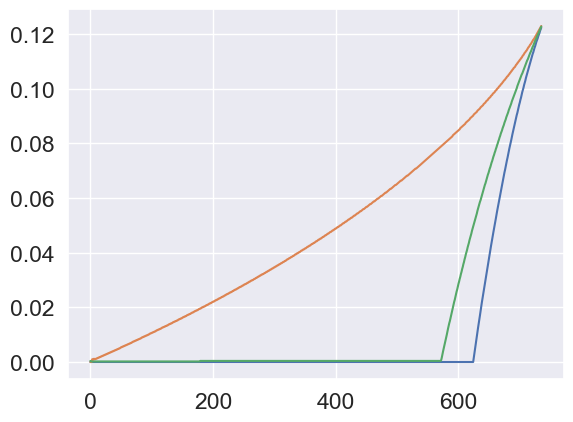

In [128]:
x_lim=736
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

### Df_flat and plot

In [129]:
y_s = diff_s

#### Pickle

In [13]:
df = data_frame_tot
#DATA MANIPULATION
g_list = np.sort(df[g2_s].unique())
d_list = np.sort(df[D_s].unique())

len_g = len(g_list)
len_d= len(d_list)

y_tab = np.zeros((len_g,len_d))
d_tab = np.zeros((len_g,len_d))
g_tab = np.zeros((len_g,len_d))

for i_g,g in enumerate(g_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_g][i_d] = df[(df[g2_s]==g) & (df[D_s]==d)][y_s].values[0]
        g_tab[i_g][i_d] = g
        d_tab[i_g][i_d] = d
df_flat = pd.DataFrame({g2_s:g_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

#with lzma.open("./Data_flat/df_spT_Sph.xz", "wb") as f:
#        pickle.dump(df_flat, f)

#### Load

In [130]:
with lzma.open("../Data_flat/df_spT_Sph.xz", "rb") as f:
    df_flat = pickle.load(f)

In [131]:
df_flat[g2_s].unique()[340:]

array([0.068 , 0.0682, 0.0684, 0.0686, 0.0688, 0.069 , 0.0692, 0.0694,
       0.0696, 0.0698, 0.07  , 0.0702, 0.0704, 0.0706, 0.0708, 0.071 ,
       0.0712, 0.0714, 0.0716, 0.0718, 0.072 , 0.0722, 0.0724, 0.0726,
       0.0728, 0.073 , 0.0732, 0.0734, 0.0736, 0.0738, 0.074 , 0.0742,
       0.0744, 0.0746, 0.0748, 0.075 , 0.0752, 0.0754, 0.0756, 0.0758,
       0.076 , 0.0762, 0.0764, 0.0766, 0.0768, 0.077 , 0.0772, 0.0774,
       0.0776, 0.0778, 0.078 , 0.0782, 0.0784, 0.0786, 0.0788, 0.079 ,
       0.0792, 0.0794, 0.0796, 0.0798, 0.08  , 0.0802, 0.0804, 0.0806,
       0.0808, 0.081 , 0.0812, 0.0814, 0.0816, 0.0818, 0.082 , 0.0822,
       0.0824, 0.0826, 0.0828, 0.083 , 0.0832, 0.0834, 0.0836, 0.0838,
       0.084 , 0.0842, 0.0844, 0.0846, 0.0848, 0.085 , 0.0852, 0.0854,
       0.0856, 0.0858, 0.086 , 0.0862, 0.0864, 0.0866, 0.0868, 0.087 ,
       0.0872, 0.0874, 0.0876, 0.0878, 0.088 , 0.0882, 0.0884, 0.0886,
       0.0888, 0.089 , 0.0892, 0.0894, 0.0896, 0.0898, 0.09  , 0.0902,
      

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/3715458629.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)


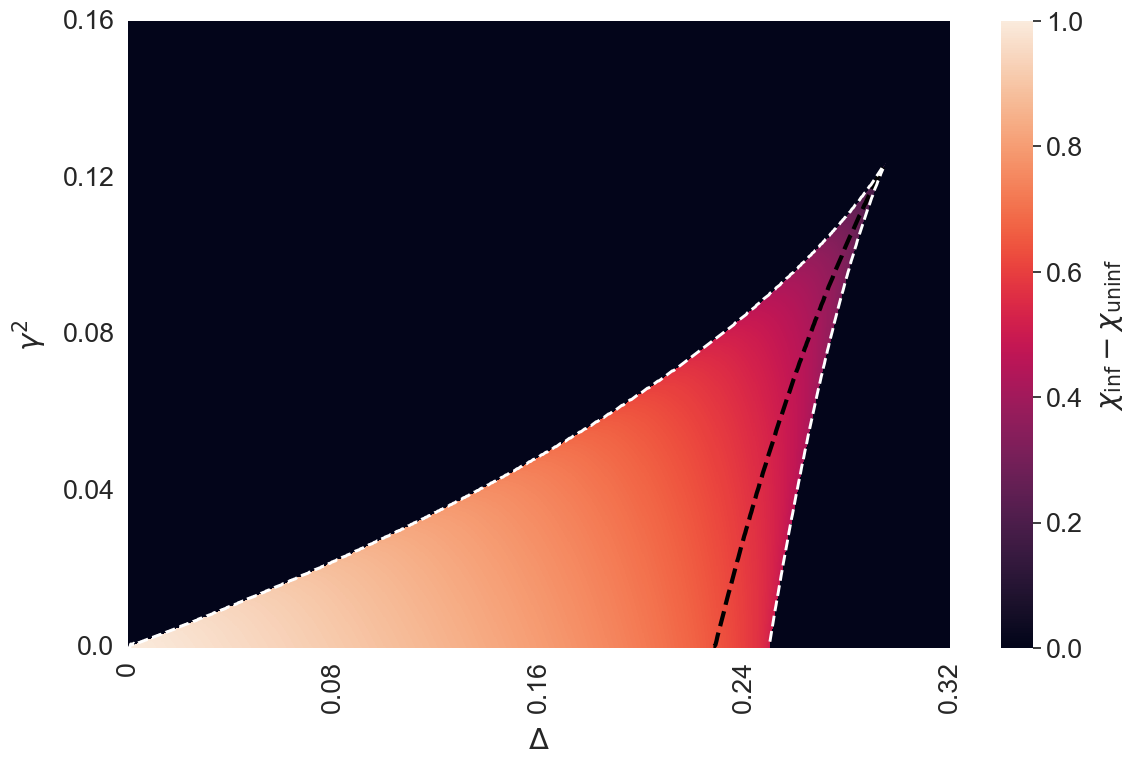

In [132]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Gaussian prior")
ax = sns.heatmap(df_flat.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_ylabel(r"$\gamma^2$")
ax.set_xticks([0,200,400,600,800])
ax.set_xticklabels([0,df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[399].round(3),df_flat[D_s].unique()[599].round(3),df_flat[D_s].unique()[799].round(3)])
ax.set_yticks([0,200,400,600,800])
ax.set_yticklabels([df_flat[g2_s].unique()[0].round(3),df_flat[g2_s].unique()[200].round(3),df_flat[g2_s].unique()[400].round(3),df_flat[g2_s].unique()[600].round(3),df_flat[g2_s].unique()[800].round(3)])
ax.set_xlabel(r"$\Delta$")
ax.plot(np.arange(570,x_lim),IT_tab[570:x_lim]*800/0.16,"--",color="black",lw=3.)
ax.plot(np.arange(625,x_lim),sp1_tab[625:x_lim]*800/0.16,"--",color="white",lw=2.1)
ax.plot(np.arange(0,x_lim-1),sp2_tab[0:x_lim-1]*800/0.16,"--",color="white",lw=2.1)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_SphT.png", dpi=600)

##### Compressed image

In [133]:
D_cut = np.sort(data_frame_tot[D_s].unique())[0::3]
g2_cut = np.sort(data_frame_tot[g2_s].unique())[0::3]
df_cut = df_flat.loc[(df_flat[D_s].isin(D_cut)) & (df_flat[g2_s].isin(g2_cut))]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/3652573202.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_cut.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)


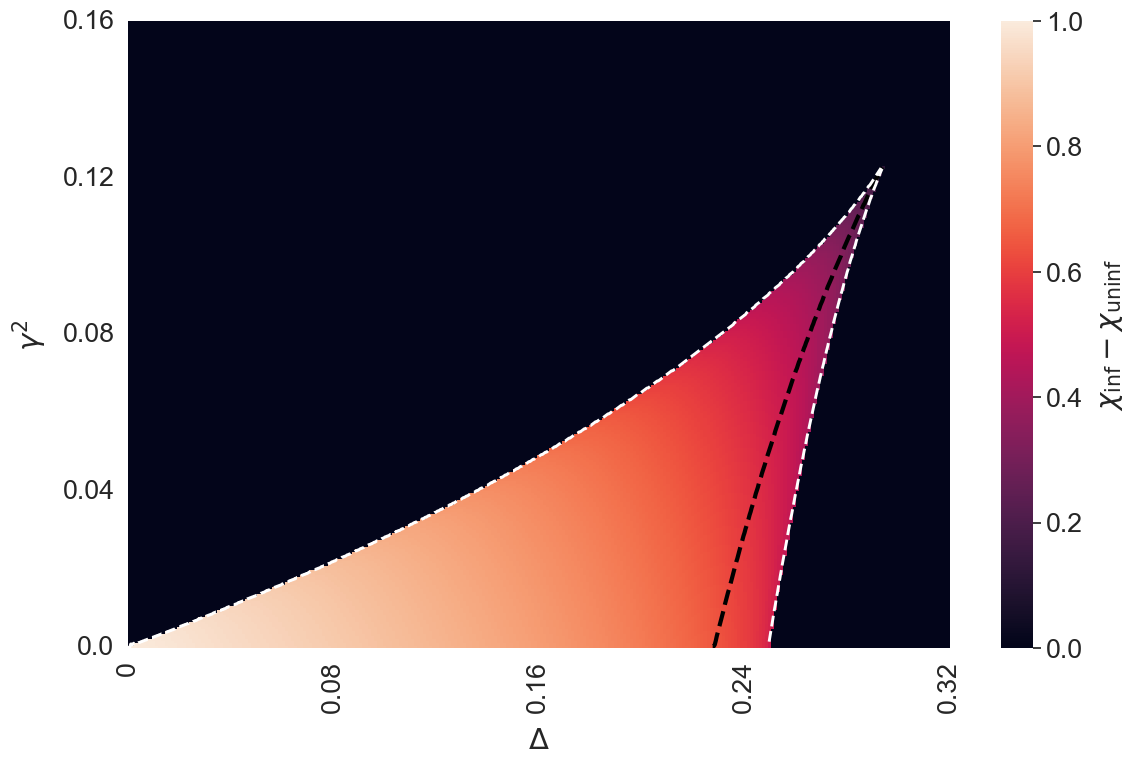

In [134]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Gaussian prior")
ax = sns.heatmap(df_cut.pivot(g2_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_ylabel(r"$\gamma^2$")
ax.set_xticks(np.array([0,200,400,600,800])/3)
ax.set_xticklabels([0,df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[399].round(3),df_flat[D_s].unique()[599].round(3),df_flat[D_s].unique()[799].round(3)])
ax.set_yticks(np.array([0,200,400,600,800])/3)
ax.set_yticklabels([df_flat[g2_s].unique()[0].round(3),df_flat[g2_s].unique()[200].round(3),df_flat[g2_s].unique()[400].round(3),df_flat[g2_s].unique()[600].round(3),df_flat[g2_s].unique()[800].round(3)])
ax.set_xlabel(r"$\Delta$")
ax.plot(np.arange(570,x_lim)/3,(IT_tab[570:x_lim]*800/0.16)/3,"--",color="black",lw=3.)
ax.plot(np.arange(625,x_lim)/3,(sp1_tab[625:x_lim]*800/0.16)/3,"--",color="white",lw=2.1)
ax.plot(np.arange(0,x_lim-1)/3,(sp2_tab[0:x_lim-1]*800/0.16)/3,"--",color="white",lw=2.1)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_SphT.pdf")

### Decimation

In [135]:
T_s = r"$\theta$"

### Skip

In [136]:
load_dir = "../Data/Data_SparseT/PD_Deci_Sph/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}$  $m_{inf}$  \
0    0.0000     0           146.0          16.0     0.000000   0.962926   
1    0.0003     1            20.0          16.0     0.000303   0.962938   
2    0.0006     2            20.0          16.0     0.000610   0.962950   
3    0.0009     3            21.0          16.0     0.000924   0.962962   
4    0.0012     4            21.0          16.0     0.001243   0.962974   

   $\delta m$  $\log Z_{uninf}$  $\log Z_{inf}$  $\delta logZ$  \
0    0.962926          0.918939        3.921285       3.002346   
1    0.962636          0.918087        3.920928       3.002840   
2    0.962340          0.917236        3.920571       3.003335   
3    0.962039          0.916384        3.920213       3.003829   
4    0.961731          0.915533        3.919856       3.004323   

   $\Delta/\rho^2$  Tmin  Tmax   NT  
0           0.0357   0.0  0.15  501  
1           0.0357   0.0  0.15  501  
2           0.0357   0.0  0.15  501  
3           0.0357   0.0  0.15  501  
4           0.0357   0.0  0.15  501

#### Free energy

In [137]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [138]:
D_tab[400:500]

array([0.2807, 0.2814, 0.2821, 0.2828, 0.2835, 0.2842, 0.2849, 0.2856,
       0.2863, 0.287 , 0.2877, 0.2884, 0.2891, 0.2898, 0.2905, 0.2912,
       0.2919, 0.2926, 0.2933, 0.294 , 0.2947, 0.2954, 0.2961, 0.2968,
       0.2975, 0.2982, 0.2989, 0.2996, 0.3003, 0.301 , 0.3017, 0.3024,
       0.3031, 0.3038, 0.3045, 0.3052, 0.3059, 0.3066, 0.3073, 0.308 ,
       0.3087, 0.3094, 0.3101, 0.3108, 0.3115, 0.3122, 0.3129, 0.3136,
       0.3143, 0.315 , 0.3157, 0.3164, 0.3171, 0.3178, 0.3185, 0.3192,
       0.3199, 0.3206, 0.3213, 0.322 , 0.3227, 0.3234, 0.3241, 0.3248,
       0.3255, 0.3262, 0.3269, 0.3276, 0.3283, 0.329 , 0.3297, 0.3304,
       0.3311, 0.3318, 0.3325, 0.3332, 0.3339, 0.3346, 0.3353, 0.336 ,
       0.3367, 0.3374, 0.3381, 0.3388, 0.3395, 0.3402, 0.3409, 0.3416,
       0.3423, 0.343 , 0.3437, 0.3444, 0.3451, 0.3458, 0.3465, 0.3472,
       0.3479, 0.3486, 0.3493, 0.35  ])

In [139]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.3304][diff_logZ_s]

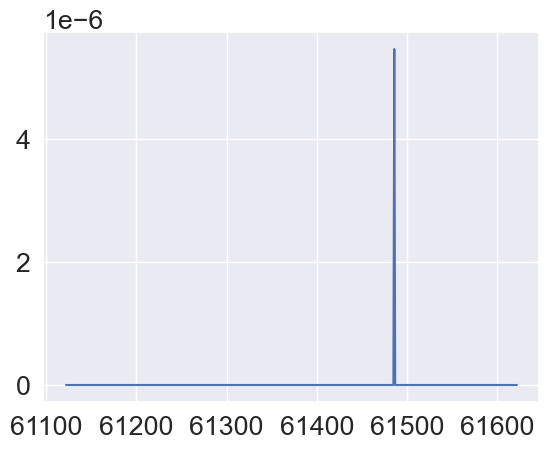

In [140]:
plt.plot(diff_tab)

In [141]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


In [142]:
IT_tab[339]

0.0144

In [143]:
D_tab[339]

0.238

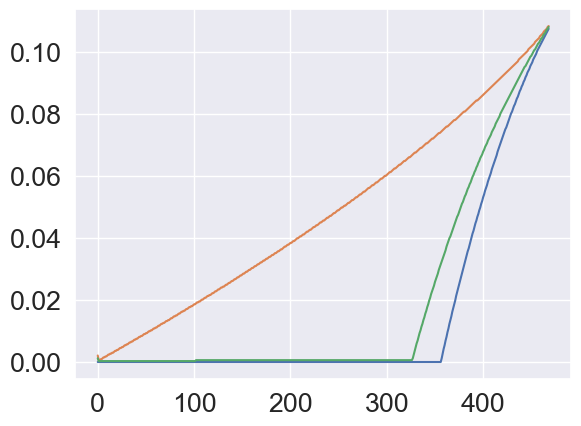

In [144]:
x_lim=469
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

### Df_flat and plot

In [145]:
y_s = r"$\delta m$"

#### Pickle

In [105]:
df = data_frame_tot
#DATA MANIPULATION
T_list = np.sort(df[T_s].unique())
d_list = np.sort(df[D_s].unique())

len_T = len(T_list)
len_d= len(d_list)

y_tab = np.zeros((len_T,len_d))
d_tab = np.zeros((len_T,len_d))
T_tab = np.zeros((len_T,len_d))

for i_T,T in enumerate(T_list):
    for i_d,d in enumerate(d_list):
        y_tab[i_T][i_d] = df[(df[T_s]==T) & (df[D_s]==d)][y_s].values[0]
        T_tab[i_T][i_d] = T
        d_tab[i_T][i_d] = d
df_flat = pd.DataFrame({T_s:T_tab.flatten(),D_s:d_tab.flatten(),y_s:y_tab.flatten()})

with lzma.open("../Data_flat/df_Deci_spT_Sph.xz", "wb") as f:
        pickle.dump(df_flat, f)

#### Load

In [146]:
with lzma.open("../Data_flat/df_Deci_spT_Sph.xz", "rb") as f:
    df_flat = pickle.load(f)

In [147]:
df_flat[T_s].unique()[340:]

array([0.102 , 0.1023, 0.1026, 0.1029, 0.1032, 0.1035, 0.1038, 0.1041,
       0.1044, 0.1047, 0.105 , 0.1053, 0.1056, 0.1059, 0.1062, 0.1065,
       0.1068, 0.1071, 0.1074, 0.1077, 0.108 , 0.1083, 0.1086, 0.1089,
       0.1092, 0.1095, 0.1098, 0.1101, 0.1104, 0.1107, 0.111 , 0.1113,
       0.1116, 0.1119, 0.1122, 0.1125, 0.1128, 0.1131, 0.1134, 0.1137,
       0.114 , 0.1143, 0.1146, 0.1149, 0.1152, 0.1155, 0.1158, 0.1161,
       0.1164, 0.1167, 0.117 , 0.1173, 0.1176, 0.1179, 0.1182, 0.1185,
       0.1188, 0.1191, 0.1194, 0.1197, 0.12  , 0.1203, 0.1206, 0.1209,
       0.1212, 0.1215, 0.1218, 0.1221, 0.1224, 0.1227, 0.123 , 0.1233,
       0.1236, 0.1239, 0.1242, 0.1245, 0.1248, 0.1251, 0.1254, 0.1257,
       0.126 , 0.1263, 0.1266, 0.1269, 0.1272, 0.1275, 0.1278, 0.1281,
       0.1284, 0.1287, 0.129 , 0.1293, 0.1296, 0.1299, 0.1302, 0.1305,
       0.1308, 0.1311, 0.1314, 0.1317, 0.132 , 0.1323, 0.1326, 0.1329,
       0.1332, 0.1335, 0.1338, 0.1341, 0.1344, 0.1347, 0.135 , 0.1353,
      

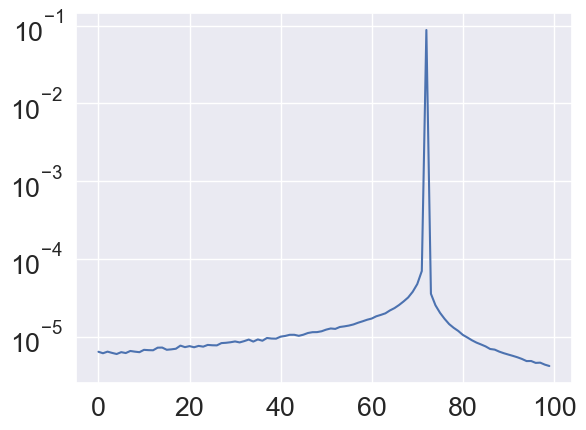

In [148]:
plt.plot(df_flat[abs(df_flat[T_s]-0.1095) < 1e-6][400:500][r"$\delta m$"].values)
plt.yscale("log")

In [149]:
df_flat[abs(df_flat[T_s]-0.1095) < 1e-6][450:500]

$\theta$  $\Delta/\rho^2$  $\delta m$
182950    0.1095           0.3157    0.000012
182951    0.1095           0.3164    0.000013
182952    0.1095           0.3171    0.000013
182953    0.1095           0.3178    0.000013
182954    0.1095           0.3185    0.000014
182955    0.1095           0.3192    0.000014
182956    0.1095           0.3199    0.000014
182957    0.1095           0.3206    0.000015
182958    0.1095           0.3213    0.000016
182959    0.1095           0.3220    0.000017
182960    0.1095           0.3227    0.000017
182961    0.1095           0.3234    0.000018
182962    0.1095           0.3241    0.000019
182963    0.1095           0.3248    0.000020
182964    0.1095           0.3255    0.000022
182965    0.1095           0.3262    0.000023
182966    0.1095           0.3269    0.000026
182967    0.1095           0.3276    0.000028
182968    0.1095           0.3283    0.000032
182969    0.1095           0.3290    0.000038
182970    0.1095           0.3297    0.000047
182971    0.1095           0.3304    0.000070
182972    0.1095           0.3311    0.087937
182973    0.1095           0.3318    0.000036
182974    0.1095           0.3325    0.000025
182975    0.1095           0.3332    0.000020
182976    0.1095           0.3339    0.000017
182977    0.1095           0.3346    0.000015
182978    0.1095           0.3353    0.000013
182979    0.1095           0.3360    0.000012
182980    0.1095           0.3367    0.000011
182981    0.1095           0.3374    0.000010
182982    0.1095           0.3381    0.000009
182983    0.1095           0.3388    0.000008
182984    0.1095           0.3395    0.000008
182985    0.1095           0.3402    0.000008
182986    0.1095           0.3409    0.000007
182987    0.1095           0.3416    0.000007
182988    0.1095           0.3423    0.000006
182989    0.1095           0.3430    0.000006
182990    0.1095           0.3437    0.000006
182991    0.1095           0.3444    0.000006
182992    0.1095           0.3451    0.000005
182993    0.1095           0.3458    0.000005
182994    0.1095           0.3465    0.000005
182995    0.1095           0.3472    0.000005
182996    0.1095           0.3479    0.000005
182997    0.1095           0.3486    0.000005
182998    0.1095           0.3493    0.000004
182999    0.1095           0.3500    0.000004

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/1752768682.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)


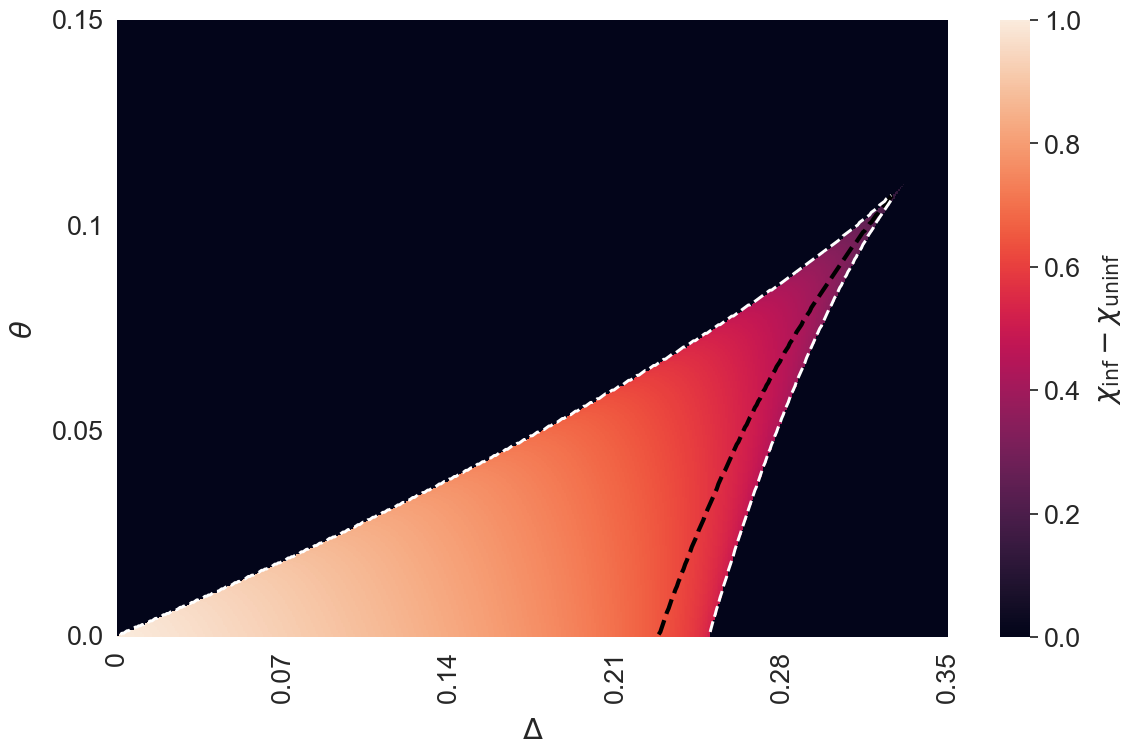

In [150]:
x_lim=469
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_flat.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks([0,100,200,300,400,500])
ax.set_xticklabels([0,df_flat[D_s].unique()[99].round(3),df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[299].round(3),df_flat[D_s].unique()[399].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks([0,166,333,500])
ax.set_yticklabels([df_flat[T_s].unique()[0].round(3),df_flat[T_s].unique()[166].round(3),df_flat[T_s].unique()[333].round(3),df_flat[T_s].unique()[500].round(3)])
ax.plot(np.arange(326,x_lim),IT_tab[326:x_lim]*501/0.15,"--",color="black",lw=3.)
ax.plot(np.arange(357,x_lim-1),sp1_tab[357:x_lim-1]*501/0.15,"--",color="white",lw=2.15)
ax.plot(np.arange(2,x_lim-2),sp2_tab[2:x_lim-2]*501/0.15,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_Deci_SphT.png", dpi=600)

##### Compressed image

In [151]:
D_cut = np.sort(data_frame_tot[D_s].unique())[0::3]
T_cut = np.sort(data_frame_tot[T_s].unique())[0::3]
df_cut = df_flat.loc[(df_flat[D_s].isin(D_cut)) & (df_flat[T_s].isin(T_cut))]

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/2931651933.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_cut.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)


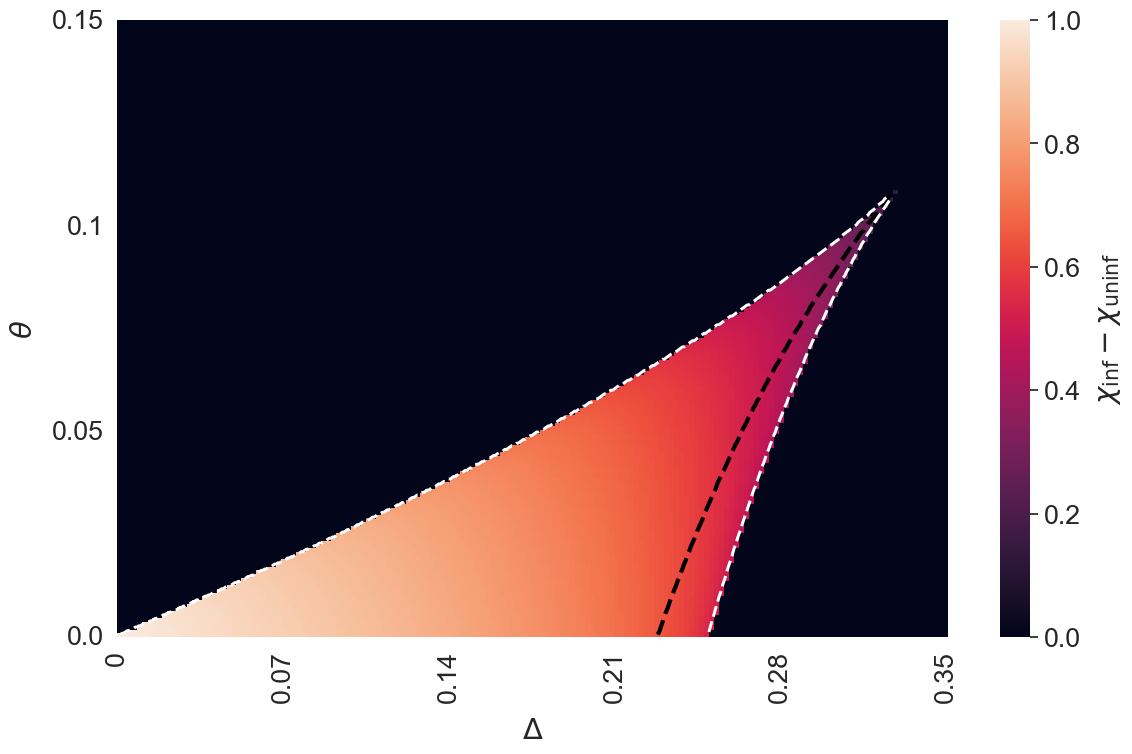

In [153]:
x_lim=469
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Rademacher prior, {rho_s} = 1",vmin=0.,vmax=1.)
ax = sns.heatmap(df_cut.pivot(T_s,D_s,y_s),vmin=0.,vmax=1.)
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_xticks(np.array([0,100,200,300,400,500])/3)
ax.set_xticklabels([0,df_flat[D_s].unique()[99].round(3),df_flat[D_s].unique()[199].round(3),df_flat[D_s].unique()[299].round(3),df_flat[D_s].unique()[399].round(3),df_flat[D_s].unique()[499].round(3)])
ax.set_yticks(np.array([0,166,333,500])/3)
ax.set_yticklabels([df_flat[T_s].unique()[0].round(3),df_flat[T_s].unique()[166].round(3),df_flat[T_s].unique()[333].round(3),df_flat[T_s].unique()[500].round(3)])
ax.plot(np.arange(326,x_lim)/3,(IT_tab[326:x_lim]*501/0.15)/3,"--",color="black",lw=3.)
ax.plot(np.arange(357,x_lim-1)/3,(sp1_tab[357:x_lim-1]*501/0.15)/3,"--",color="white",lw=2.15)
ax.plot(np.arange(2,x_lim-2)/3,(sp2_tab[2:x_lim-2]*501/0.15)/3,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(f"../Figures/PhD_Deci_SphT.pdf")

## Binary perceptron

In [333]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_Perceptron/PD/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}$  $m_{inf}  \
0        0.00     0            51.0          23.0     0.400691       1.0   
1        0.02     1            51.0          23.0     0.412880       1.0   
2        0.04     2            51.0          23.0     0.424759       1.0   
3        0.06     3            52.0          23.0     0.436340       1.0   
4        0.08     4            52.0          23.0     0.447635       1.0   

   $\delta m$  $\log Z_{uninf}$  $\log Z_{inf}$  $\delta logZ$  $\alpha$  \
0    0.599309          0.433655        0.693152       0.259497    0.6984   
1    0.587120          0.429587        0.683152       0.253565    0.6984   
2    0.575241          0.425398        0.673152       0.247754    0.6984   
3    0.563660          0.421093        0.663152       0.242060    0.6984   
4    0.552365          0.416673        0.653152       0.236480    0.6984   

   g2min  g2max   Ng  
0    0.0   13.0  651  
1    0.0   13.0  651  
2    0.0   13.0  651  
3    0.0   13.0  651  
4    0.0   13.0  651

In [334]:
alpha_s = r"$\alpha$"
diff_logZ_s = r"$\delta logZ$"
diffm_s = r"$\delta m$"

#### Free energy

In [335]:
a_tab = np.sort(data_frame_tot[alpha_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())

In [336]:
a_tab[170:200]

array([0.408 , 0.4104, 0.4128, 0.4152, 0.4176, 0.42  , 0.4224, 0.4248,
       0.4272, 0.4296, 0.432 , 0.4344, 0.4368, 0.4392, 0.4416, 0.444 ,
       0.4464, 0.4488, 0.4512, 0.4536, 0.456 , 0.4584, 0.4608, 0.4632,
       0.4656, 0.468 , 0.4704, 0.4728, 0.4752, 0.4776])

In [337]:
diff_tab = data_frame_tot[data_frame_tot[alpha_s]==a_tab[35]][diff_logZ_s]
m_u_tab = data_frame_tot[data_frame_tot[alpha_s]==a_tab[35]][r"$m_{uninf}$"]
m_i_tab = data_frame_tot[data_frame_tot[alpha_s]==a_tab[35]][r"$m_{inf}"]
g2_tab = data_frame_tot[data_frame_tot[alpha_s]==a_tab[35]][g2_s]

In [338]:
g2_tab

173817     0.00
173818     0.02
173819     0.04
173820     0.06
173821     0.08
          ...  
174463    12.92
174464    12.94
174465    12.96
174466    12.98
174467    13.00
Name: $\gamma^2$, Length: 651, dtype: float64

In [339]:
logzi_tab = data_frame_tot[data_frame_tot[g2_s]==g2_tab.values[0]][logZi_s]
logzu_tab = data_frame_tot[data_frame_tot[g2_s]==g2_tab.values[0]][logZu_s]

In [340]:
logzi_tab.values[0]

0.693152215651935

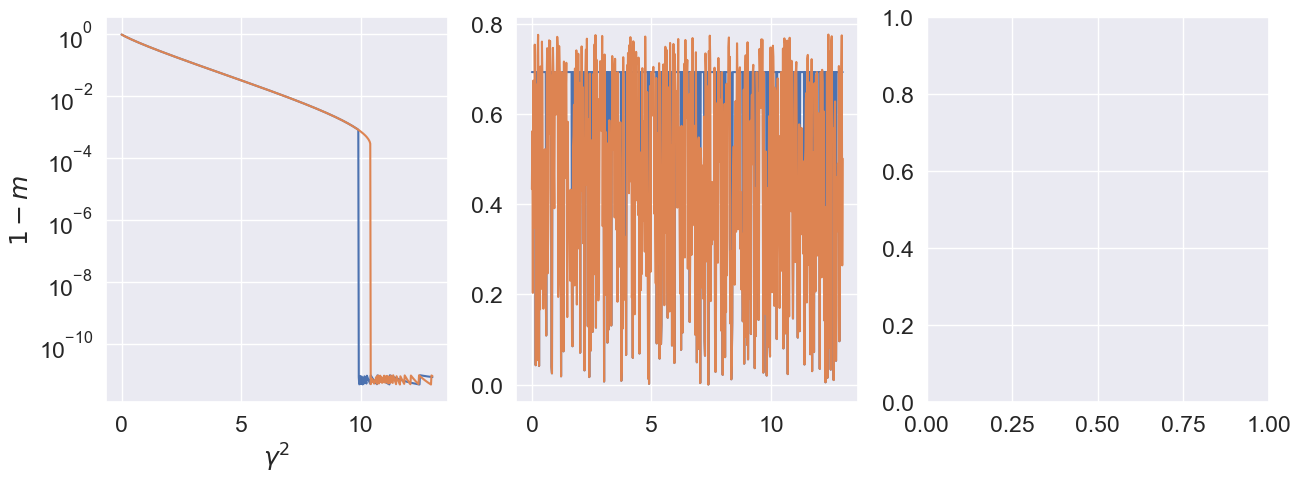

In [341]:
sns.set_theme(font_scale=1.5)
fig,axs = plt.subplots(1,3,figsize=(15,5))
axs[0].plot(g2_tab,1-m_i_tab)
axs[0].plot(g2_tab,1-m_u_tab)
axs[0].set_xlabel(g2_s)
axs[0].set_ylabel(r"$1-m$")
axs[0].set_yscale("log")
axs[1].plot(g2_tab,logzi_tab)
axs[1].plot(g2_tab, logzu_tab)
#axs[1].set_yscale("log")

<Axes: xlabel='$\\alpha$', ylabel='$\\log Z_{uninf}$'>

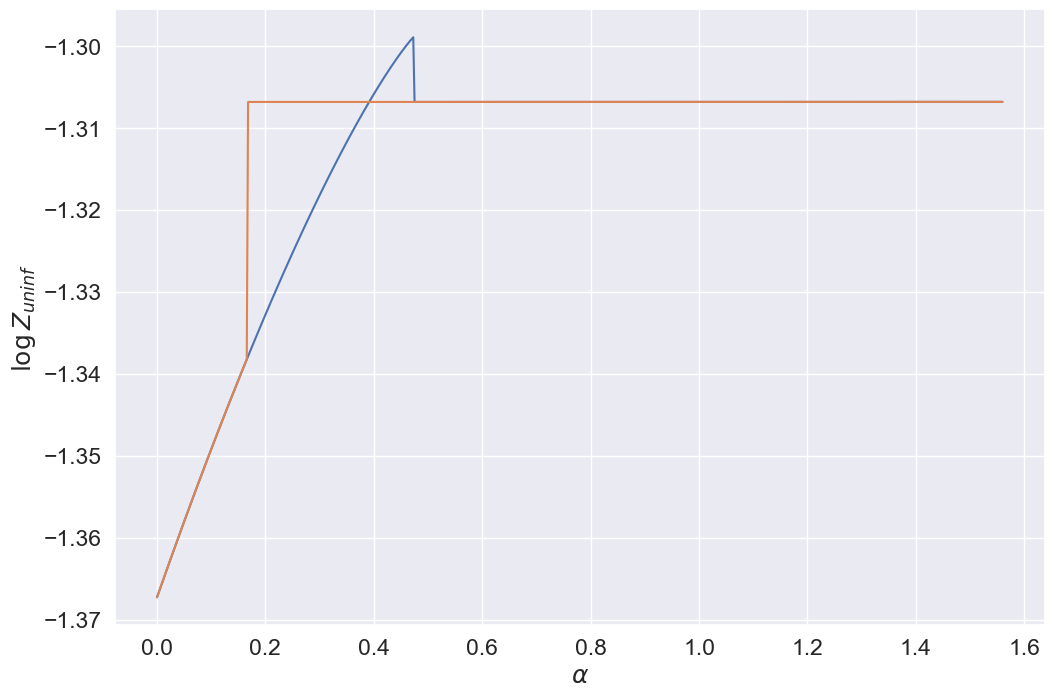

In [345]:
sns.set_theme(font_scale=1.5)   
fig,axs = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(data=data_frame_tot[data_frame_tot[g2_s]==4.],x=alpha_s,y=logZu_s,ax=axs)
sns.lineplot(data=data_frame_tot[data_frame_tot[g2_s]==4.],x=alpha_s,y=logZi_s,ax=axs)

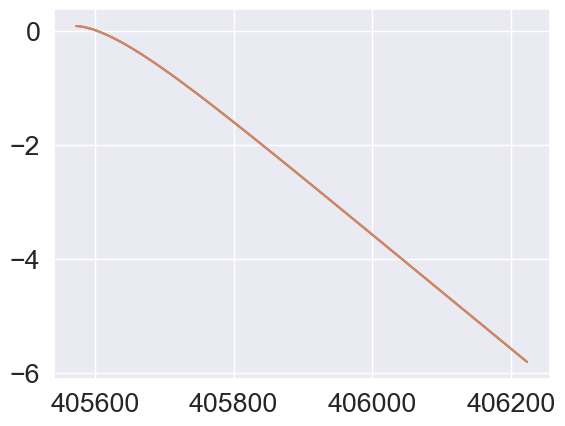

In [586]:
plt.plot(logzi_tab)
plt.plot(logzu_tab)

In [509]:
sp1_tab = np.zeros(len(a_tab))
sp2_tab = np.zeros(len(a_tab))
IT_tab = np.zeros(len(a_tab))
for i,a in enumerate(a_tab):
    diff_tab = diff_tab = data_frame_tot[data_frame_tot[alpha_s]==a][diff_logZ_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-6:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


In [510]:
sp2_tab

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 11.54,
       11.4 , 11.26, 11.12, 11.  , 10.88, 10.76, 10.64, 10.52, 10.42,
       10.3 , 10.2 , 10.1 , 10.  ,  9.92,  9.82,  9.72,  9.64,  9.56,
        9.48,  9.38,  9.3 ,  9.22,  9.16,  9.08,  9.  ,  8.92,  8.86,
        8.78,  8.72,  8.66,  8.58,  8.52,  8.46,  8.4 ,  8.34,  8.28,
        8.22,  8.16,  8.1 ,  8.04,  7.98,  7.92,  7.88,  7.82,  7.76,
        7.72,  7.66,  7.62,  7.56,  7.52,  7.46,  7.42,  7.36,  7.32,
        7.28,  7.22,  7.18,  7.14,  7.1 ,  7.06,  7.  ,  6.96,  6.92,
        6.88,  6.84,  6.8 ,  6.76,  6.72,  6.68,  6.64,  6.6 ,  6.56,
        6.54,  6.5 ,  6.46,  6.42,  6.38,  6.34,  6.32,  6.28,  6.24,
        6.2 ,  6.18,  6.14,  6.1 ,  6.08,  6.04,  6.  ,  5.98,  5.94,
        5.92,  5.88,  5.86,  5.82,  5.8 ,  5.76,  5.74,  5.7 ,  5.68,
        5.64,  5.62,

In [511]:
g_tab[222]

4.44

In [512]:
D_tab[340]

0.9778

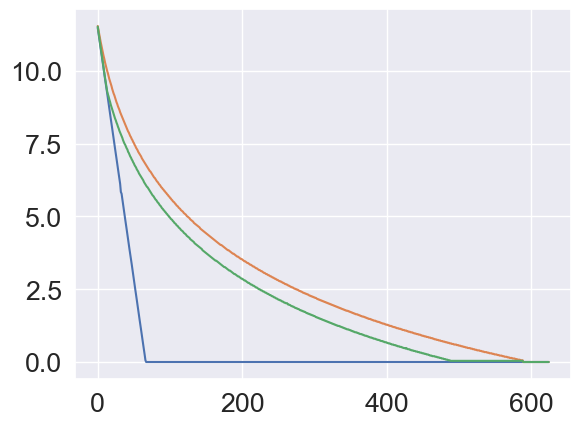

In [513]:
x_lim=26
plt.plot(sp1_tab[x_lim:],"-")
plt.plot(sp2_tab[x_lim:],"-")
plt.plot(IT_tab[x_lim:],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

### Df_flat and plot

#### Pickle

In [468]:
df = data_frame_tot
y_s = diffm_s
#DATA MANIPULATION
g_list = np.sort(df[g2_s].unique())
a_list = np.sort(df[alpha_s].unique())

len_g = len(g_list)
len_a= len(a_list)

y_tab = np.zeros((len_g,len_a))
a_tab = np.zeros((len_g,len_a))

g_tab = np.zeros((len_g,len_a))

for i_g,g in enumerate(g_list):
    for i_a,a in enumerate(a_list):
        y_tab[i_g][i_a] = df[(df[g2_s]==g) & (df[alpha_s]==a)][y_s].values[0]
        g_tab[i_g][i_a] = g
        a_tab[i_g][i_a] = a
df_flat = pd.DataFrame({g2_s:g_tab.flatten(),alpha_s:a_tab.flatten(),y_s:y_tab.flatten()})

#with lzma.open("./Data_flat/df_Perceptron.xz", "wb") as f:
#        pickle.dump(df_flat, f)

#### Load

In [470]:
with lzma.open("./Data_flat/df_Perceptron.xz", "rb") as f:
    df_flat = pickle.load(f)

In [471]:
df_flat[g2_s].unique()[340:]

array([ 6.8 ,  6.82,  6.84,  6.86,  6.88,  6.9 ,  6.92,  6.94,  6.96,
        6.98,  7.  ,  7.02,  7.04,  7.06,  7.08,  7.1 ,  7.12,  7.14,
        7.16,  7.18,  7.2 ,  7.22,  7.24,  7.26,  7.28,  7.3 ,  7.32,
        7.34,  7.36,  7.38,  7.4 ,  7.42,  7.44,  7.46,  7.48,  7.5 ,
        7.52,  7.54,  7.56,  7.58,  7.6 ,  7.62,  7.64,  7.66,  7.68,
        7.7 ,  7.72,  7.74,  7.76,  7.78,  7.8 ,  7.82,  7.84,  7.86,
        7.88,  7.9 ,  7.92,  7.94,  7.96,  7.98,  8.  ,  8.02,  8.04,
        8.06,  8.08,  8.1 ,  8.12,  8.14,  8.16,  8.18,  8.2 ,  8.22,
        8.24,  8.26,  8.28,  8.3 ,  8.32,  8.34,  8.36,  8.38,  8.4 ,
        8.42,  8.44,  8.46,  8.48,  8.5 ,  8.52,  8.54,  8.56,  8.58,
        8.6 ,  8.62,  8.64,  8.66,  8.68,  8.7 ,  8.72,  8.74,  8.76,
        8.78,  8.8 ,  8.82,  8.84,  8.86,  8.88,  8.9 ,  8.92,  8.94,
        8.96,  8.98,  9.  ,  9.02,  9.04,  9.06,  9.08,  9.1 ,  9.12,
        9.14,  9.16,  9.18,  9.2 ,  9.22,  9.24,  9.26,  9.28,  9.3 ,
        9.32,  9.34,

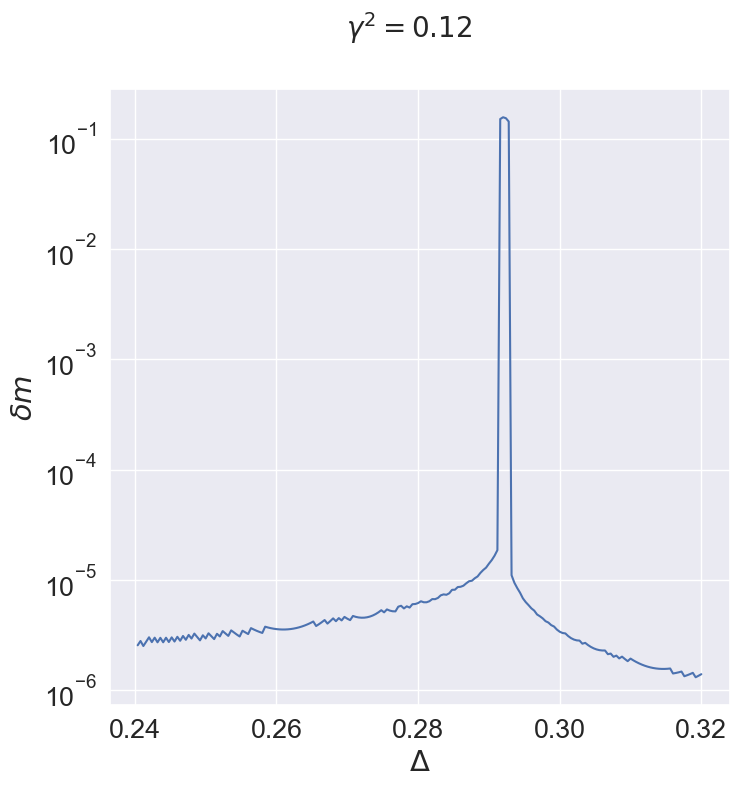

In [ ]:
fig,ax = plt.subplots(figsize=(8,8))
fig.suptitle(r"$\gamma^2=0.12$",fontsize=20)
plt.plot(df_flat[abs(df_flat[g2_s]-0.12) < 1e-6][600:800][D_s].values,df_flat[abs(df_flat[g2_s]-0.12) < 1e-6][600:800][diff_s].values)
plt.yscale("log")
plt.xlabel(Delta_s)
plt.ylabel(r"$\delta m$")
fig.savefig(f"Figures/diff_g20.12.png", dpi=600)

In [491]:
from matplotlib import colors, ticker
x_lim=650

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_75546/1393382045.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(g2_s,alpha_s,y_s),norm=colors.SymLogNorm(vmin=0,vmax=1.,linthresh=1e-3))


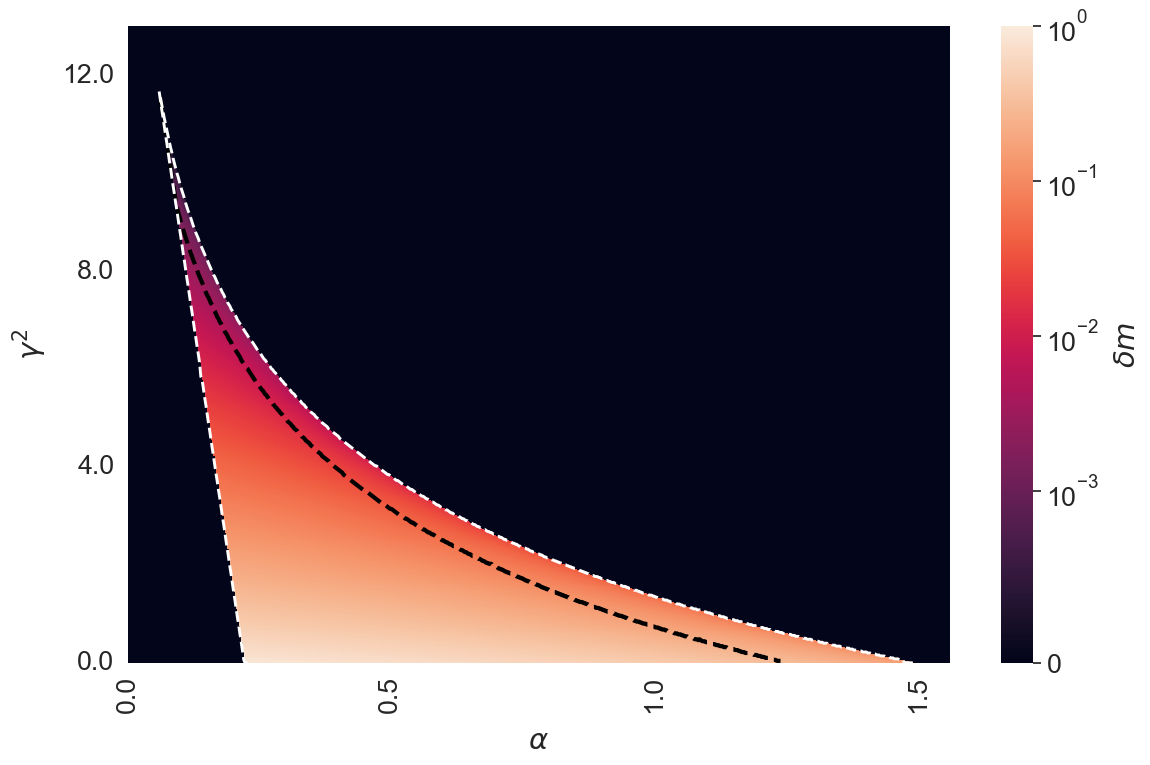

In [517]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,8))
#plt.suptitle(f"Spike tensor model, {p_s} = 3, Gaussian prior")
ax = sns.heatmap(df_flat.pivot(g2_s,alpha_s,y_s),norm=colors.SymLogNorm(vmin=0,vmax=1.,linthresh=1e-3))
ax.invert_yaxis()
#ax.set_ylim([0,40])
ax.set_ylabel(r"$\gamma^2$")
ax.set_xticks([0,208,417,626])
ax.set_xticklabels([df_flat[alpha_s].unique()[0].round(2),df_flat[alpha_s].unique()[207].round(2),df_flat[alpha_s].unique()[416].round(2),df_flat[alpha_s].unique()[625].round(2)])
ax.set_yticks([0,200,400,600])
ax.set_yticklabels([df_flat[g2_s].unique()[0].round(2),df_flat[g2_s].unique()[200].round(2),df_flat[g2_s].unique()[400].round(2),df_flat[g2_s].unique()[600].round(2)])
ax.plot(np.arange(26,518),IT_tab[26:518]*651/13,"--",color="black",lw=3.)
ax.plot(np.arange(25,96),sp1_tab[25:96]*651/13,"--",color="white",lw=2.1)
ax.plot(np.arange(26,625),sp2_tab[26:625]*651/13,"--",color="white",lw=2.1)
plt.tight_layout()
ax.set_xlabel(alpha_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(r"$\delta m$", labelpad=10)
#ax.set_yticks(np.arange(0.,0.03,0.005))
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
fig.savefig(f"Figures/PhD_Perceptron.png", dpi=600)

# NAESAT

## Diffusion

In [860]:
#load_dir = '../Data2/DataDiff/'
load_dir = '../Data/'
save_dir = '../Figures/Diff/'

In [861]:
gamma2_s=r"$\gamma^2$"
ov0_s=r"OV_0"
ov1_s=r"OV_1"
delta_ov_s=r"$\delta OV$"
delta_ov2_s=r"$\delta OV$"
q1_0_s=r"$q_{1,0}$"
q1_1_s=r"$q_{1,1}$"
delta_q1_s=r"$\delta q_1$"
logZ0_s=r"logZ_0"
logZ1_s=r"logZ_1"
delta_logZ_s=r"$\delta logZ$"
epsBrd_s=r"$\epsilon_{brd}$"
epsRcs_s=r"$\epsilon_{rcs}$"
K_s=r"$K$"
N_s=r"$N$"
alpha_s=r"$\alpha$"
g2min_s=r"$\gamma^2_{min}$"
g2max_s=r"$\gamma^2_{max}$"
g2step_s=r"$\gamma^2_{step}$"
start_s = "start"
mI_s="maxIter"
seed_s="seed"

In [862]:
#it_space
it_space=10
log_space = np.unique(np.logspace(0,3,140, dtype=int))

In [863]:
filename="DF_TR_DataDD_PD.xz"
#filename="K5DF_BP_20230127-170038.xz"
with lzma.open(load_dir + filename, "rb") as f:
    data_frame = pickle.load(f)
#data_frame[epsBrd_s2] = data_frame[epsBrd_s]

In [864]:
df = data_frame

#### Old

<Axes: xlabel='$\\gamma^2$', ylabel='$\\delta q_1$'>

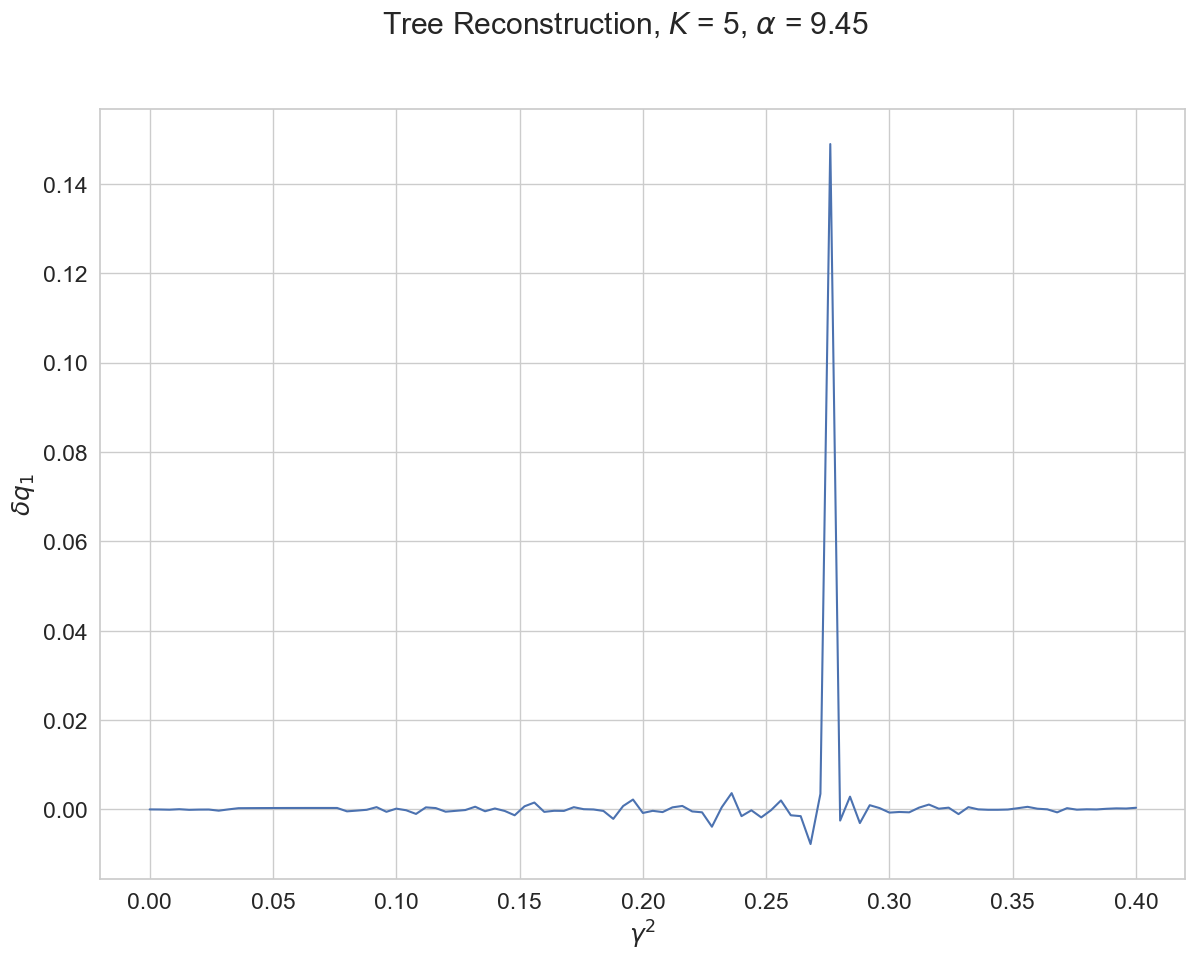

In [865]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(14,10))
plt.suptitle(f"Tree Reconstruction, {K_s} = 5, {alpha_s} = 9.45" )
sns.lineplot(data=df[df[alpha_s]==8.5], x=gamma2_s, y=delta_q1_s, legend="full", ax=ax, markers=True)
#ax.set_xscale("log")
#fig.savefig(save_dir + f"OV_BP_K5_EBP0_alpha9.7.pdf")

<Axes: xlabel='$\\gamma^2$', ylabel='$\\delta logZ$'>

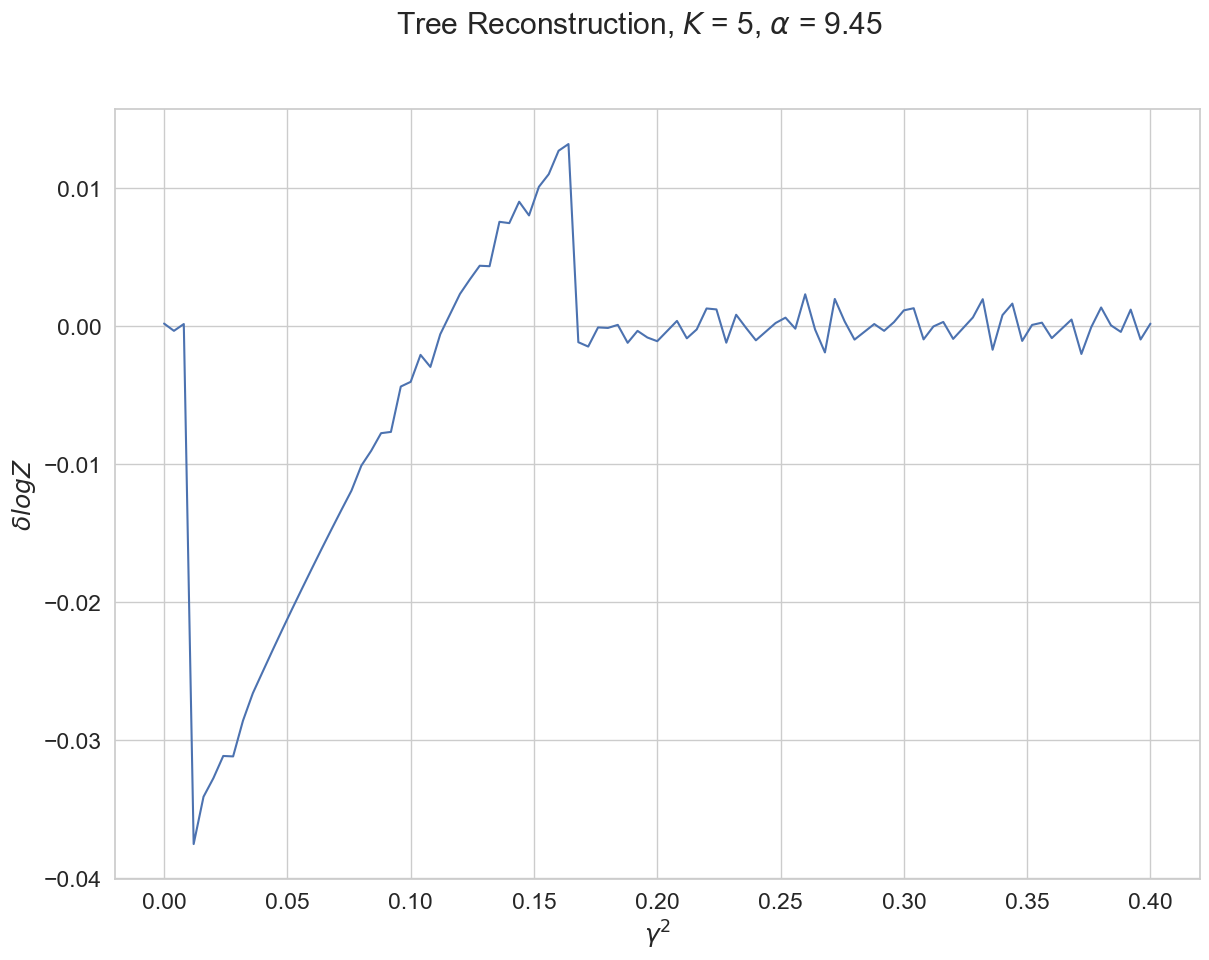

In [866]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(14,10))
plt.suptitle(f"Tree Reconstruction, {K_s} = 5, {alpha_s} = 9.45" )
sns.lineplot(data=df[df[alpha_s]==9.44], x=gamma2_s, y=delta_logZ_s, legend="full", ax=ax, markers=True)
#ax.set_xscale("log")
#fig.savefig(save_dir + f"OV_BP_K5_EBP0_alpha9.7.pdf")

In [867]:
a_tab = np.sort(df[alpha_s].unique())
g2_tab = np.sort(df[gamma2_s].unique())

In [868]:
diff_tab = df[df[alpha_s]==9.6][delta_logZ_s].to_numpy()
g2_tab = df[df[alpha_s]==9.6][gamma2_s].to_numpy()
sorted_diff_tab = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])
g2_tab = np.sort(g2_tab)

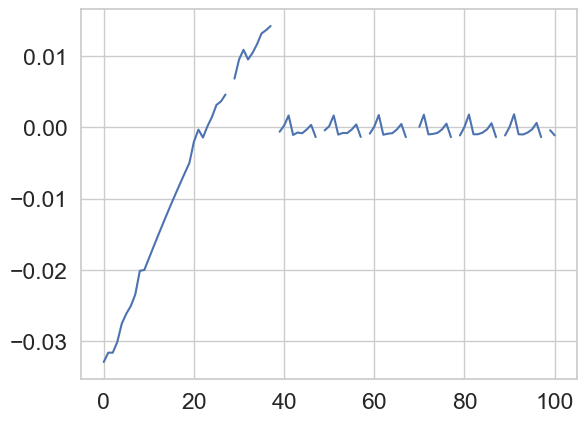

In [869]:
plt.plot(sorted_diff_tab)

In [870]:
sp1_tab = np.zeros(len(a_tab))
sp2_tab = np.zeros(len(a_tab))
IT_tab = np.zeros(len(a_tab))
for i,a in enumerate(a_tab):
    diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
    g2_tab = df[df[alpha_s]==a][gamma2_s].to_numpy()
    sorted_diff_tab = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])   
    g2_tab = np.sort(g2_tab)
    flag=0
    for j,d in enumerate(sorted_diff_tab):
        if abs(d)>1e-3:
            if flag==0:
                flag=1
                sp1_tab[i] = g2_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g2_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g2_tab[j]
                flag=3

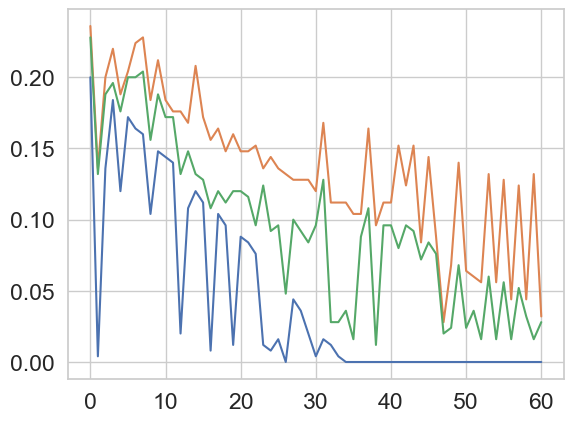

In [871]:
x_lim=40
plt.plot(sp1_tab[x_lim:],"-")
plt.plot(sp2_tab[x_lim:],"-")
plt.plot(IT_tab[x_lim:],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

#### New

In [872]:
y_s = delta_ov_s

In [873]:
#DATA MANIPULATION
g_list = np.sort(df[gamma2_s].unique())
a_list = np.sort(df[alpha_s].unique())

len_g = len(g_list)
len_a= len(a_list)

y_tab = np.zeros((len_g,len_a))
a_tab = np.zeros((len_g,len_a))
g_tab = np.zeros((len_g,len_a))

for i_g,g in enumerate(g_list):
    for i_a,a in enumerate(a_list):
        y_tab[i_g][i_a] = max(df[(df[gamma2_s]==g) & (df[alpha_s]==a)][y_s].values[0],0)
        g_tab[i_g][i_a] = g
        a_tab[i_g][i_a] = a
df_flat = pd.DataFrame({gamma2_s:g_tab.flatten(),alpha_s:a_tab.flatten(),y_s:y_tab.flatten()})

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/1614278350.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(gamma2_s,alpha_s,y_s),cbar_kws={'label': y_s})


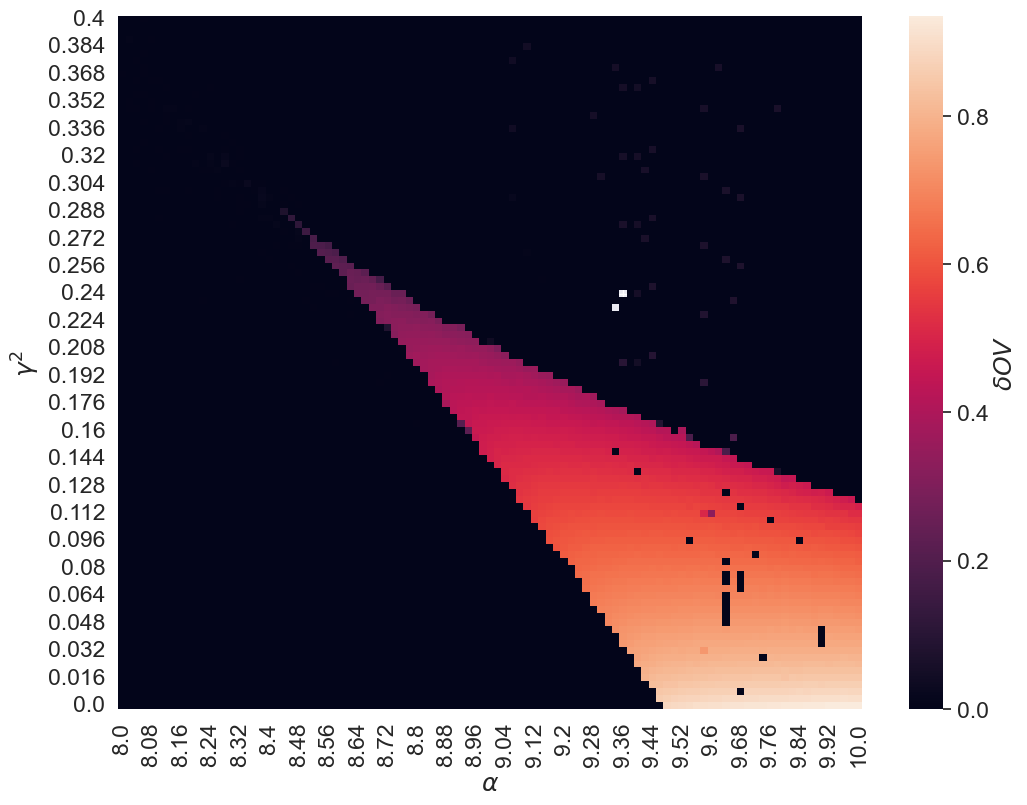

In [874]:
sns.set_theme(font_scale=1.5)
fig,ax = plt.subplots(figsize=(12,9))
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_flat.pivot(gamma2_s,alpha_s,y_s),cbar_kws={'label': y_s})
ax.invert_yaxis()
#ax.set_ylim([0,40])
#ax.set_ylabel(r"$\gamma$")
#ax.set_xticks([0,100,200,300,400,500])
#ax.set_xticklabels([0.96,0.97,0.98,0.99,1.0,1.01])
#ax.set_yticks([0,100,200,300,400,500])
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(save_dir + f"PD_NAESAT.pdf")

#### Cleaning

In [875]:
df[delta_ov_s] = df[delta_ov_s].fillna(0)

In [876]:
a_tab = np.sort(df[alpha_s].unique())
g2_tab = np.sort(df[gamma2_s].unique())

In [877]:
for i_a,a in enumerate(a_tab):
    for i,g2 in enumerate(g2_tab):
        flag=0
        if (df[(df[alpha_s]==a) & (df[gamma2_s]==g2)][delta_ov_s].values[0] < 1e-2):
            for j in range(1,12):
                if ((i+j < 90)):
                    if ( (df[(df[alpha_s]==a) & (df[gamma2_s]==g2_tab[i+j])][delta_ov_s].values[0] > 1e-1)):
                        flag = flag + 1
            #print(g2,flag)
            if flag > 3: 
                df.loc[((df[alpha_s] == a) & (df[gamma2_s] == g2)), delta_ov_s] = df[(df[alpha_s]==a_tab[i_a-1]) & (df[gamma2_s]==g2)][delta_ov_s].values[0]
                #df.replace({alpha_s: a, gamma2_s: g2},df[(df[alpha_s]==a) & (df[gamma2_s]==g2_tab[i-1])][delta_ov_s].values[0])
                #df[(df[alpha_s]==a) & (df[gamma2_s]==g2)][delta_ov2_s] = df[(df[alpha_s]==a) & (df[gamma2_s]==g2_tab[i-1])][delta_ov_s].values[0]


In [878]:
a = 9.64
diff_tab = df[df[alpha_s]==a][delta_ov_s].to_numpy()
g2_tab = df[df[alpha_s]==a][gamma2_s].to_numpy()
y = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])  
y = np.array([yi if abs(yi)>1e-3 else 0 for yi in y ]) 
g2_tab = np.sort(g2_tab)
y

array([0.912811, 0.888705, 0.869687, 0.852174, 0.838197, 0.823373,
       0.811322, 0.79831 , 0.785871, 0.771983, 0.760453, 0.749223,
       0.739115, 0.728555, 0.718153, 0.707881, 0.697709, 0.685729,
       0.677574, 0.66756 , 0.656474, 0.647667, 0.638888, 0.627135,
       0.616712, 0.606701, 0.591998, 0.583361, 0.57056 , 0.558179,
       0.546987, 0.538025, 0.525573, 0.509136, 0.487249, 0.474809,
       0.453914, 0.185978, 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.074561,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.067265, 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.   

#### Curves

In [879]:
a_tab = np.sort(df[alpha_s].unique())
a_tab

array([ 8.  ,  8.02,  8.04,  8.06,  8.08,  8.1 ,  8.12,  8.14,  8.16,
        8.18,  8.2 ,  8.22,  8.24,  8.26,  8.28,  8.3 ,  8.32,  8.34,
        8.36,  8.38,  8.4 ,  8.42,  8.44,  8.46,  8.48,  8.5 ,  8.52,
        8.54,  8.56,  8.58,  8.6 ,  8.62,  8.64,  8.66,  8.68,  8.7 ,
        8.72,  8.74,  8.76,  8.78,  8.8 ,  8.82,  8.84,  8.86,  8.88,
        8.9 ,  8.92,  8.94,  8.96,  8.98,  9.  ,  9.02,  9.04,  9.06,
        9.08,  9.1 ,  9.12,  9.14,  9.16,  9.18,  9.2 ,  9.22,  9.24,
        9.26,  9.28,  9.3 ,  9.32,  9.34,  9.36,  9.38,  9.4 ,  9.42,
        9.44,  9.46,  9.48,  9.5 ,  9.52,  9.54,  9.56,  9.58,  9.6 ,
        9.62,  9.64,  9.66,  9.68,  9.7 ,  9.72,  9.74,  9.76,  9.78,
        9.8 ,  9.82,  9.84,  9.86,  9.88,  9.9 ,  9.92,  9.94,  9.96,
        9.98, 10.  ])

In [880]:
thr=1.5e-3
xlim=0

sp1_tab = np.zeros(len(a_tab[xlim:]))
sp2_tab = np.zeros(len(a_tab[xlim:]))
IT_tab = np.zeros(len(a_tab[xlim:]))
for i,a in enumerate(a_tab[xlim:]):
    diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
    g2_tab = df[df[alpha_s]==a][gamma2_s].to_numpy()
    y = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])  
    y = np.array([yi if abs(yi)>thr else 0 for yi in y ]) 
    g2_tab = np.sort(g2_tab)
    zeros =[]
    if a>9.46: 
        flag=1
        sp1_tab[i] = 0.
        for j,d in enumerate(y):
            #print(j,d,flag)
            if flag==1 :
                if (d<-thr):
                    pass
                    #print(g2_tab[j-1],g2_tab[j],d,flag)
                elif ((abs(d)<thr) | (d * y[j-1]<0)):
                    #print(g2_tab[j-1],g2_tab[j],d,flag)
                    zeros.append(g2_tab[j])
                elif (d>thr):
                    #print(g2_tab[j-1],g2_tab[j],d,flag)
                    IT_tab[i] = np.array(zeros).mean()
                    flag=2
            if flag==2:
                if (abs(d)<thr ):
                    if (np.mean(y[j:j+6])<thr):
                        sp2_tab[i] = g2_tab[j]
                        flag=3
    else: 
        flag=0
        for j,d in enumerate(y):
            if flag==0 :
                if (abs(d)>thr):
                    flag=1
                    sp1_tab[i] = g2_tab[j-1]
            if flag==1 :
                if (d<-thr):
                    pass
                elif (abs(d)<thr):
                    zeros.append(g2_tab[j])
                elif (d>thr):
                    IT_tab[i] = np.array(zeros).mean()
                    flag=2
            if flag==2:
                if (abs(d)<thr ):
                    if (np.mean(y[j:j+6])<thr):
                        sp2_tab[i] = g2_tab[j]
                        flag=3

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/1368528771.py:48: RuntimeWarning: Mean of empty slice.
  IT_tab[i] = np.array(zeros).mean()
/Users/ghio/opt/anaconda3/envs/Diff/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [881]:
np.mean(y[j:j+6])

0.0

In [882]:
len(sp2_tab)

101

In [883]:
a_tab

array([ 8.  ,  8.02,  8.04,  8.06,  8.08,  8.1 ,  8.12,  8.14,  8.16,
        8.18,  8.2 ,  8.22,  8.24,  8.26,  8.28,  8.3 ,  8.32,  8.34,
        8.36,  8.38,  8.4 ,  8.42,  8.44,  8.46,  8.48,  8.5 ,  8.52,
        8.54,  8.56,  8.58,  8.6 ,  8.62,  8.64,  8.66,  8.68,  8.7 ,
        8.72,  8.74,  8.76,  8.78,  8.8 ,  8.82,  8.84,  8.86,  8.88,
        8.9 ,  8.92,  8.94,  8.96,  8.98,  9.  ,  9.02,  9.04,  9.06,
        9.08,  9.1 ,  9.12,  9.14,  9.16,  9.18,  9.2 ,  9.22,  9.24,
        9.26,  9.28,  9.3 ,  9.32,  9.34,  9.36,  9.38,  9.4 ,  9.42,
        9.44,  9.46,  9.48,  9.5 ,  9.52,  9.54,  9.56,  9.58,  9.6 ,
        9.62,  9.64,  9.66,  9.68,  9.7 ,  9.72,  9.74,  9.76,  9.78,
        9.8 ,  9.82,  9.84,  9.86,  9.88,  9.9 ,  9.92,  9.94,  9.96,
        9.98, 10.  ])

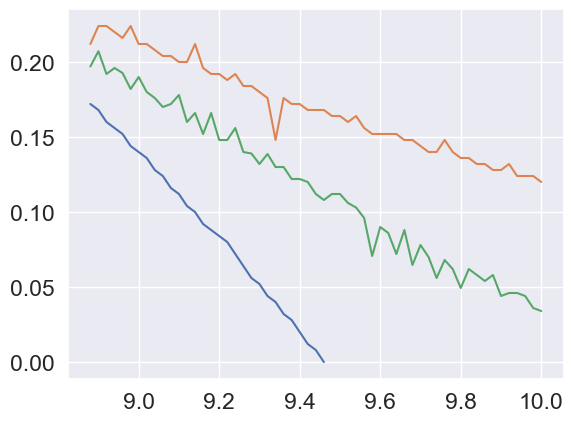

In [884]:
x_lim=44
x2_lim=74
plt.plot(a_tab[x_lim:x2_lim],sp1_tab[x_lim:x2_lim],"-")
plt.plot(a_tab[x_lim:],sp2_tab[x_lim:],"-")
plt.plot(a_tab[x_lim:],IT_tab[x_lim:],"-")
#plt.xlim([700,750])

### linear fit

In [885]:
np.polyfit(a_tab[x_lim:],IT_tab[x_lim:],1)

array([-0.15358677,  1.56544155])

In [886]:
it_fit = np.polyfit(a_tab[x_lim:],IT_tab[x_lim:],2)
sp2_fit = np.polyfit(a_tab[x_lim+1:],sp2_tab[x_lim+1:],2)
sp1_fit = np.polyfit(a_tab[x_lim-5:x2_lim],sp1_tab[x_lim-5:x2_lim],2)

(0.0, 0.4)

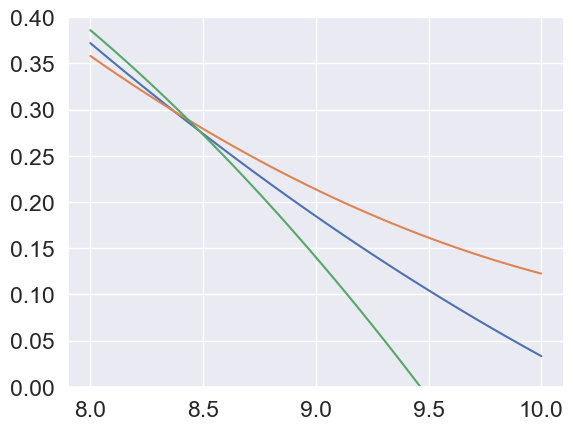

In [887]:
plt.plot(a_tab,np.polyval(it_fit,a_tab),"-")
plt.plot(a_tab,np.polyval(sp2_fit,a_tab),"-")
plt.plot(a_tab,np.polyval(sp1_fit,a_tab),"-")
plt.ylim([0,0.4])

In [888]:
a = 9.28

In [889]:
diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
g2_tab = df[df[alpha_s]==a][gamma2_s].to_numpy()
y = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])
y = np.array([yi if abs(yi)>thr else 0 for yi in y ])
g2_tab = np.sort(g2_tab)

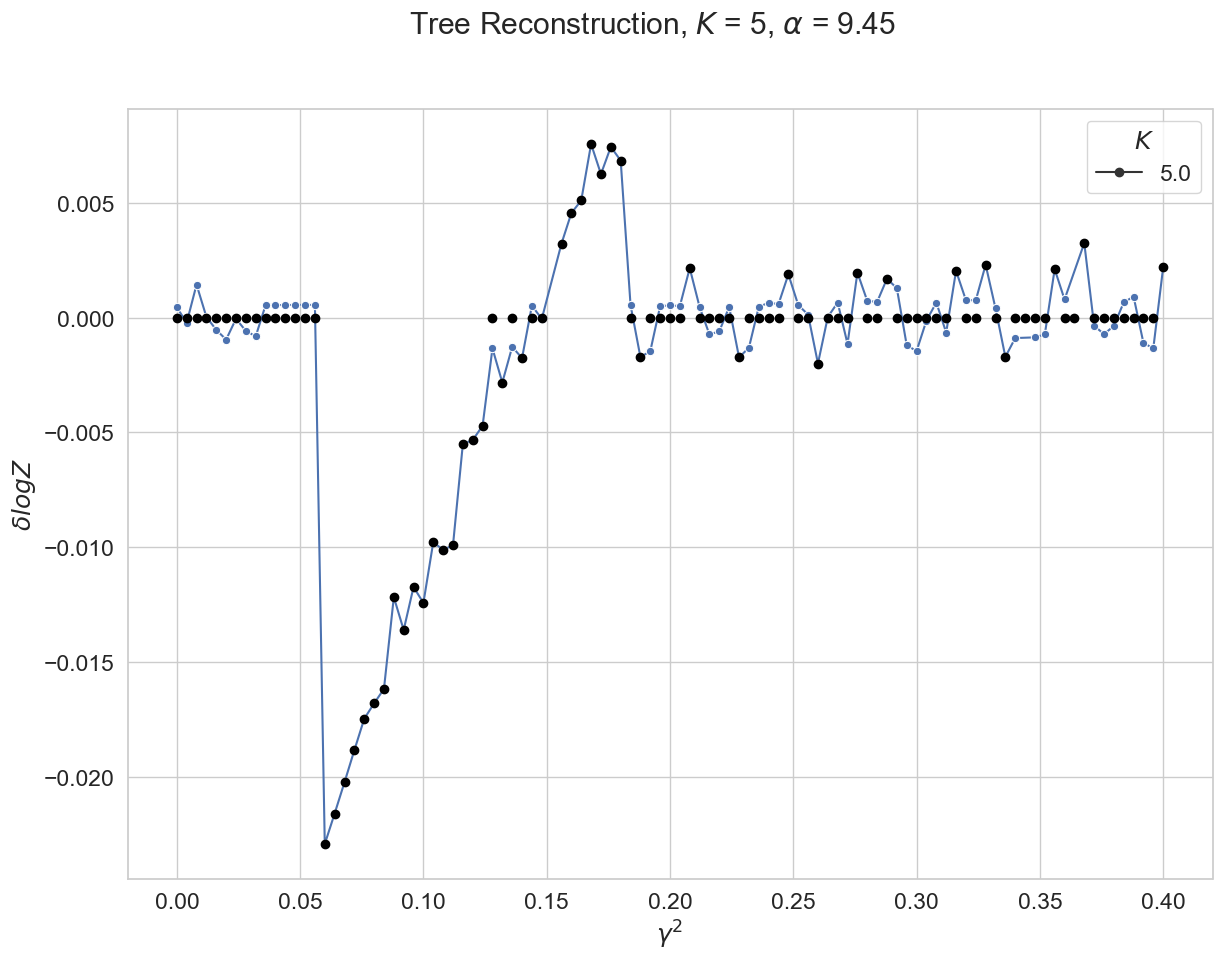

In [890]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(14,10))
plt.suptitle(f"Tree Reconstruction, {K_s} = 5, {alpha_s} = 9.45" )
sns.lineplot(data=df[df[alpha_s]==a], x=gamma2_s, y=delta_logZ_s, style=K_s, legend="full", ax=ax, markers=True)
ax.plot(g2_tab,y,"o",color="black")
#ax.set_xscale("log")
#fig.savefig(save_dir + f"OV_BP_K5_EBP0_alpha9.7.pdf")

In [891]:
np.mean(y[29:29+6])

-0.003061666666666667

In [892]:
y[27]

-0.01012

In [893]:
a_tab[64]

9.28

In [894]:
g2_tab[28]

0.112

In [895]:
print(sp1_tab[64],IT_tab[64],sp2_tab[64])

0.056 0.139 0.184


In [896]:
diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
g2_tab = df[df[alpha_s]==a][gamma2_s].to_numpy()
y = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])
g2_tab = np.sort(g2_tab)

In [897]:
y = np.array([yi if abs(yi)>2e-3 else 0 for yi in y ])

In [898]:
from scipy.signal import savgol_filter
yhat = savgol_filter(y, 30, 4) # window size 51, polynomial order 3

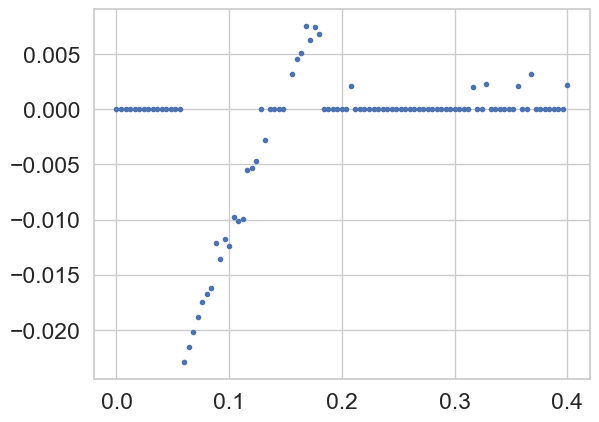

In [899]:
plt.plot(g2_tab,y,".")

In [900]:
i=0
thr=1e-3
diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
g2_tab = df[df[alpha_s]==a][gamma2_s].to_numpy()
y = np.array([diff for _,diff in sorted(zip(g2_tab,diff_tab))])  
y = np.array([yi if abs(yi)>thr else 0 for yi in y ]) 
g2_tab = np.sort(g2_tab)
zeros =[]
if a>9.46: 
    print("a>9.46")
    flag==1
    sp1_tab[i] = g2_tab[0]
    for j,d in enumerate(y):
        if flag==1 :
            if (d<-thr):
                print("neg")
            elif ((abs(d)<thr) | (d * y[j-1]<0)):
                zeros.append(g2_tab[j])
                print("zero")
            elif (d>thr):
                print("pos")
                IT_tab[i] = np.array(zeros).mean()
                flag=2
        if flag==2:
            if (abs(d)<1e-6 ):
                sp2_tab[i] = g2_tab[j]
                flag=3

In [901]:
y

array([ 0.      ,  0.      ,  0.001437,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      , -0.022926, -0.021598, -0.020236,
       -0.018839, -0.01747 , -0.0168  , -0.016171, -0.012174, -0.013602,
       -0.011732, -0.012423, -0.009777, -0.01012 , -0.009908, -0.005499,
       -0.005334, -0.004709, -0.00134 , -0.002828, -0.001274, -0.001761,
        0.      ,  0.      ,      -inf,  0.003224,  0.004553,  0.005101,
        0.007559,  0.006252,  0.007435,  0.006841,  0.      , -0.001716,
       -0.001467,  0.      ,  0.      ,  0.      ,  0.002156,  0.      ,
        0.      ,  0.      ,  0.      , -0.001732, -0.001311,  0.      ,
        0.      ,  0.      ,  0.001884,  0.      ,  0.      , -0.001999,
        0.      ,  0.      , -0.001145,  0.001961,  0.      ,  0.      ,
        0.001696,  0.001277, -0.001206, -0.001454,  0.      ,  0.      ,
        0.      ,  0.002039,  0.      ,  0.      , 

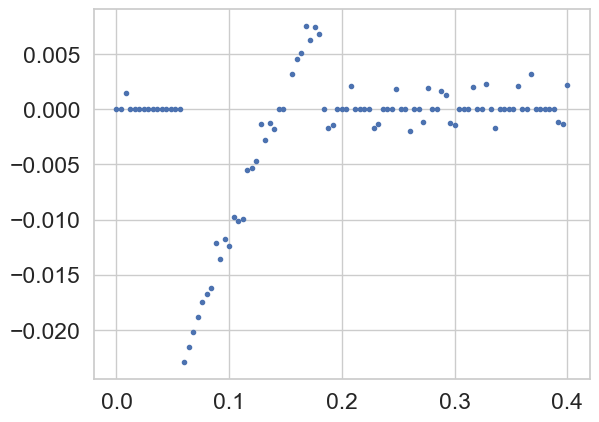

In [902]:
plt.plot(g2_tab,y,".")

In [903]:
sp1_tab[0]

0.36

In [904]:
IT_tab[0]

nan

In [905]:
IT_tab[0]=0

In [906]:
y_s = delta_ov_s

In [907]:
#DATA MANIPULATION
g_list = np.sort(df[gamma2_s].unique())
a_list = np.sort(df[alpha_s].unique())

len_g = len(g_list)
len_a= len(a_list)

y_tab = np.zeros((len_g,len_a))
aa_tab = np.zeros((len_g,len_a))
g_tab = np.zeros((len_g,len_a))

for i_g,g in enumerate(g_list):
    for i_a,a in enumerate(a_list):
        y_tab[i_g][i_a] = max(df[(df[gamma2_s]==g) & (df[alpha_s]==a)][y_s].values[0],0)
        g_tab[i_g][i_a] = g
        aa_tab[i_g][i_a] = a
df_flat = pd.DataFrame({gamma2_s:g_tab.flatten(),alpha_s:aa_tab.flatten(),y_s:y_tab.flatten()})

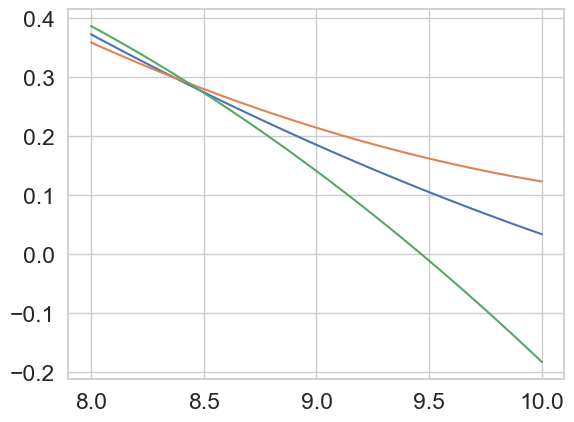

In [782]:
plt.plot(a_tab,np.polyval(it_fit,a_tab),"-")
plt.plot(a_tab,np.polyval(sp2_fit,a_tab),"-")
plt.plot(a_tab,np.polyval(sp1_fit,a_tab),"-")

In [908]:
it_fit_diff = it_fit
sp2_fit_diff = sp2_fit
sp1_fit_diff = sp1_fit

In [407]:
(a_tab-8)*20

array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
        4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
        8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
       13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
       17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. , 20.4, 20.8, 21.2, 21.6,
       22. , 22.4, 22.8, 23.2, 23.6, 24. , 24.4, 24.8, 25.2, 25.6, 26. ,
       26.4, 26.8, 27.2, 27.6, 28. , 28.4, 28.8, 29.2, 29.6, 30. , 30.4,
       30.8, 31.2, 31.6, 32. , 32.4, 32.8, 33.2, 33.6, 34. , 34.4, 34.8,
       35.2, 35.6, 36. , 36.4, 36.8, 37.2, 37.6, 38. , 38.4, 38.8, 39.2,
       39.6, 40. ])

In [408]:
a_tab[22:]

array([ 8.44,  8.46,  8.48,  8.5 ,  8.52,  8.54,  8.56,  8.58,  8.6 ,
        8.62,  8.64,  8.66,  8.68,  8.7 ,  8.72,  8.74,  8.76,  8.78,
        8.8 ,  8.82,  8.84,  8.86,  8.88,  8.9 ,  8.92,  8.94,  8.96,
        8.98,  9.  ,  9.02,  9.04,  9.06,  9.08,  9.1 ,  9.12,  9.14,
        9.16,  9.18,  9.2 ,  9.22,  9.24,  9.26,  9.28,  9.3 ,  9.32,
        9.34,  9.36,  9.38,  9.4 ,  9.42,  9.44,  9.46,  9.48,  9.5 ,
        9.52,  9.54,  9.56,  9.58,  9.6 ,  9.62,  9.64,  9.66,  9.68,
        9.7 ,  9.72,  9.74,  9.76,  9.78,  9.8 ,  9.82,  9.84,  9.86,
        9.88,  9.9 ,  9.92,  9.94,  9.96,  9.98, 10.  ])

In [ ]:
ax.plot((a_tab[22:]-8)*50.5,np.polyval(it_fit,a_tab)[22:]*252.5,"--",color="black",lw=3.)
ax.plot((a_tab[22:]-8)*50.5,np.polyval(sp1_fit,a_tab)[22:]*252.5,"--",color="white",lw=2.15)
ax.plot((a_tab[22:]-8)*50.5,np.polyval(sp2_fit,a_tab)[22:]*252.5,"--",color="white",lw=2.15)

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/1524377711.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(gamma2_s,alpha_s,y_s),vmin=0.,vmax=1.)


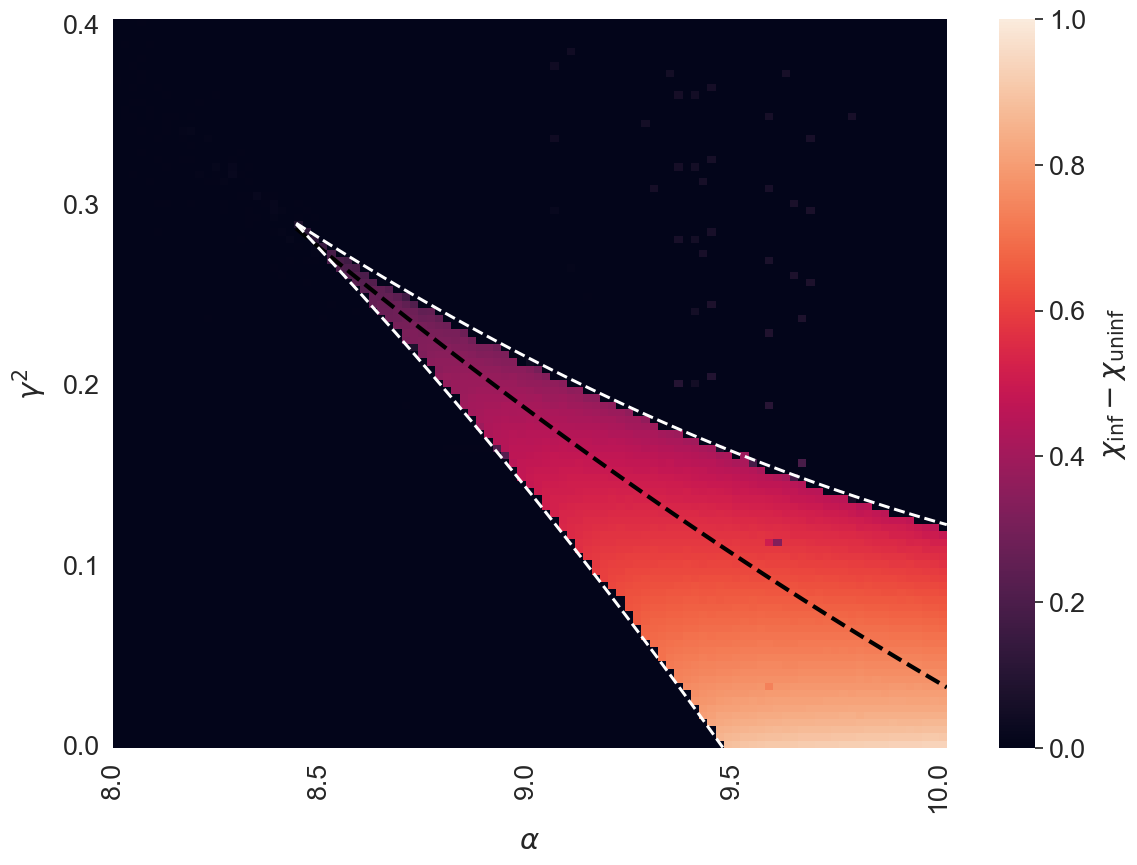

In [205]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,9))
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_flat.pivot(gamma2_s,alpha_s,y_s),vmin=0.,vmax=1.)
ax.set_xticks([0,25,50,75,100])
ax.set_xticklabels([df_flat[alpha_s].unique()[0],df_flat[alpha_s].unique()[25].round(2),df_flat[alpha_s].unique()[50].round(2),df_flat[alpha_s].unique()[75].round(2),df_flat[alpha_s].unique()[100].round(2)])
ax.set_yticks([0,25,50,75,100])
ax.set_yticklabels([df_flat[gamma2_s].unique()[0],df_flat[gamma2_s].unique()[25].round(2),df_flat[gamma2_s].unique()[50].round(2),df_flat[gamma2_s].unique()[75].round(2),df_flat[gamma2_s].unique()[100].round(2)])
ax.invert_yaxis()
ax.plot((a_tab[22:]-8)*50.5,np.polyval(it_fit,a_tab)[22:]*252.5,"--",color="black",lw=3.)
ax.plot((a_tab[22:]-8)*50.5,np.polyval(sp1_fit,a_tab)[22:]*252.5,"--",color="white",lw=2.15)
ax.plot((a_tab[22:]-8)*50.5,np.polyval(sp2_fit,a_tab)[22:]*252.5,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(alpha_s,labelpad=10)
ax.set_ylabel(gamma2_s,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)

#ax.set_ylim([0,40])
#fig.savefig(save_dir + f"PhD_NAESAT.png",dpi=600)
#fig.savefig("../Figures/PhD_NAESAT.pdf")

## Decimation

In [931]:
#load_dir = '../Data2/DataDiff/'
load_dir = '../Data/'
save_dir = '../Figures/Diff/'

In [932]:
theta_S=r"$\theta$"
ov0_s=r"OV_0"
ov1_s=r"OV_1"
delta_ov_s=r"$\delta OV$"
q1_0_s=r"$q_{1,0}$"
q1_1_s=r"$q_{1,1}$"
delta_q1_s=r"$\delta q_1$"
logZ0_s=r"logZ_0"
logZ1_s=r"logZ_1"
delta_logZ_s=r"$\delta logZ$"
epsBrd_s=r"$\epsilon_{brd}$"
epsRcs_s=r"$\epsilon_{rcs}$"
K_s=r"$K$"
N_s=r"$N$"
alpha_s=r"$\alpha$"
Tmin_s=r"$\theta_{min}$"
Tmax_s=r"$\theta_{max}$"
Tstep_s=r"$\theta_{step}$"
start_s = "start"
mI_s="maxIter"
seed_s="seed"

In [933]:
#it_space
it_space=10
log_space = np.unique(np.logspace(0,3,140, dtype=int))

In [934]:
filename="DF_DDT_Data_DD_PD_Deci.xz"
#filename="K5DF_BP_20230127-170038.xz"
with lzma.open(load_dir + filename, "rb") as f:
    data_frame = pickle.load(f)
#data_frame[epsBrd_s2] = data_frame[epsBrd_s]

In [935]:
df = data_frame

#### Old

<Axes: xlabel='$\\theta$', ylabel='$\\delta q_1$'>

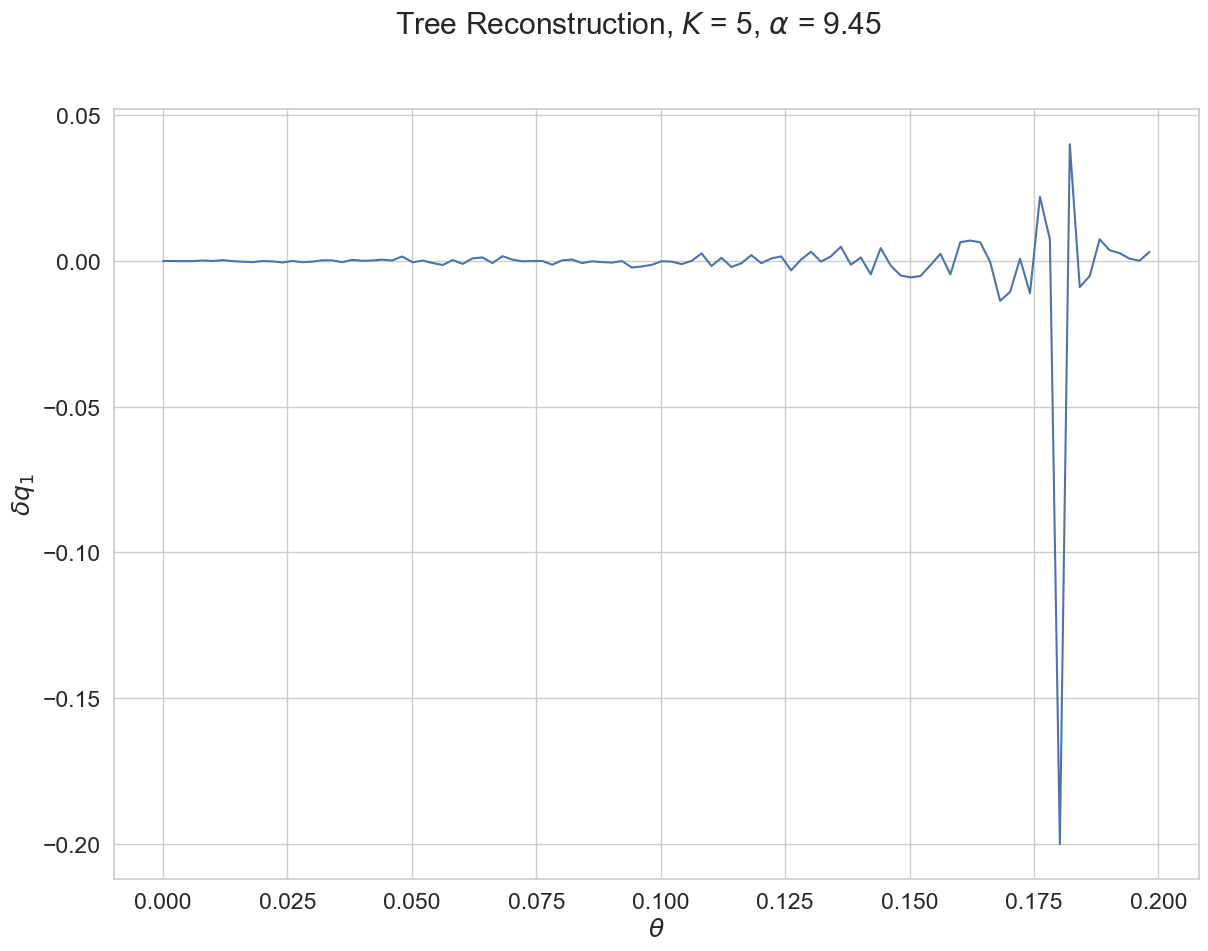

In [936]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(14,10))
plt.suptitle(f"Tree Reconstruction, {K_s} = 5, {alpha_s} = 9.45" )
sns.lineplot(data=df[df[alpha_s]==8.3], x=theta_S, y=delta_q1_s, legend="full", ax=ax, markers=True)
#ax.set_xscale("log")
#fig.savefig(save_dir + f"OV_BP_K5_EBP0_alpha9.7.pdf")

<Axes: xlabel='$\\theta$', ylabel='$\\delta logZ$'>

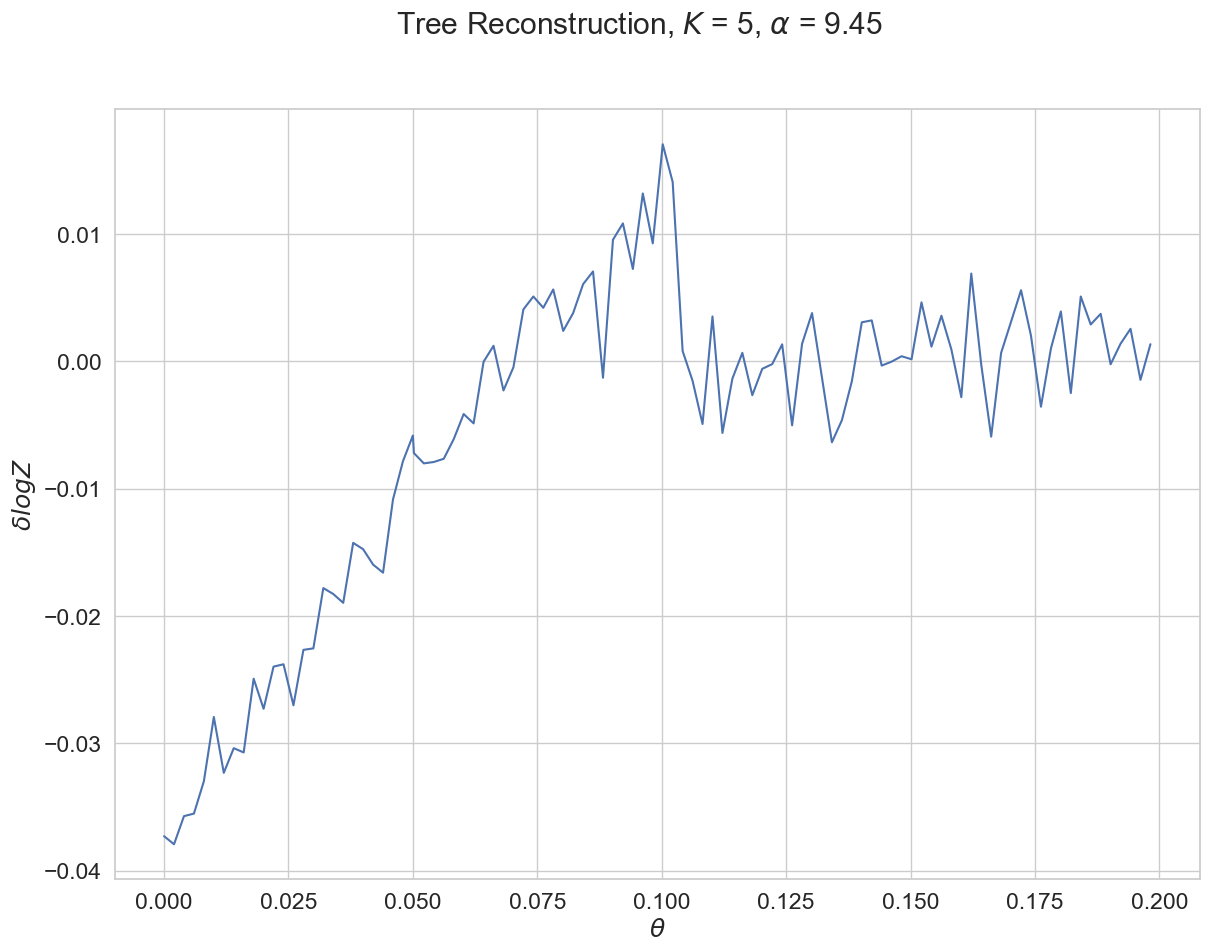

In [937]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(14,10))
plt.suptitle(f"Tree Reconstruction, {K_s} = 5, {alpha_s} = 9.45" )
sns.lineplot(data=df[df[alpha_s]==9.5], x=theta_S, y=delta_logZ_s, legend="full", ax=ax, markers=True)
#ax.set_xscale("log")
#fig.savefig(save_dir + f"OV_BP_K5_EBP0_alpha9.7.pdf")

In [938]:
a_tab = np.sort(df[alpha_s].unique())
T_tab = np.sort(df[theta_S].unique())

In [939]:
diff_tab = df[df[alpha_s]==9.6][delta_logZ_s].to_numpy()
T_tab = df[df[alpha_s]==9.6][theta_S].to_numpy()
sorted_diff_tab = np.array([diff for _,diff in sorted(zip(T_tab,diff_tab))])
T_tab = np.sort(T_tab)

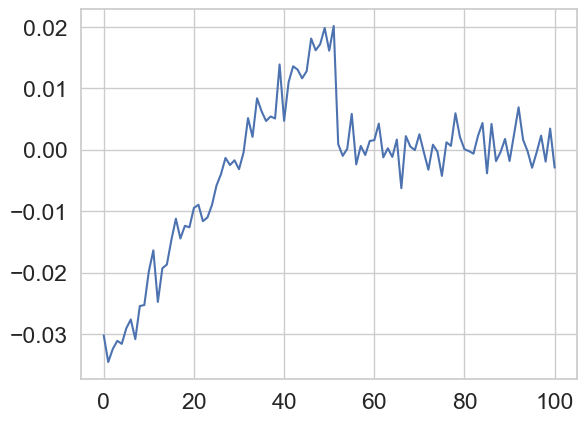

In [940]:
plt.plot(sorted_diff_tab)

In [941]:
sp1_tab = np.zeros(len(a_tab))
sp2_tab = np.zeros(len(a_tab))
IT_tab = np.zeros(len(a_tab))
for i,a in enumerate(a_tab):
    diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
    T_tab = df[df[alpha_s]==a][theta_S].to_numpy()
    sorted_diff_tab = np.array([diff for _,diff in sorted(zip(T_tab,diff_tab))])   
    T_tab = np.sort(T_tab)
    flag=0
    for j,d in enumerate(sorted_diff_tab):
        if abs(d)>4e-3:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3

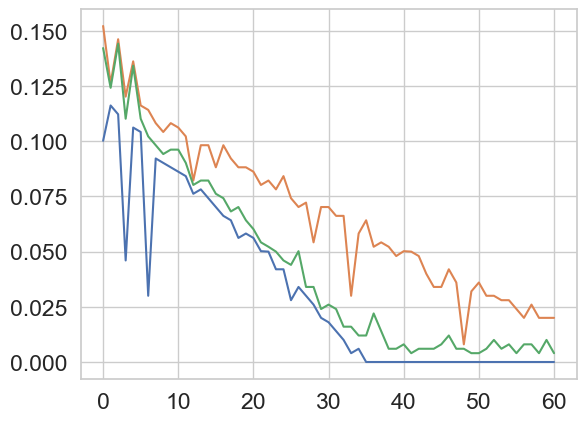

In [942]:
x_lim=40
plt.plot(sp1_tab[x_lim:],"-")
plt.plot(sp2_tab[x_lim:],"-")
plt.plot(IT_tab[x_lim:],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

#### New

In [943]:
y_s = delta_ov_s

In [944]:
#DATA MANIPULATION
T_list = np.sort(df[theta_S].unique())
a_list = np.sort(df[alpha_s].unique())

len_T = len(T_list)
len_a= len(a_list)

y_tab = np.zeros((len_T,len_a))
a_tab = np.zeros((len_T,len_a))
T_tab = np.zeros((len_T,len_a))

for i_T,T in enumerate(T_list):
    for i_a,a in enumerate(a_list):
        y_tab[i_T][i_a] = max(df[(df[theta_S]==T) & (df[alpha_s]==a)][y_s].values[0],0)
        T_tab[i_T][i_a] = T
        a_tab[i_T][i_a] = a
df_flat = pd.DataFrame({theta_S:T_tab.flatten(),alpha_s:a_tab.flatten(),y_s:y_tab.flatten()})

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/1993803009.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(theta_S,alpha_s,y_s),cbar_kws={'label': y_s})


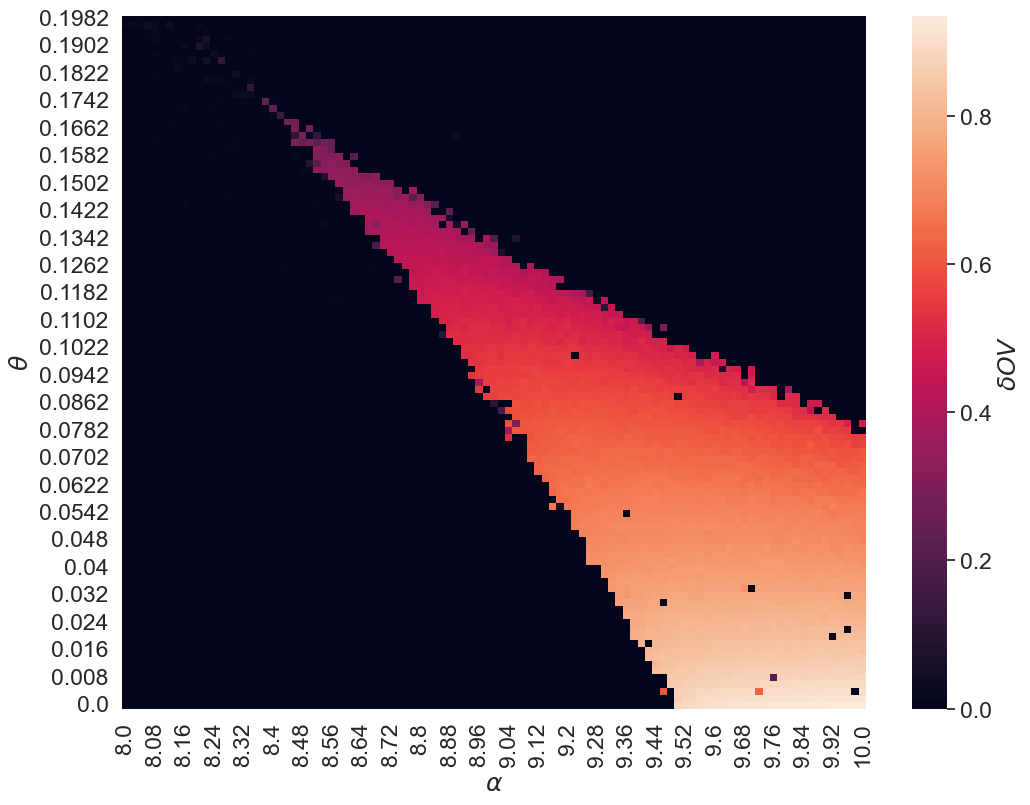

In [945]:
sns.set_theme(font_scale=1.5)
fig,ax = plt.subplots(figsize=(12,9))
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_flat.pivot(theta_S,alpha_s,y_s),cbar_kws={'label': y_s})
ax.invert_yaxis()
#ax.set_ylim([0,40])
#ax.set_ylabel(r"$\gamma$")
#ax.set_xticks([0,100,200,300,400,500])
#ax.set_xticklabels([0.96,0.97,0.98,0.99,1.0,1.01])
#ax.set_yticks([0,100,200,300,400,500])
#ax.set_yticklabels([0.,0.006,0.012,0.018,0.024,0.03])
#fig.savefig(save_dir + f"PD_NAESAT.pdf")

### Cleaning

In [946]:
df[delta_ov_s] = df[delta_ov_s].fillna(0)

In [947]:
a_tab = np.sort(df[alpha_s].unique())
T_tab = np.sort(df[theta_S].unique())

In [948]:
for i_a,a in enumerate(a_tab):
    for i,T in enumerate(T_tab):
        flag=0
        if (df[(df[alpha_s]==a) & (df[theta_S]==T)][delta_ov_s].values[0] < 1e-2):
            for j in range(1,12):
                if ((i+j < 90)):
                    if ( (df[(df[alpha_s]==a) & (df[theta_S]==T_tab[i+j])][delta_ov_s].values[0] > 1e-1)):
                        flag = flag + 1
            #print(T,flag)
            if flag > 3: 
                df.loc[((df[alpha_s] == a) & (df[theta_S] == T)), delta_ov_s] = df[(df[alpha_s]==a_tab[i_a-1]) & (df[theta_S]==T)][delta_ov_s].values[0]
                #df.replace({alpha_s: a, theta_S: T},df[(df[alpha_s]==a) & (df[theta_S]==T_tab[i-1])][delta_ov_s].values[0])
                #df[(df[alpha_s]==a) & (df[theta_S]==T)][delta_ov2_s] = df[(df[alpha_s]==a) & (df[theta_S]==T_tab[i-1])][delta_ov_s].values[0]



In [949]:
a = 9.66
T = 0.

In [950]:
diff_tab = df[df[alpha_s]==a][delta_ov_s].to_numpy()
T_tab = df[df[alpha_s]==a][theta_S].to_numpy()
y = np.array([diff for _,diff in sorted(zip(T_tab,diff_tab))])  
y = np.array([yi if abs(yi)>1e-3 else 0 for yi in y ]) 
T_tab = np.sort(T_tab)
y

array([ 0.913545,  0.901631,  0.88874 ,  0.878722,  0.873812,  0.859724,
        0.854038,  0.845149,  0.835312,  0.827639,  0.81743 ,  0.810396,
        0.801934,  0.796305,  0.787475,  0.781031,  0.773111,  0.766854,
        0.764624,  0.751938,  0.746993,  0.732768,  0.729185,  0.724147,
        0.718132,  0.712576,  0.702397,  0.703632,  0.698288,  0.686155,
        0.680177,  0.675838,  0.66262 ,  0.664199,  0.649738,  0.647324,
        0.633467,  0.629225,  0.614934,  0.614197,  0.600284,  0.588998,
        0.560662,  0.565085,  0.567439,  0.549814,  0.537221,  0.527763,
        0.522342,  0.479   ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      , -0.00128 ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      , 

### Curves

In [951]:
a_tab

array([ 8.  ,  8.02,  8.04,  8.06,  8.08,  8.1 ,  8.12,  8.14,  8.16,
        8.18,  8.2 ,  8.22,  8.24,  8.26,  8.28,  8.3 ,  8.32,  8.34,
        8.36,  8.38,  8.4 ,  8.42,  8.44,  8.46,  8.48,  8.5 ,  8.52,
        8.54,  8.56,  8.58,  8.6 ,  8.62,  8.64,  8.66,  8.68,  8.7 ,
        8.72,  8.74,  8.76,  8.78,  8.8 ,  8.82,  8.84,  8.86,  8.88,
        8.9 ,  8.92,  8.94,  8.96,  8.98,  9.  ,  9.02,  9.04,  9.06,
        9.08,  9.1 ,  9.12,  9.14,  9.16,  9.18,  9.2 ,  9.22,  9.24,
        9.26,  9.28,  9.3 ,  9.32,  9.34,  9.36,  9.38,  9.4 ,  9.42,
        9.44,  9.46,  9.48,  9.5 ,  9.52,  9.54,  9.56,  9.58,  9.6 ,
        9.62,  9.64,  9.66,  9.68,  9.7 ,  9.72,  9.74,  9.76,  9.78,
        9.8 ,  9.82,  9.84,  9.86,  9.88,  9.9 ,  9.92,  9.94,  9.96,
        9.98, 10.  ])

In [952]:
thr=4.5e-3
xlim=0

sp1_tab = np.zeros(len(a_tab[xlim:]))
sp2_tab = np.zeros(len(a_tab[xlim:]))
IT_tab = np.zeros(len(a_tab[xlim:]))
for i,a in enumerate(a_tab[xlim:]):
    diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
    T_tab = df[df[alpha_s]==a][theta_S].to_numpy()
    y = np.array([diff for _,diff in sorted(zip(T_tab,diff_tab))])  
    y = np.array([yi if abs(yi)>thr else 0 for yi in y ]) 
    T_tab = np.sort(T_tab)
    zeros =[]
    if a>9.46: 
        flag=1
        sp1_tab[i] = 0.
        for j,d in enumerate(y):
            #print(j,d,flag)
            if flag==1 :
                if (d<-thr):
                    pass
                    #print(T_tab[j-1],T_tab[j],d,flag)
                elif ((abs(d)<thr) | (d * y[j-1]<0)):
                    #print(T_tab[j-1],T_tab[j],d,flag)
                    zeros.append(T_tab[j])
                elif (d>thr):
                    #print(T_tab[j-1],T_tab[j],d,flag)
                    IT_tab[i] = np.array(zeros).mean()
                    flag=2
            if flag==2:
                if (abs(d)<thr ):
                    if (np.mean(y[j:j+6])<thr):
                        sp2_tab[i] = T_tab[j]
                        flag=3
    else: 
        flag=0
        for j,d in enumerate(y):
            if flag==0 :
                if (abs(d)>thr):
                    flag=1
                    sp1_tab[i] = T_tab[j-1]
            if flag==1 :
                if (d<-thr):
                    pass
                elif (abs(d)<thr):
                    zeros.append(T_tab[j])
                elif (d>thr):
                    IT_tab[i] = np.array(zeros).mean()
                    flag=2
            if flag==2:
                if (abs(d)<thr ):
                    if (np.mean(y[j:j+14])<1e-1*thr):
                        sp2_tab[i] = T_tab[j]
                        flag=3

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_10530/2783805702.py:48: RuntimeWarning: Mean of empty slice.
  IT_tab[i] = np.array(zeros).mean()
/Users/ghio/opt/anaconda3/envs/Diff/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


#### corrections by hand

In [953]:
sp2_tab[65] = 0.12
sp2_tab[75] = 0.11
sp2_tab[84] = 0.09
sp2_tab[89] = 0.09
sp2_tab[94] = 0.08
IT_tab[65] = 0.08
IT_tab[73] = 0.07
IT_tab[74] = 0.07
sp1_tab[43] = 0.11

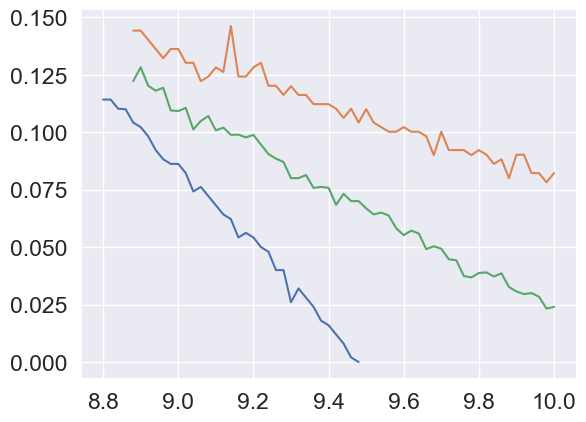

In [954]:
x_lim=44
x2_lim=75
x1_lim=40
plt.plot(a_tab[x1_lim:x2_lim],sp1_tab[x1_lim:x2_lim],"-")
plt.plot(a_tab[x_lim:],sp2_tab[x_lim:],"-")
plt.plot(a_tab[x_lim:],IT_tab[x_lim:],"-")
#plt.xlim([700,750])

In [955]:
a_tab[75]

9.5

In [956]:
diff_tab = df[df[alpha_s]==a][delta_logZ_s].to_numpy()
T_tab = df[df[alpha_s]==a][theta_S].to_numpy()
y = np.array([diff for _,diff in sorted(zip(T_tab,diff_tab))])
y = np.array([yi if abs(yi)>thr else 0 for yi in y ])
T_tab = np.sort(T_tab)

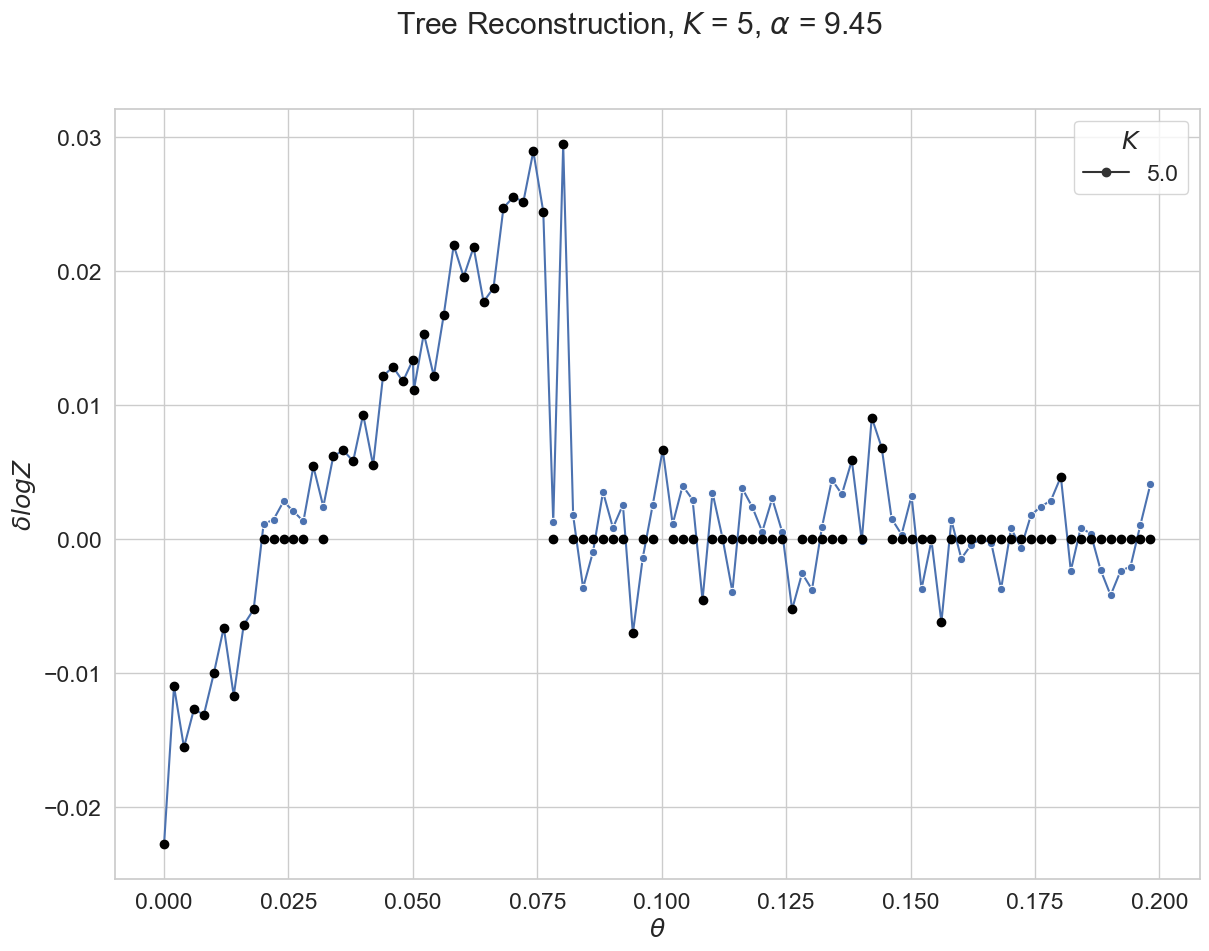

In [957]:
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.5)
fig,ax = plt.subplots(1,1, figsize=(14,10))
plt.suptitle(f"Tree Reconstruction, {K_s} = 5, {alpha_s} = 9.45" )
sns.lineplot(data=df[df[alpha_s]==a], x=theta_S, y=delta_logZ_s, style=K_s, legend="full", ax=ax, markers=True)
ax.plot(T_tab,y,"o",color="black")
#ax.set_xscale("log")
#fig.savefig(save_dir + f"OV_BP_K5_EBP0_alpha9.7.pdf")

In [958]:
a_tabb = np.sort(df[alpha_s].unique())

#### Fit

In [959]:
it_fit = np.polyfit(a_tabb[x_lim:],IT_tab[x_lim:],2)
sp2_fit = np.polyfit(a_tabb[x_lim+1:],sp2_tab[x_lim+1:],2)
sp1_fit = np.polyfit(a_tabb[x_lim-1:x2_lim],sp1_tab[x_lim-1:x2_lim],2)

In [960]:
it_fit

array([ 0.0071864 , -0.22578145,  1.56228215])

(0.0, 0.21)

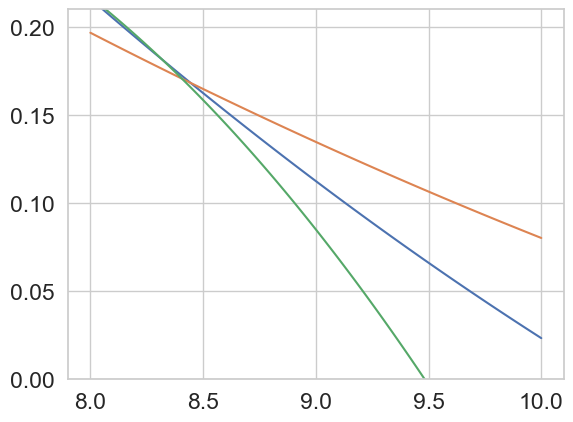

In [961]:
plt.plot(a_tabb,np.polyval(it_fit,a_tabb),"-")
plt.plot(a_tabb,np.polyval(sp2_fit,a_tabb),"-")
plt.plot(a_tabb,np.polyval(sp1_fit,a_tabb),"-")
plt.ylim([0,0.21])

In [962]:
it_fit_deci = it_fit
sp2_fit_deci = sp2_fit
sp1_fit_deci = sp1_fit

In [237]:
y_s = delta_ov_s

In [238]:
#DATA MANIPULATION
T_list = np.sort(df[theta_S].unique())
a_list = np.sort(df[alpha_s].unique())

let_T = len(T_list)
len_a= len(a_list)

y_tab = np.zeros((let_T,len_a))
a_tab = np.zeros((let_T,len_a))
T_tab = np.zeros((let_T,len_a))

for i_T,T in enumerate(T_list):
    for i_a,a in enumerate(a_list):
        y_tab[i_T][i_a] = max(df[(df[theta_S]==T) & (df[alpha_s]==a)][y_s].values[0],0)
        T_tab[i_T][i_a] = T
        a_tab[i_T][i_a] = a
df_flat = pd.DataFrame({theta_S:T_tab.flatten(),alpha_s:a_tab.flatten(),y_s:y_tab.flatten()})

/var/folders/w6/zx_nxxqs3gdcq636sf5z6z2m0000gn/T/ipykernel_32386/43324110.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = sns.heatmap(df_flat.pivot(theta_S,alpha_s,y_s),vmin=0.,vmax=1.)


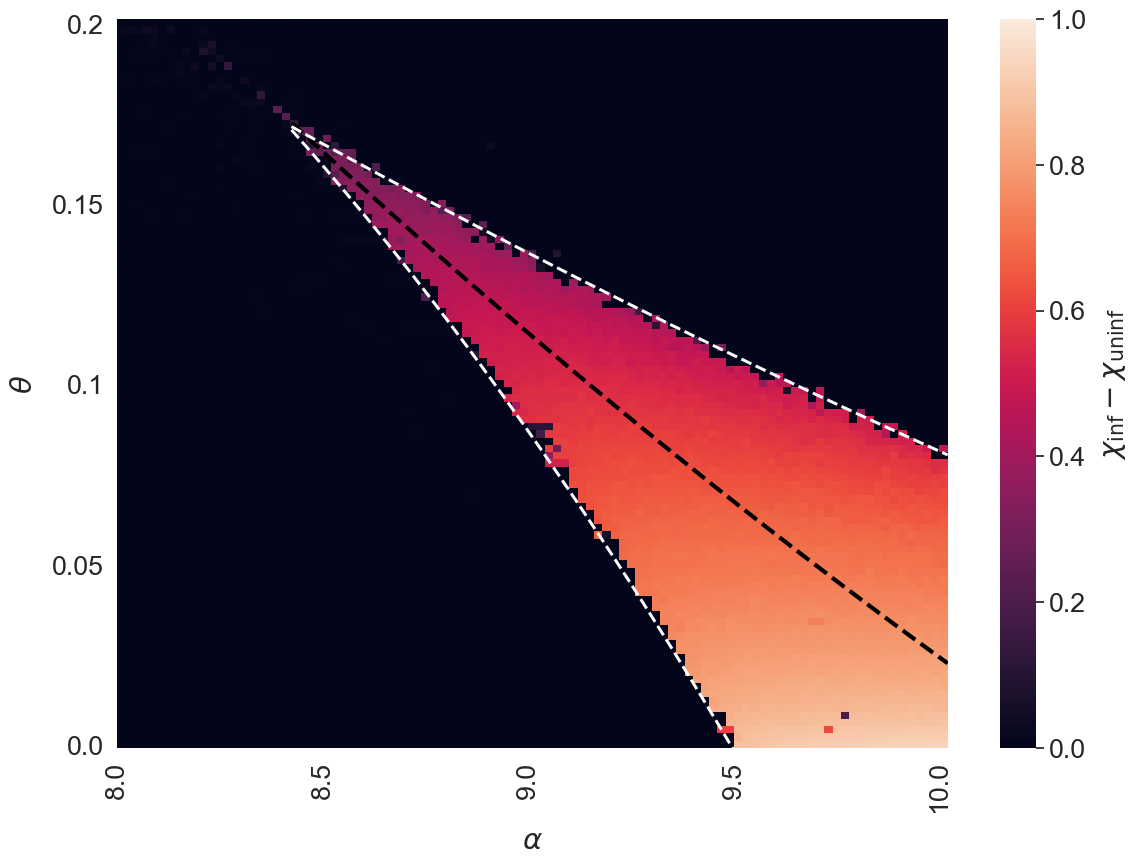

In [239]:
sns.set_theme(font_scale=1.75)
fig,ax = plt.subplots(figsize=(12,9))
#plt.suptitle(y_s + f", {graph}, $N={N}$, $d={d}$, " + l_s + f"={l_list[j]}, init={init}")
ax = sns.heatmap(df_flat.pivot(theta_S,alpha_s,y_s),vmin=0.,vmax=1.)
ax.set_xticks([0,25,50,75,100])
ax.set_xticklabels([df_flat[alpha_s].unique()[0],df_flat[alpha_s].unique()[25].round(2),df_flat[alpha_s].unique()[50].round(2),df_flat[alpha_s].unique()[75].round(2),df_flat[alpha_s].unique()[100].round(2)])
ax.set_yticks([0,25,50,75,100])
ax.set_yticklabels([df_flat[theta_S].unique()[0],df_flat[theta_S].unique()[25].round(2),df_flat[theta_S].unique()[50].round(2),df_flat[theta_S].unique()[75].round(2),df_flat[theta_S].unique()[100].round(2)])
ax.invert_yaxis()
ax.plot((a_tabb[21:]-8)*50.5,np.polyval(it_fit,a_tabb)[21:]*507.5,"--",color="black",lw=3.)
ax.plot((a_tabb[21:]-8)*50.5,np.polyval(sp1_fit,a_tabb)[21:]*507.5,"--",color="white",lw=2.15)
ax.plot((a_tabb[21:]-8)*50.5,np.polyval(sp2_fit,a_tabb)[21:]*507.5,"--",color="white",lw=2.15)
plt.tight_layout()
ax.set_xlabel(alpha_s,labelpad=10)
ax.set_ylabel(theta_S,labelpad=10)
cbar = ax.collections[0].colorbar
cbar.set_label(y_label_s, labelpad=10)

#ax.set_ylim([0,40])
#fig.savefig(f"../Figures/PhD_DECI_NAESAT.png",dpi=600)
#fig.savefig(f"../Figures/PhD_DECI_NAESAT.pdf")

# Summary plot

### 0a - Gaussian Spike Tensor, Diffusion

In [1018]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_SparseT/PDlogZ_Sph/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0      0.0000     0           146.0          57.0          0.000000   
1      0.0002     1            20.0          57.0          0.000200   
2      0.0004     2            20.0          57.0          0.000401   
3      0.0006     3            20.0          57.0          0.000603   
4      0.0008     4            20.0          57.0          0.000805   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.856090         0.856090          0.918939        1.226482   
1        0.856096         0.855895          0.918939        1.226568   
2        0.856102         0.855700          0.918939        1.226653   
3        0.856107         0.855505          0.918939        1.226739   
4        0.856113         0.855309          0.918939        1.226825   

   $\Delta/\rho^2$  gmin  gmax   mu   Ng  
0           0.1232   0.0   0.4  0.0  801  
1           0.1232   0.0   0.4  0.0  801  
2           0.1232   0.0   0.4  0.0  801  
3           0.1232   0.0   0.4  0.0  801  
4           0.1232   0.0   0.4  0.0  801

In [1019]:
data_frame_tot[r"$\delta logZ$"] = data_frame_tot[logZi_s] - data_frame_tot[logZu_s]

#### Free energy

In [1020]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())

In [1021]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.29][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.296][logZu_s]

In [1022]:
gmm=0.0
logzi_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZi_s]
logzu_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZu_s]
diff_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZi_s] - data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][logZu_s]
delta_tab = data_frame_tot[(data_frame_tot[g2_s]-gmm)<1e-7][D_s]
d_sort = [x for _,x in sorted(zip(delta_tab,diff_tab))]
logzi_sort = [x for _,x in sorted(zip(delta_tab,logzi_tab))]
logzu_sort = [x for _,x in sorted(zip(delta_tab,logzu_tab))]
doverrho2_tab = np.sort(delta_tab)

In [1023]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


In [1024]:
len(D_tab)

800

In [1025]:
np.array([0.125])

array([0.125])

In [1026]:
IT_tab[570:]

array([0.0004, 0.0004, 0.0008, 0.0018, 0.003 , 0.004 , 0.005 , 0.006 ,
       0.007 , 0.008 , 0.009 , 0.01  , 0.0112, 0.0122, 0.0132, 0.0142,
       0.015 , 0.016 , 0.017 , 0.018 , 0.019 , 0.02  , 0.021 , 0.022 ,
       0.0228, 0.0238, 0.0248, 0.0258, 0.0266, 0.0276, 0.0286, 0.0294,
       0.0304, 0.0312, 0.0322, 0.033 , 0.034 , 0.0348, 0.0358, 0.0366,
       0.0376, 0.0384, 0.0394, 0.0402, 0.041 , 0.042 , 0.0428, 0.0436,
       0.0446, 0.0454, 0.0462, 0.047 , 0.048 , 0.0488, 0.0496, 0.0504,
       0.0512, 0.052 , 0.0528, 0.0536, 0.0544, 0.0554, 0.0562, 0.057 ,
       0.0578, 0.0586, 0.0592, 0.06  , 0.0608, 0.0616, 0.0624, 0.0632,
       0.064 , 0.0648, 0.0654, 0.0662, 0.067 , 0.0678, 0.0686, 0.0692,
       0.07  , 0.0708, 0.0714, 0.0722, 0.073 , 0.0736, 0.0744, 0.0752,
       0.0758, 0.0766, 0.0772, 0.078 , 0.0786, 0.0794, 0.08  , 0.0808,
       0.0814, 0.0822, 0.0828, 0.0836, 0.0842, 0.0848, 0.0856, 0.0862,
       0.0868, 0.0876, 0.0882, 0.0888, 0.0896, 0.0902, 0.0908, 0.0914,
      

In [1027]:
x_lim=734
sp1_lim=624
IT_lim=570
sp1_GT_Diff = np.concatenate((sp1_tab[:x_lim], np.array([0.125])))
sp2_GT_Diff = np.concatenate((sp2_tab[:x_lim], np.array([0.125])))
IT_GT_Diff = np.concatenate((IT_tab[:x_lim], np.array([0.125])))
x_GT_Diff = np.concatenate((D_tab[:x_lim], np.array([8/27])))

In [1028]:
x_GT_Diff[571]

0.2288

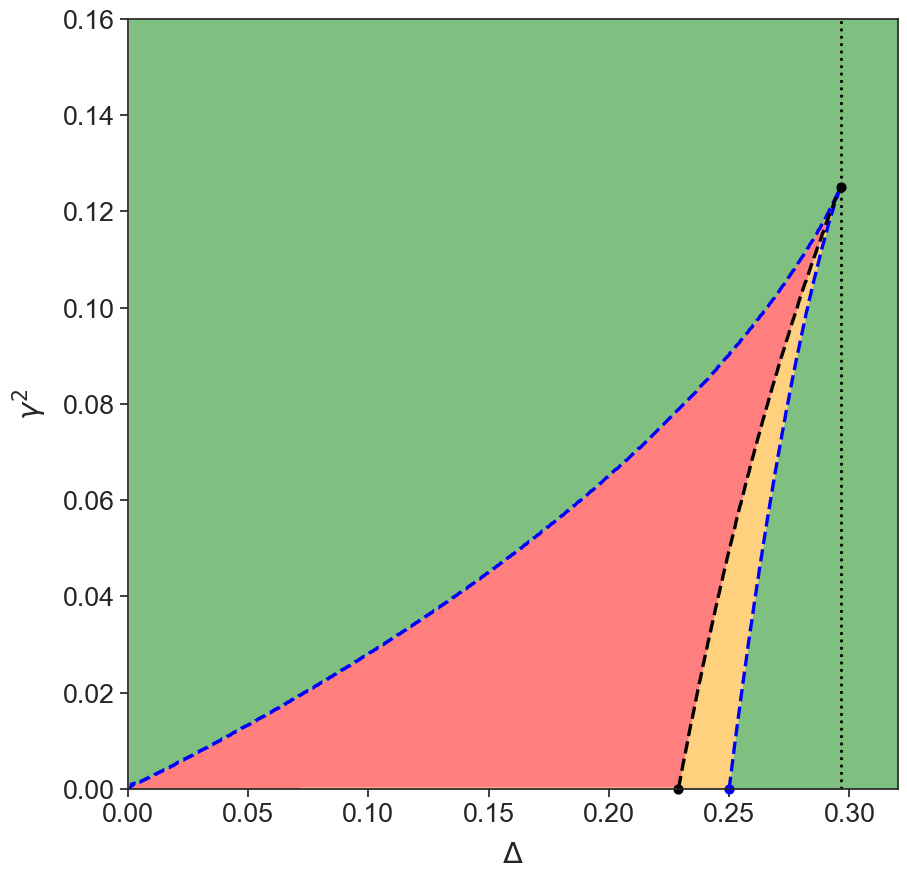

In [1029]:
sns.set_theme(font_scale=1.75, style="ticks")
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_facecolor("green")
plt.plot(x_GT_Diff[sp1_lim:],sp1_GT_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Diff,sp2_GT_Diff,"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Diff[IT_lim:],IT_GT_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_GT_Diff, sp1_GT_Diff, IT_GT_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Diff, sp2_GT_Diff, IT_GT_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Diff, sp2_GT_Diff, 0.16, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Diff, 0, sp1_GT_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(8/27,0.3201,1e-4), 0, 0.16, color='green', alpha=0.5, linewidth=0.)
plt.scatter(8/27,0.125,marker="o",color="black",s=40)
plt.scatter(0.25,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(0.2288,0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(8/27,0,0.16,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([0,0.32])
plt.ylim([0,0.16])
ax.set_box_aspect(1)
#fig.savefig(f"../Figures/PhD_SphT_C.pdf")

In [1030]:
x_GT_Diff = np.sqrt(3/2*x_GT_Diff)

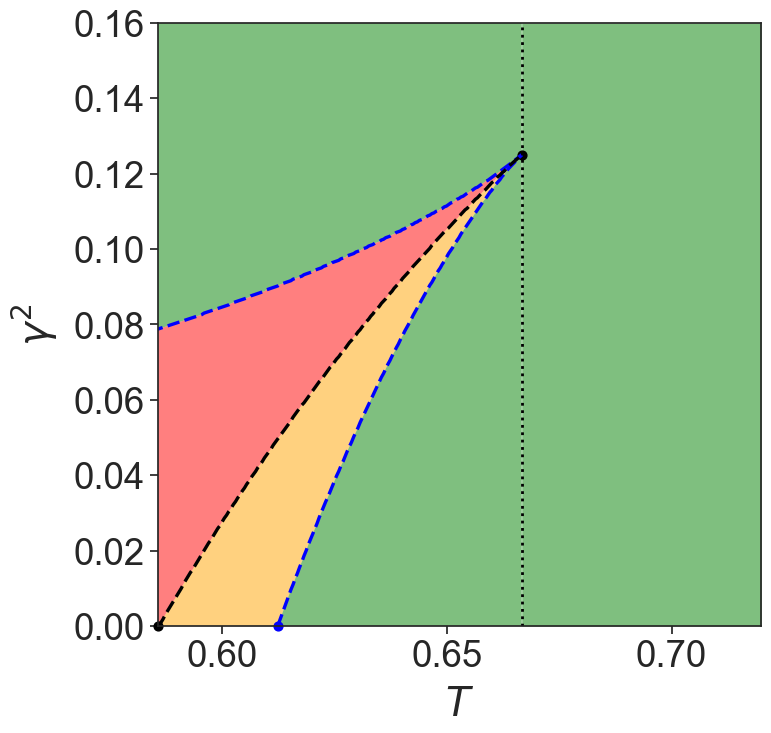

In [1042]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_GT_Diff[sp1_lim:],sp1_GT_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Diff,sp2_GT_Diff,"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Diff[IT_lim:],IT_GT_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_GT_Diff, sp1_GT_Diff, IT_GT_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Diff, sp2_GT_Diff, IT_GT_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Diff, sp2_GT_Diff, 0.16, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Diff, 0, sp1_GT_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(np.sqrt(3/2*8/27),0.72,1e-4), 0, 0.16, color='green', alpha=0.5, linewidth=0.)
plt.scatter(np.sqrt(3/2*8/27),0.125,marker="o",color="black",s=40)
plt.scatter(np.sqrt(3/2*0.25),0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(np.sqrt(3/2*0.2288),0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(np.sqrt(3/2*8/27),0,0.16,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(r"$T$",labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([np.sqrt(3/2*0.2288),0.72])
plt.ylim([0,0.16])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_SphT_T.pdf",bbox_inches='tight')

### 0b - Gaussian Spike Tensor, Decimation

In [1139]:
load_dir = "../Data/Data_SparseT/PD_Deci_Sph/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}$  $m_{inf}$  \
0    0.0000     0           146.0          16.0     0.000000   0.962926   
1    0.0003     1            20.0          16.0     0.000303   0.962938   
2    0.0006     2            20.0          16.0     0.000610   0.962950   
3    0.0009     3            21.0          16.0     0.000924   0.962962   
4    0.0012     4            21.0          16.0     0.001243   0.962974   

   $\delta m$  $\log Z_{uninf}$  $\log Z_{inf}$  $\delta logZ$  \
0    0.962926          0.918939        3.921285       3.002346   
1    0.962636          0.918087        3.920928       3.002840   
2    0.962340          0.917236        3.920571       3.003335   
3    0.962039          0.916384        3.920213       3.003829   
4    0.961731          0.915533        3.919856       3.004323   

   $\Delta/\rho^2$  Tmin  Tmax   NT  
0           0.0357   0.0  0.15  501  
1           0.0357   0.0  0.15  501  
2           0.0357   0.0  0.15  501  
3           0.0357   0.0  0.15  501  
4           0.0357   0.0  0.15  501

#### Free energy

In [1140]:
T_s = r"$\theta$"

In [1141]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [1142]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


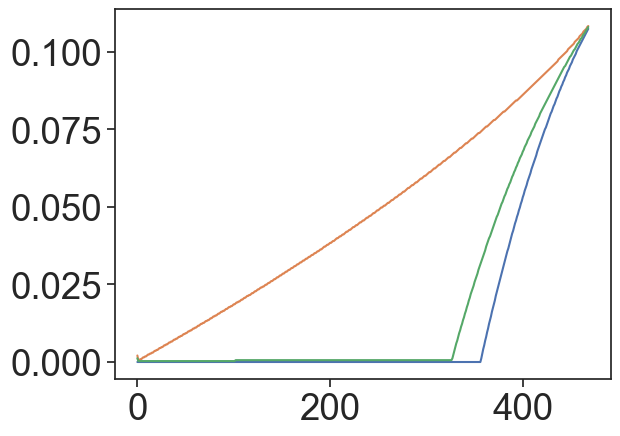

In [1143]:
x_lim=469
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

In [1144]:
sp1_tab[356:]

array([0.    , 0.0012, 0.0027, 0.0042, 0.0054, 0.0069, 0.0081, 0.0096,
       0.0108, 0.0123, 0.0135, 0.0147, 0.0162, 0.0174, 0.0186, 0.0198,
       0.0213, 0.0225, 0.0237, 0.0249, 0.0261, 0.0273, 0.0285, 0.0297,
       0.0309, 0.0321, 0.0333, 0.0345, 0.0357, 0.0366, 0.0378, 0.039 ,
       0.0402, 0.0414, 0.0423, 0.0435, 0.0447, 0.0456, 0.0468, 0.0477,
       0.0489, 0.0498, 0.051 , 0.0519, 0.0531, 0.054 , 0.0552, 0.0561,
       0.057 , 0.0582, 0.0591, 0.06  , 0.0609, 0.0621, 0.063 , 0.0639,
       0.0648, 0.0657, 0.0666, 0.0678, 0.0687, 0.0696, 0.0705, 0.0714,
       0.0723, 0.0732, 0.0741, 0.075 , 0.0756, 0.0765, 0.0774, 0.0783,
       0.0792, 0.0801, 0.0807, 0.0816, 0.0825, 0.0831, 0.084 , 0.0849,
       0.0855, 0.0864, 0.0873, 0.0879, 0.0888, 0.0894, 0.0903, 0.0909,
       0.0918, 0.0924, 0.0933, 0.0939, 0.0945, 0.0954, 0.096 , 0.0966,
       0.0975, 0.0981, 0.0987, 0.0993, 0.1002, 0.1008, 0.1014, 0.102 ,
       0.1026, 0.1032, 0.1038, 0.1044, 0.105 , 0.1056, 0.1062, 0.1068,
      

In [1145]:
x_lim=469
sp1_lim=356
IT_lim=325
sp1_GT_Deci = np.concatenate((sp1_tab[:x_lim], np.array([1/9])))
sp2_GT_Deci = np.concatenate((sp2_tab[:x_lim], np.array([1/9])))
IT_GT_Deci = np.concatenate((IT_tab[:x_lim], np.array([1/9])))
x_GT_Deci = np.concatenate((D_tab[:x_lim], np.array([1/3])))

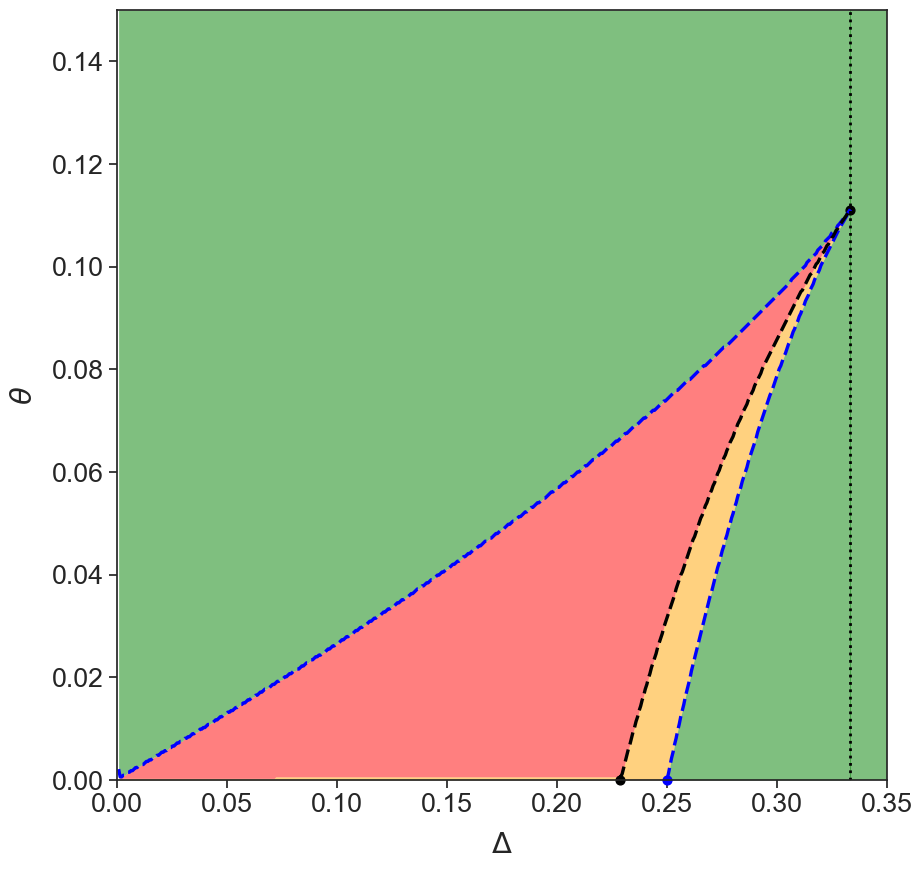

In [1146]:
sns.set_theme(font_scale=1.75, style="ticks")
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_facecolor("green")
plt.plot(x_GT_Deci[sp1_lim:],sp1_GT_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Deci,sp2_GT_Deci,"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Deci[IT_lim:],IT_GT_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_GT_Deci, sp1_GT_Deci, IT_GT_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Deci, sp2_GT_Deci, IT_GT_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Deci, sp2_GT_Deci, 0.15, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Deci, 0, sp1_GT_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(1/3,0.3501,1e-4), 0, 0.15, color='green', alpha=0.5, linewidth=0.)
plt.scatter(1/3,1/9,marker="o",color="black",s=40)
plt.scatter(0.25,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(0.2288,0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(1/3,0,0.15,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([0,0.35])
plt.ylim([0,0.15])
ax.set_box_aspect(1)
#fig.savefig(f"../Figures/PhD_Deci_SphT_C.pdf")

In [1147]:
x_GT_Deci = np.sqrt(3/2*x_GT_Deci)

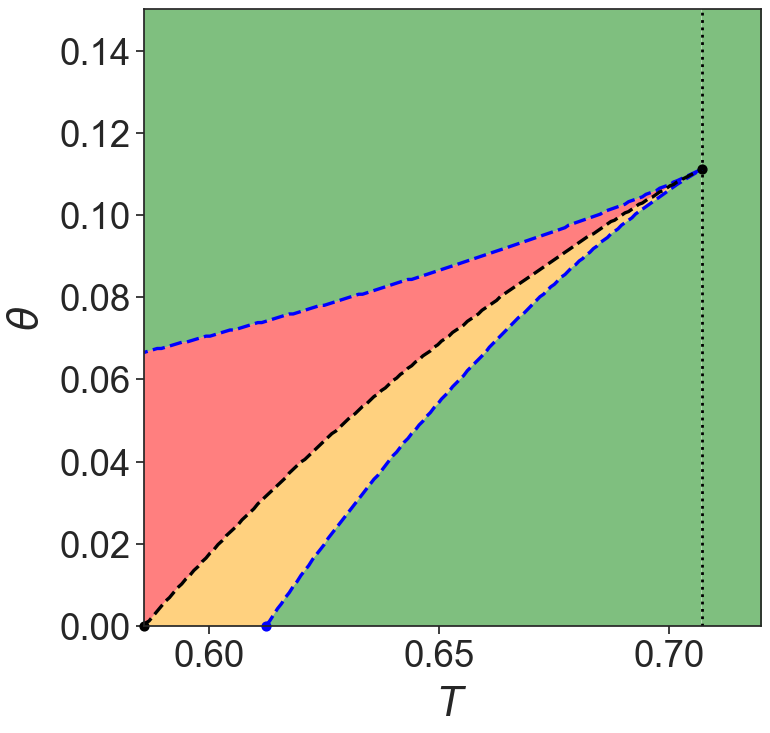

In [1148]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_GT_Deci[sp1_lim:],sp1_GT_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Deci,sp2_GT_Deci,"--",linewidth=2.4, color="blue")
plt.plot(x_GT_Deci[IT_lim:],IT_GT_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_GT_Deci, sp1_GT_Deci, IT_GT_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Deci, sp2_GT_Deci, IT_GT_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Deci, sp2_GT_Deci, 0.15, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_GT_Deci, 0, sp1_GT_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(np.sqrt(3/2*1/3),np.sqrt(3/2*0.3501),1e-4), 0, 0.15, color='green', alpha=0.5, linewidth=0.)
plt.scatter(np.sqrt(3/2*1/3),1/9,marker="o",color="black",s=40)
plt.scatter(np.sqrt(3/2*0.25),0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(np.sqrt(3/2*0.2288),0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(np.sqrt(3/2*1/3),0,0.15,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(r"$T$",labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([np.sqrt(3/2*0.2288),0.72])
plt.ylim([0,0.15])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_Deci_SphT_T.pdf",bbox_inches='tight')

### 1a - Sparse SK, Diffusion

In [192]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_Sparse/PDlogZ/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0     0.00000     0          2043.0         356.0          0.043605   
1     0.00008     1          1789.0         355.0          0.044199   
2     0.00016     2          1732.0         354.0          0.044791   
3     0.00024     3          1698.0         354.0          0.045383   
4     0.00032     4          1673.0         353.0          0.045976   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.319979         0.276374          0.000003        0.000099   
1        0.320115         0.275917          0.000003        0.000100   
2        0.320251         0.275460          0.000003        0.000102   
3        0.320386         0.275003          0.000003        0.000103   
4        0.320521         0.274546          0.000004        0.000104   

   $\Delta/\rho^2$    $\beta$  gmin  gmax     rho   Ng  
0            0.974  11.146965   0.0   0.2  0.0909  501  
1            0.974  11.146965   0.0   0.2  0.0909  501  
2            0.974  11.146965   0.0   0.2  0.0909  501  
3            0.974  11.146965   0.0   0.2  0.0909  501  
4            0.974  11.146965   0.0   0.2  0.0909  501

#### Free energy

In [193]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())

In [194]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.99][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.99][logZu_s]

In [195]:
lZi = diff_tab = data_frame_tot[data_frame_tot[D_s]==0.983][logZi_s]
lZu = diff_tab = data_frame_tot[data_frame_tot[D_s]==0.983][logZu_s]

In [196]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


In [197]:
tric_point = []

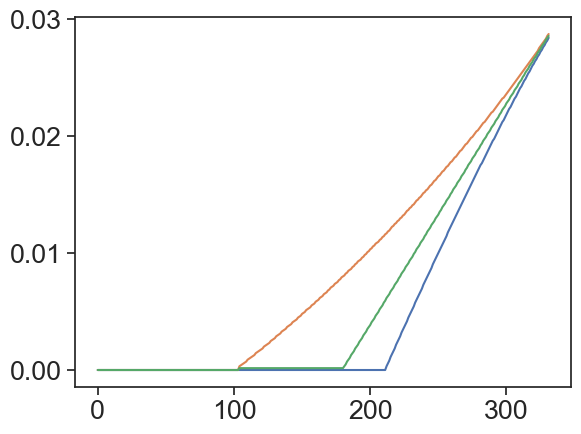

In [198]:
x_lim=332
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

In [223]:
x_lim=332
sp1_lim=212
sp2_lim=102
IT_lim=180
g2_lim=0.0284
D_lim=0.9930
Dd=0.9811
sp1_SK_Diff = np.concatenate((sp1_tab[:x_lim], np.array([g2_lim])))
sp2_SK_Diff = np.concatenate((sp2_tab[:x_lim], np.array([g2_lim])))
IT_SK_Diff = np.concatenate((IT_tab[:x_lim], np.array([g2_lim])))
x_SK_Diff = np.concatenate((D_tab[:x_lim], np.array([D_lim])))

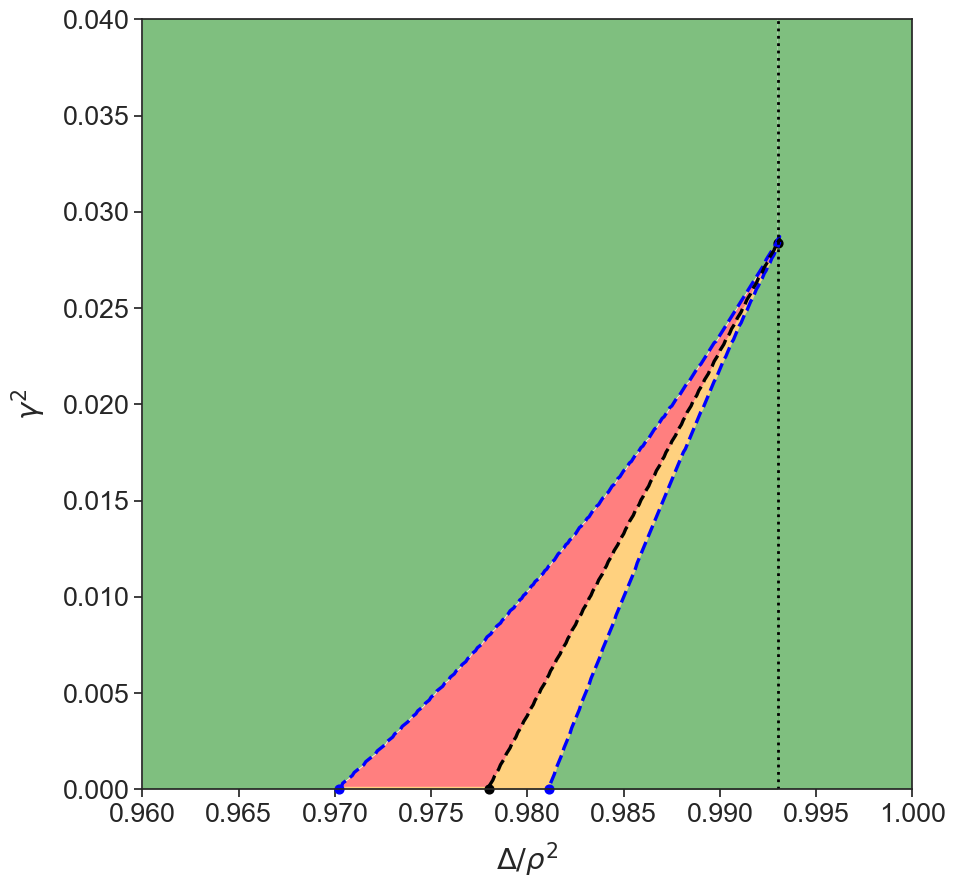

In [227]:
sns.set_theme(font_scale=1.75, style="ticks")
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_facecolor("green")
plt.plot(x_SK_Diff[sp1_lim:],sp1_SK_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Diff[sp2_lim:],sp2_SK_Diff[sp2_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Diff[IT_lim:],IT_SK_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_SK_Diff, sp1_SK_Diff, IT_SK_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Diff, sp2_SK_Diff, IT_SK_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Diff, sp2_SK_Diff, 0.15, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Diff, 0, sp1_SK_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(D_lim,1.0001,1e-4), 0, 0.04, color='green', alpha=0.5, linewidth=0.)
ax.vlines(D_lim,0,0.04,linestyle=":",color="black",linewidth=2.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(x_SK_Diff[IT_lim],0,marker="o",color="black",s=40, clip_on=False)
plt.scatter(x_SK_Diff[sp2_lim],0,marker="o",color="blue",s=40, clip_on=False)
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([0.96,1])
plt.ylim([0,0.04])
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_IsiM_C.pdf")

### 1b - Sparse SK, Decimation

In [289]:
load_dir = "../Data/Data_Sparse/PD_Deci/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0  0.000000     0          2789.0        2186.0          0.026126   
1  0.000008     1          2360.0        2130.0          0.026704   
2  0.000016     2          2243.0        2079.0          0.027268   
3  0.000024     3          2161.0        2031.0          0.027819   
4  0.000032     4          2095.0        1987.0          0.028358   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.252821         0.226695      9.471475e-07       -0.000051   
1        0.253403         0.226699     -1.383452e-06       -0.000052   
2        0.253969         0.226701     -3.711786e-06       -0.000054   
3        0.254518         0.226699     -6.037910e-06       -0.000055   
4        0.255052         0.226694     -8.361873e-06       -0.000057   

   $\Delta/\rho^2$    $\beta$  Tmin   Tmax     rho   NT  
0          0.98064  11.109162   0.0  0.004  0.0909  501  
1          0.98064  11.109162   0.0  0.004  0.0909  501  
2          0.98064  11.109162   0.0  0.004  0.0909  501  
3          0.98064  11.109162   0.0  0.004  0.0909  501  
4          0.98064  11.109162   0.0  0.004  0.0909  501

#### Free energy

In [290]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [291]:
data_frame_tot[diff_logZ_s] = data_frame_tot[logZi_s] - data_frame_tot[logZu_s]

In [292]:
D_tab[400:500]

array([0.992  , 0.99208, 0.99216, 0.99224, 0.99232, 0.9924 , 0.99248,
       0.99256, 0.99264, 0.99272, 0.9928 , 0.99288, 0.99296, 0.99304,
       0.99312, 0.9932 , 0.99328, 0.99336, 0.99344, 0.99352, 0.9936 ,
       0.99368, 0.99376, 0.99384, 0.99392, 0.994  , 0.99408, 0.99416,
       0.99424, 0.99432, 0.9944 , 0.99448, 0.99456, 0.99464, 0.99472,
       0.9948 , 0.99488, 0.99496, 0.99504, 0.99512, 0.9952 , 0.99528,
       0.99536, 0.99544, 0.99552, 0.9956 , 0.99568, 0.99576, 0.99584,
       0.99592, 0.996  , 0.99608, 0.99616, 0.99624, 0.99632, 0.9964 ,
       0.99648, 0.99656, 0.99664, 0.99672, 0.9968 , 0.99688, 0.99696,
       0.99704, 0.99712, 0.9972 , 0.99728, 0.99736, 0.99744, 0.99752,
       0.9976 , 0.99768, 0.99776, 0.99784, 0.99792, 0.998  , 0.99808,
       0.99816, 0.99824, 0.99832, 0.9984 , 0.99848, 0.99856, 0.99864,
       0.99872, 0.9988 , 0.99888, 0.99896, 0.99904, 0.99912, 0.9992 ,
       0.99928, 0.99936, 0.99944, 0.99952, 0.9996 , 0.99968, 0.99976,
       0.99984, 0.99

In [293]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.99032][diff_logZ_s]

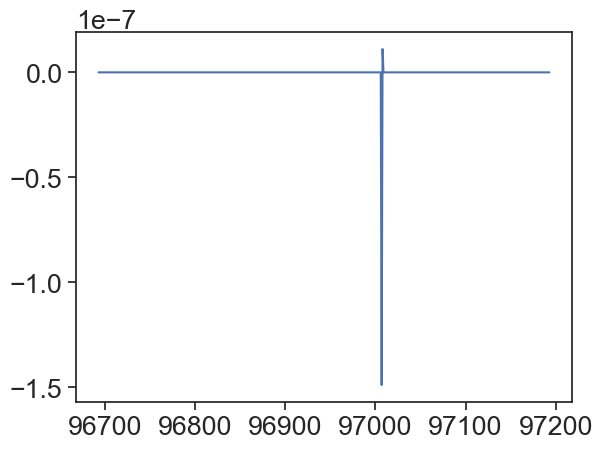

In [294]:
plt.plot(diff_tab)

In [295]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-7:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


In [296]:
IT_tab[339]

0.001864

In [297]:
D_tab[339]

0.98712

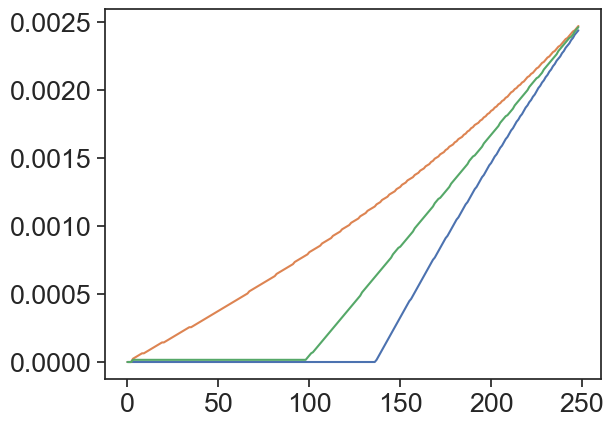

In [298]:
x_l=127
x_lim=376
plt.plot(sp1_tab[x_l:x_lim],"-")
plt.plot(sp2_tab[x_l:x_lim],"-")
plt.plot(IT_tab[x_l:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

In [299]:
#0.00252	0.99032

In [300]:
IT_tab[220:]

array([1.600e-05, 1.600e-05, 1.600e-05, 1.600e-05, 1.600e-05, 1.600e-05,
       3.200e-05, 4.800e-05, 6.400e-05, 7.200e-05, 8.800e-05, 1.040e-04,
       1.200e-04, 1.360e-04, 1.520e-04, 1.680e-04, 1.840e-04, 2.000e-04,
       2.160e-04, 2.320e-04, 2.480e-04, 2.640e-04, 2.800e-04, 2.960e-04,
       3.120e-04, 3.280e-04, 3.440e-04, 3.600e-04, 3.760e-04, 3.920e-04,
       4.080e-04, 4.240e-04, 4.400e-04, 4.560e-04, 4.720e-04, 4.880e-04,
       5.120e-04, 5.280e-04, 5.440e-04, 5.600e-04, 5.760e-04, 5.920e-04,
       6.080e-04, 6.240e-04, 6.400e-04, 6.560e-04, 6.720e-04, 6.880e-04,
       7.040e-04, 7.200e-04, 7.360e-04, 7.520e-04, 7.680e-04, 7.920e-04,
       8.080e-04, 8.240e-04, 8.400e-04, 8.480e-04, 8.640e-04, 8.800e-04,
       8.960e-04, 9.120e-04, 9.280e-04, 9.440e-04, 9.600e-04, 9.840e-04,
       1.000e-03, 1.016e-03, 1.032e-03, 1.048e-03, 1.064e-03, 1.080e-03,
       1.096e-03, 1.112e-03, 1.128e-03, 1.144e-03, 1.168e-03, 1.184e-03,
       1.200e-03, 1.208e-03, 1.224e-03, 1.240e-03, 

In [301]:
x_lim=373
xx_lim=127
sp1_lim=263
sp2_lim=127
IT_lim=225
g2_lim=0.00252
D_lim=0.99032
Dd=0.9811
sp1_SK_Deci = np.concatenate((np.zeros(xx_lim),sp1_tab[xx_lim:x_lim], np.array([g2_lim])))
sp2_SK_Deci = np.concatenate((np.zeros(xx_lim),sp2_tab[xx_lim:x_lim], np.array([g2_lim])))
IT_SK_Deci = np.concatenate((IT_tab[:x_lim], np.array([g2_lim])))
x_SK_Deci = np.concatenate((D_tab[:x_lim], np.array([D_lim])))

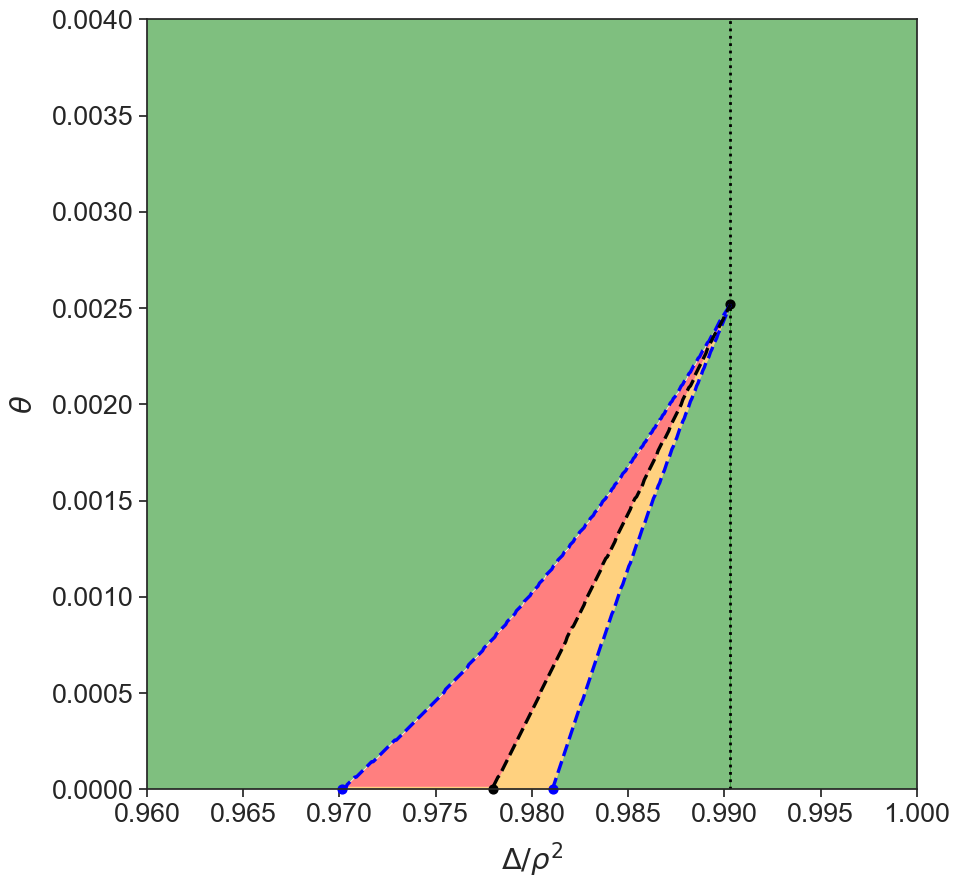

In [302]:
sns.set_theme(font_scale=1.75, style="ticks")
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_facecolor("green")
plt.plot(x_SK_Deci[sp1_lim:],sp1_SK_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Deci[sp2_lim:],sp2_SK_Deci[sp2_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Deci[IT_lim:],IT_SK_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_SK_Deci, sp1_SK_Deci, IT_SK_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Deci, sp2_SK_Deci, IT_SK_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Deci, sp2_SK_Deci, 0.15, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Deci, 0, sp1_SK_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(D_lim,1.0001,1e-4), 0, 0.04, color='green', alpha=0.5, linewidth=0.)
ax.vlines(D_lim,0,0.04,linestyle=":",color="black",linewidth=2.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(x_SK_Deci[IT_lim],0,marker="o",color="black",s=40, clip_on=False)
plt.scatter(x_SK_Deci[sp2_lim],0,marker="o",color="blue",s=40, clip_on=False)
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([0.96,1])
plt.ylim([0,0.004])
ax.set_box_aspect(1)
#fig.savefig(f"../Figures/PhD_Deci_SpM_C.pdf")

### 1c - rho=0.08

In [1149]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_Sparse/PD_08/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0     0.00000     0          4433.0        4712.0          0.000000   
1     0.00032     1           289.0         513.0          0.000362   
2     0.00064     2           288.0         491.0          0.000720   
3     0.00096     3           285.0         477.0          0.001075   
4     0.00128     4           283.0         466.0          0.001427   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.000000     0.000000e+00      0.000000e+00    0.000000e+00   
1        0.000362     1.930250e-08      2.306923e-09    2.306922e-09   
2        0.000720     3.742317e-08      9.223203e-09    9.223201e-09   
3        0.001075     5.653131e-08      2.070387e-08    2.070386e-08   
4        0.001427     7.523892e-08      3.670589e-08    3.670589e-08   

   $\delta logZ$  $\Delta/\rho^2$    $\beta$  gmin  gmax   rho   Ng  
0   0.000000e+00           1.0757  12.052147   0.0   0.4  0.08  501  
1  -6.948314e-16           1.0757  12.052147   0.0   0.4  0.08  501  
2  -1.281903e-15           1.0757  12.052147   0.0   0.4  0.08  501  
3  -2.005938e-15           1.0757  12.052147   0.0   0.4  0.08  501  
4  -2.729446e-15           1.0757  12.052147   0.0   0.4  0.08  501

#### Free energy

In [1150]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())

In [1151]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.99][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.99][logZu_s]

In [1152]:
lZi = diff_tab = data_frame_tot[data_frame_tot[D_s]==0.983][logZi_s]
lZu = diff_tab = data_frame_tot[data_frame_tot[D_s]==0.983][logZu_s]

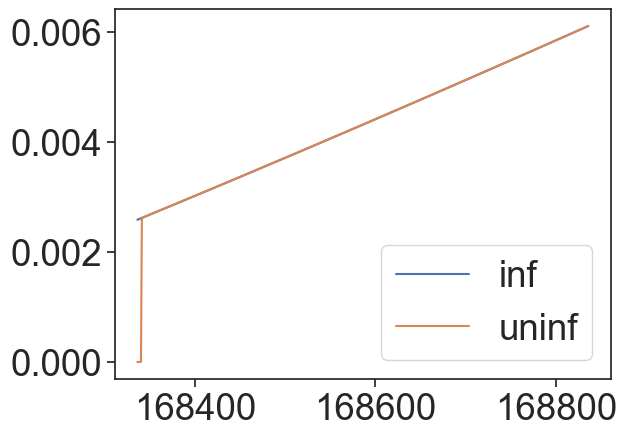

In [1153]:
plt.plot(lZi,label="inf")
plt.plot(lZu,label="uninf")
plt.legend()

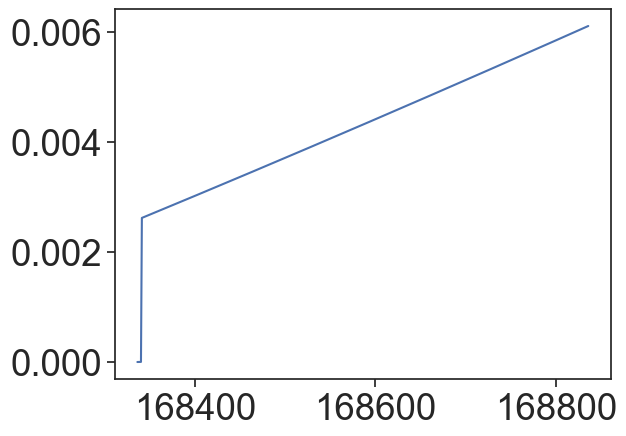

In [1154]:
plt.plot(diff_tab)

In [1155]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


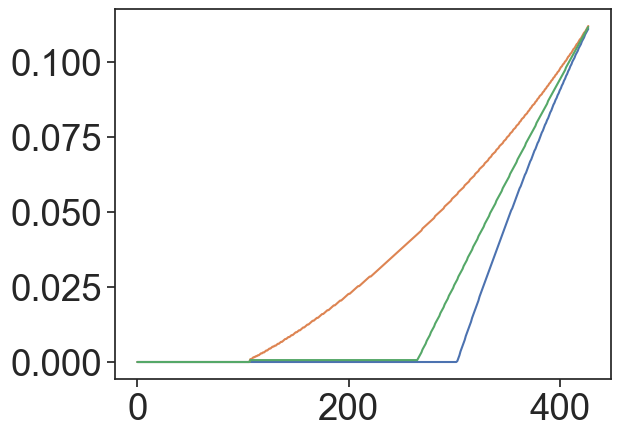

In [1156]:
x_lim=428
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([700,750])
#plt.ylim([0.10,0.13])

In [1157]:
1.040860137939453

1.040860137939453

In [1158]:
sp2_tab[100:]

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.00096, 0.00096, 0.00128, 0.0016 , 0.0016 , 0.00192, 0.00192,
       0.00224, 0.00224, 0.00256, 0.00288, 0.00288, 0.0032 , 0.0032 ,
       0.00352, 0.00384, 0.00384, 0.00416, 0.00448, 0.00448, 0.0048 ,
       0.00512, 0.00512, 0.00544, 0.00544, 0.00576, 0.00608, 0.00608,
       0.0064 , 0.00672, 0.00672, 0.00704, 0.00736, 0.00768, 0.00768,
       0.008  , 0.00832, 0.00832, 0.00864, 0.00896, 0.00896, 0.00928,
       0.0096 , 0.00992, 0.00992, 0.01024, 0.01056, 0.01056, 0.01088,
       0.0112 , 0.01152, 0.01152, 0.01184, 0.01216, 0.01248, 0.01248,
       0.0128 , 0.01312, 0.01344, 0.01376, 0.01376, 0.01408, 0.0144 ,
       0.01472, 0.01472, 0.01504, 0.01536, 0.01568, 0.016  , 0.016  ,
       0.01632, 0.01664, 0.01696, 0.01728, 0.01728, 0.0176 , 0.01792,
       0.01824, 0.01856, 0.01888, 0.01888, 0.0192 , 0.01952, 0.01984,
       0.02016, 0.02048, 0.02048, 0.0208 , 0.02112, 0.02144, 0.02176,
       0.02208, 0.02

In [1159]:
x_lim=428
sp1_lim=302
sp2_lim=106
IT_lim=265
g2_lim=0.11566446
D_lim=1.0801
Dd=1.040860137939453
sp1_SK_Diff = np.concatenate((sp1_tab[:x_lim], np.array([g2_lim])))
sp2_SK_Diff = np.concatenate((sp2_tab[:x_lim], np.array([g2_lim])))
IT_SK_Diff = np.concatenate((IT_tab[:x_lim], np.array([g2_lim])))
x_SK_Diff = np.concatenate((D_tab[:x_lim], np.array([D_lim])))

In [1160]:
x_SK_Diff[sp2_lim-3]

0.9809

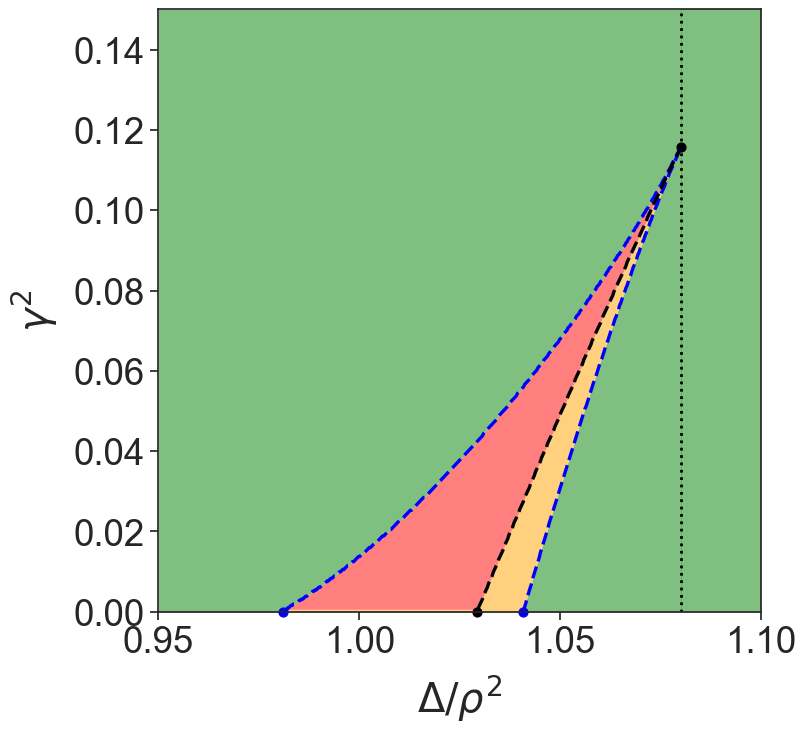

In [1161]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_SK_Diff[sp1_lim:],sp1_SK_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Diff[sp2_lim:],sp2_SK_Diff[sp2_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Diff[IT_lim:],IT_SK_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_SK_Diff, sp1_SK_Diff, IT_SK_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Diff, sp2_SK_Diff, IT_SK_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Diff, sp2_SK_Diff, 0.15, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Diff, 0, sp1_SK_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(D_lim,1.1001,1e-4), 0, 0.15, color='green', alpha=0.5, linewidth=0.)
ax.vlines(D_lim,0,0.15,linestyle=":",color="black",linewidth=2.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(1.0294197845458983,0,marker="o",color="black",s=40, clip_on=False)
plt.scatter(x_SK_Diff[sp2_lim-3],0,marker="o",color="blue",s=40, clip_on=False)
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([0.95,1.1])
plt.ylim([0,0.15])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_IsiM_rho08_C.pdf",bbox_inches='tight')

### 1d - rho=0.08

In [1162]:
load_dir = "../Data/Data_Sparse/PD_Deci_08/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0  0.000000     0         99999.0       99999.0      1.334518e-32   
1  0.000024     1           609.0         999.0      5.085542e-04   
2  0.000048     2           599.0         959.0      1.007173e-03   
3  0.000072     3           590.0         932.0      1.496606e-03   
4  0.000096     4           581.0         911.0      1.977516e-03   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0    1.569120e-32     2.346015e-33     -4.244375e-65   -5.867820e-65   
1    5.085546e-04     4.095629e-10     -6.687547e-06   -6.687547e-06   
2    1.007174e-03     7.976309e-10     -1.336934e-05   -1.336934e-05   
3    1.496607e-03     1.164131e-09     -2.004548e-05   -2.004548e-05   
4    1.977518e-03     1.522669e-09     -2.671608e-05   -2.671608e-05   

   $\delta logZ$  $\Delta/\rho^2$    $\beta$  Tmin   Tmax   rho   NT  
0  -1.623446e-65            1.049  12.204564   0.0  0.012  0.08  501  
1  -3.985883e-17            1.049  12.204564   0.0  0.012  0.08  501  
2   3.440140e-17            1.049  12.204564   0.0  0.012  0.08  501  
3  -4.747789e-17            1.049  12.204564   0.0  0.012  0.08  501  
4  -2.852807e-18            1.049  12.204564   0.0  0.012  0.08  501

#### Free energy

In [1163]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [1164]:
data_frame_tot[diff_logZ_s] = data_frame_tot[logZi_s] - data_frame_tot[logZu_s]

In [1165]:
D_tab[350:450]

array([1.055 , 1.0553, 1.0556, 1.0559, 1.0562, 1.0565, 1.0568, 1.0571,
       1.0574, 1.0577, 1.058 , 1.0583, 1.0586, 1.0589, 1.0592, 1.0595,
       1.0598, 1.0601, 1.0604, 1.0607, 1.061 , 1.0613, 1.0616, 1.0619,
       1.0622, 1.0625, 1.0628, 1.0631, 1.0634, 1.0637, 1.064 , 1.0643,
       1.0646, 1.0649, 1.0652, 1.0655, 1.0658, 1.0661, 1.0664, 1.0667,
       1.067 , 1.0673, 1.0676, 1.0679, 1.0682, 1.0685, 1.0688, 1.0691,
       1.0694, 1.0697, 1.07  , 1.0703, 1.0706, 1.0709, 1.0712, 1.0715,
       1.0718, 1.0721, 1.0724, 1.0727, 1.073 , 1.0733, 1.0736, 1.0739,
       1.0742, 1.0745, 1.0748, 1.0751, 1.0754, 1.0757, 1.076 , 1.0763,
       1.0766, 1.0769, 1.0772, 1.0775, 1.0778, 1.0781, 1.0784, 1.0787,
       1.079 , 1.0793, 1.0796, 1.0799, 1.0802, 1.0805, 1.0808, 1.0811,
       1.0814, 1.0817, 1.082 , 1.0823, 1.0826, 1.0829, 1.0832, 1.0835,
       1.0838, 1.0841, 1.0844, 1.0847])

In [1166]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==1.0679][diff_logZ_s]

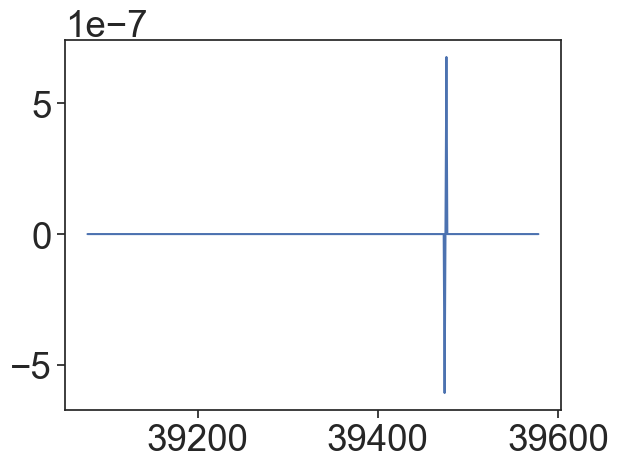

In [1167]:
plt.plot(diff_tab)

In [1168]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-7:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


In [1169]:
D_tab[339]

1.0517

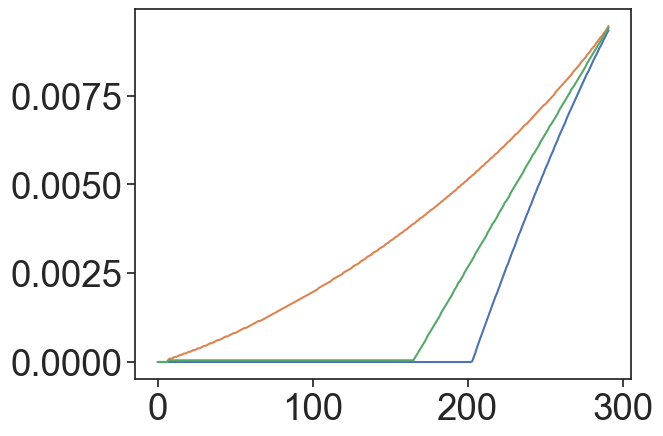

In [1170]:
x_l=100
x_lim=392
plt.plot(sp1_tab[x_l:x_lim],"-")
plt.plot(sp2_tab[x_l:x_lim],"-")
plt.plot(IT_tab[x_l:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

In [1171]:
IT_tab[260:]

array([4.800e-05, 4.800e-05, 4.800e-05, 4.800e-05, 4.800e-05, 4.800e-05,
       1.200e-04, 1.920e-04, 2.640e-04, 3.360e-04, 4.080e-04, 4.800e-04,
       5.520e-04, 6.240e-04, 7.200e-04, 7.920e-04, 8.640e-04, 9.360e-04,
       1.008e-03, 1.080e-03, 1.152e-03, 1.224e-03, 1.296e-03, 1.392e-03,
       1.464e-03, 1.536e-03, 1.608e-03, 1.680e-03, 1.752e-03, 1.824e-03,
       1.896e-03, 1.992e-03, 2.064e-03, 2.136e-03, 2.232e-03, 2.280e-03,
       2.352e-03, 2.424e-03, 2.520e-03, 2.592e-03, 2.664e-03, 2.736e-03,
       2.808e-03, 2.880e-03, 2.952e-03, 3.048e-03, 3.120e-03, 3.192e-03,
       3.264e-03, 3.336e-03, 3.408e-03, 3.480e-03, 3.552e-03, 3.648e-03,
       3.720e-03, 3.792e-03, 3.888e-03, 3.936e-03, 4.008e-03, 4.080e-03,
       4.176e-03, 4.248e-03, 4.320e-03, 4.392e-03, 4.488e-03, 4.536e-03,
       4.608e-03, 4.680e-03, 4.776e-03, 4.848e-03, 4.920e-03, 4.992e-03,
       5.064e-03, 5.136e-03, 5.208e-03, 5.280e-03, 5.352e-03, 5.448e-03,
       5.520e-03, 5.592e-03, 5.664e-03, 5.736e-03, 

In [1172]:
x_lim=392
xx_lim=105
sp1_lim=302
sp2_lim=106
IT_lim=265
g2_lim=0.01
D_lim=1.06943882
Dd=1.040860137939453
sp1_SK_Deci = np.concatenate((np.zeros(xx_lim),sp1_tab[xx_lim:x_lim], np.array([g2_lim])))
sp2_SK_Deci = np.concatenate((np.zeros(xx_lim),sp2_tab[xx_lim:x_lim], np.array([g2_lim])))
IT_SK_Deci = np.concatenate((IT_tab[:x_lim], np.array([g2_lim])))
x_SK_Deci = np.concatenate((D_tab[:x_lim], np.array([D_lim])))

In [1179]:
def set_axes_height(ax, h):
    fig = ax.figure
    aw, ah = np.diff(ax.transAxes.transform([(0, 0), (1, 1)]), axis=0)[0]
    fw, fh = fig.get_size_inches()
    dpi = fig.get_dpi()
    scale = h / (ah / dpi)
    fig.set_size_inches(fw*scale, fh*scale, forward=True)

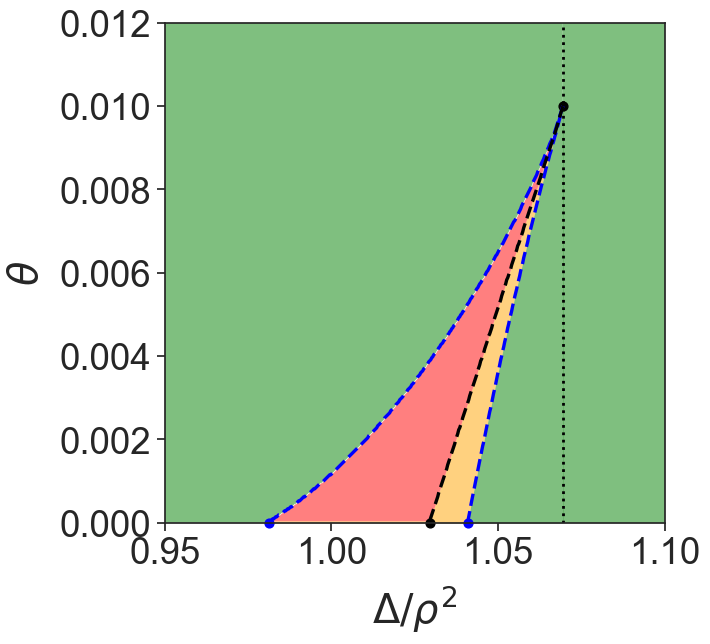

In [1183]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_SK_Deci[sp1_lim:],sp1_SK_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Deci[sp2_lim:],sp2_SK_Deci[sp2_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_SK_Deci[IT_lim:],IT_SK_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_SK_Deci, sp1_SK_Deci, IT_SK_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Deci, sp2_SK_Deci, IT_SK_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Deci, sp2_SK_Deci, 0.15, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_SK_Deci, 0, sp1_SK_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(D_lim,1.1001,1e-4), 0, 0.04, color='green', alpha=0.5, linewidth=0.)
ax.vlines(D_lim,0,0.04,linestyle=":",color="black",linewidth=2.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(x_SK_Deci[IT_lim],0,marker="o",color="black",s=40, clip_on=False)
plt.scatter(x_SK_Deci[sp2_lim-2],0,marker="o",color="blue",s=40, clip_on=False)
ax.set_xlabel(D_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([0.95,1.1])
#ax.set_xticks([0.95,0.99, 1.03, 1.07])
plt.ylim([0,0.012])
plt.tight_layout()
ax.set_box_aspect(1)
set_axes_height(ax, 5)
fig.savefig(f"../Figures/PhD_Deci_SpM_rho08_C.pdf",bbox_inches='tight')

### 2a - Ising Spike Tensor, Diffusion

In [1079]:
#load_dir = "./Data_2106/PlSE/"
load_dir = "../Data/Data_SparseT/PDlogZ/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\gamma^2$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0      0.0000     0           146.0          79.0          0.000000   
1      0.0005     1            20.0          79.0          0.000501   
2      0.0010     2            20.0          79.0          0.001002   
3      0.0015     3            20.0          79.0          0.001505   
4      0.0020     4            20.0          78.0          0.002010   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.783563         0.783563      0.000000e+00       -0.009413   
1        0.783821         0.783321      6.253240e-08       -0.009217   
2        0.784079         0.783076      2.503692e-07       -0.009021   
3        0.784335         0.782829      5.638167e-07       -0.008825   
4        0.784590         0.782580      1.003183e-06       -0.008629   

   $\Delta/\rho^2$   $\beta$  gmin  gmax  rho   Ng  
0            0.292  1.850583   0.0   0.5  1.0  501  
1            0.292  1.850583   0.0   0.5  1.0  501  
2            0.292  1.850583   0.0   0.5  1.0  501  
3            0.292  1.850583   0.0   0.5  1.0  501  
4            0.292  1.850583   0.0   0.5  1.0  501

#### Free energy

In [1080]:
D_tab = np.sort(data_frame_tot[D_s].unique())
g_tab = np.sort(data_frame_tot[g2_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"


In [1081]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.32][logZi_s] - data_frame_tot[data_frame_tot[D_s]==0.32][logZu_s]

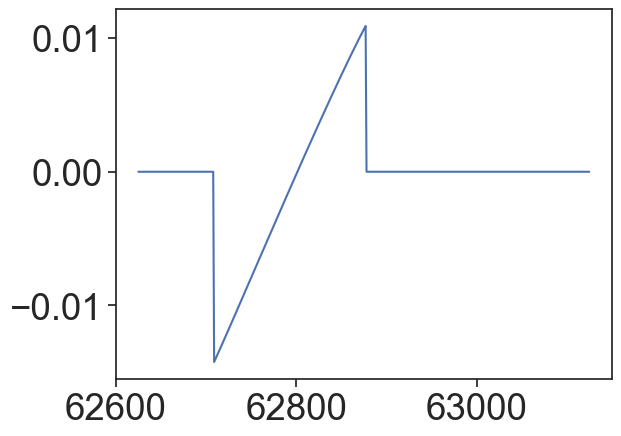

In [1082]:
plt.plot(diff_tab)

In [1083]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = g_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = g_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = g_tab[j]
                flag=3


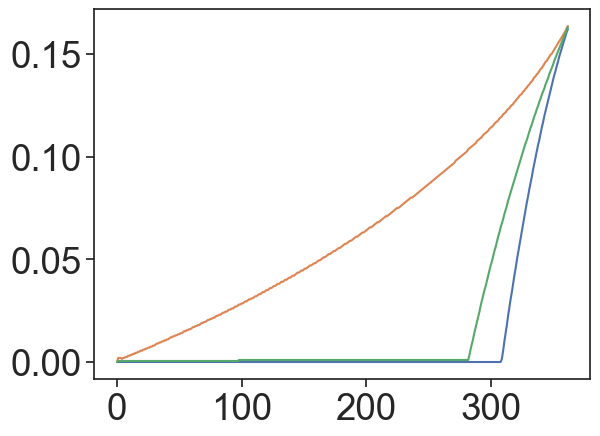

In [1084]:
x_lim=363
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

0.163	0.363

In [1085]:
sp1_tab[308:]

array([0.    , 0.0015, 0.0055, 0.01  , 0.014 , 0.018 , 0.0225, 0.0265,
       0.0305, 0.034 , 0.038 , 0.042 , 0.0455, 0.0495, 0.053 , 0.0565,
       0.06  , 0.0635, 0.067 , 0.0705, 0.074 , 0.0775, 0.0805, 0.084 ,
       0.087 , 0.09  , 0.0935, 0.0965, 0.0995, 0.1025, 0.1055, 0.108 ,
       0.111 , 0.114 , 0.1165, 0.1195, 0.122 , 0.1245, 0.127 , 0.1295,
       0.132 , 0.1345, 0.137 , 0.1395, 0.1415, 0.144 , 0.146 , 0.1485,
       0.1505, 0.1525, 0.1545, 0.1565, 0.1585, 0.1605, 0.162 , 0.164 ,
       0.1655, 0.167 , 0.1685, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ])

In [1086]:
D_tab[282]

0.283

In [1087]:
x_lim=363
sp1_lim=309
IT_lim=282
g2_lim=0.167
D_lim=0.3661
Dd=0.3097
sp1_IT_Diff = np.concatenate((sp1_tab[:x_lim], np.array([g2_lim])))
sp2_IT_Diff = np.concatenate((sp2_tab[:x_lim], np.array([g2_lim])))
IT_IT_Diff = np.concatenate((IT_tab[:x_lim], np.array([g2_lim])))
x_IT_Diff = np.concatenate((D_tab[:x_lim], np.array([D_lim])))

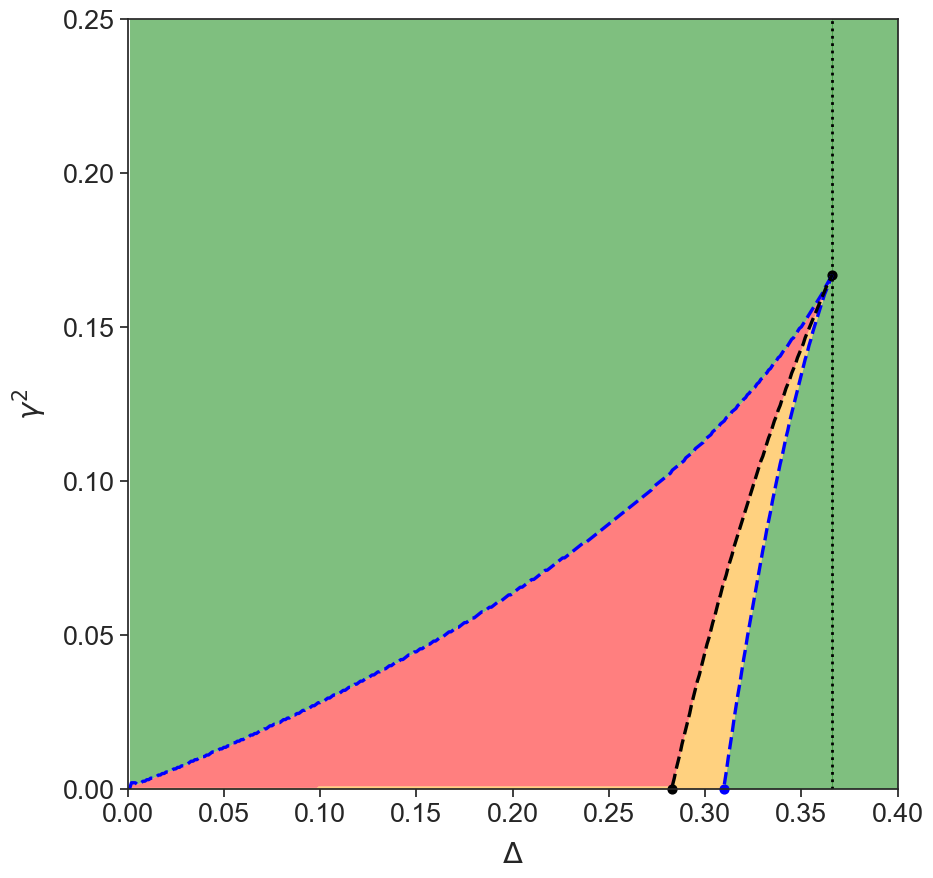

In [1088]:
sns.set_theme(font_scale=1.75, style="ticks")
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_facecolor("green")
plt.plot(x_IT_Diff[sp1_lim:],sp1_IT_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Diff,sp2_IT_Diff,"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Diff[IT_lim:],IT_IT_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_IT_Diff, sp1_IT_Diff, IT_IT_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Diff, sp2_IT_Diff, IT_IT_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Diff, sp2_IT_Diff, 0.25, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Diff, 0, sp1_IT_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(D_lim,0.4001,1e-4), 0, 0.25, color='green', alpha=0.5, linewidth=0.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(D_tab[282],0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(D_lim,0,0.25,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([0,0.4])
plt.ylim([0,0.25])
ax.set_box_aspect(1)
#fig.savefig(f"../Figures/PhD_IsiT_C.pdf")

In [1089]:
np.sqrt(3/2*D_tab[282])

0.6515366451704769

In [1090]:
x_IT_Diff = np.sqrt(3/2*x_IT_Diff)

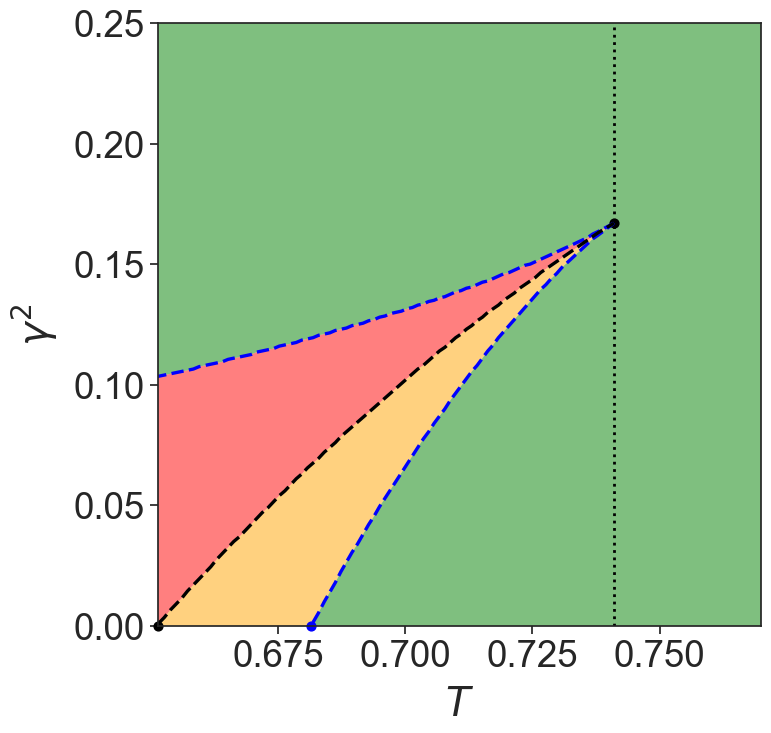

In [1091]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_IT_Diff[sp1_lim:],sp1_IT_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Diff,sp2_IT_Diff,"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Diff[IT_lim:],IT_IT_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_IT_Diff, sp1_IT_Diff, IT_IT_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Diff, sp2_IT_Diff, IT_IT_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Diff, sp2_IT_Diff, 0.25, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Diff, 0, sp1_IT_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(np.sqrt(3/2*D_lim),1.0001,1e-4), 0, 0.25, color='green', alpha=0.5, linewidth=0.)
plt.scatter(np.sqrt(3/2*D_lim),g2_lim,marker="o",color="black",s=40)
plt.scatter(np.sqrt(3/2*Dd),0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(np.sqrt(3/2*D_tab[282]),0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(np.sqrt(3/2*D_lim),0,0.25,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(r"$T$",labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([np.sqrt(3/2*D_tab[282]),0.77])
plt.ylim([0,0.25])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_IsiT_T.pdf",bbox_inches='tight')

### 2a - Ising Spike Tensor, Decimation

In [1184]:
load_dir = "../Data/Data_SparseT/PD_Deci_logZ/"
flag=0
for filename in os.listdir(load_dir):
            path = os.path.join(load_dir, filename)
            if not os.path.isdir(path):
                if (filename.startswith( "DF_" )):
                    with lzma.open(load_dir + filename, "rb") as f:
                        if (flag==1) : data_frame_tot = pd.concat([data_frame_tot,pickle.load(f)],ignore_index=True)
                        else : 
                            data_frame_tot = pickle.load(f)
                            flag=1
data_frame_tot.head()

$\theta$  step  # iter (uninf)  # iter (inf)  $m_{uninf}/\rho$  \
0    0.0000     0           146.0         248.0          0.000000   
1    0.0004     1            19.0         114.0          0.000401   
2    0.0008     2            20.0         114.0          0.000802   
3    0.0012     3            20.0         115.0          0.001205   
4    0.0016     4            20.0         116.0          0.001608   

   $m_{inf}/\rho$  $\delta m/\rho$  $\log Z_{uninf}$  $\log Z_{inf}$  \
0        0.000000     0.000000e+00      0.000000e+00    0.000000e+00   
1        0.000401     6.980114e-10      3.388694e-11    3.388701e-11   
2        0.000802     1.202498e-09      2.716884e-10    2.716884e-10   
3        0.001205     1.727205e-09      9.187896e-10    9.187896e-10   
4        0.001608     2.432146e-09      2.182156e-09    2.182156e-09   

   $\delta logZ$  $\Delta/\rho^2$   $\beta$  Tmin  Tmax  rho   NT  
0   0.000000e+00           0.3152  1.781176   0.0   0.2  1.0  501  
1   7.739688e-17           0.3152  1.781176   0.0   0.2  1.0  501  
2   4.673791e-17           0.3152  1.781176   0.0   0.2  1.0  501  
3   1.989256e-18           0.3152  1.781176   0.0   0.2  1.0  501  
4  -4.423131e-17           0.3152  1.781176   0.0   0.2  1.0  501

#### Free energy

In [1185]:
D_tab = np.sort(data_frame_tot[D_s].unique())
T_tab = np.sort(data_frame_tot[T_s].unique())
logZu_s = r"$\log Z_{uninf}$"
logZi_s = r"$\log Z_{inf}$"
diff_logZ_s = r"$\delta logZ$"

In [1186]:
D_tab[400:500]

array([0.3208, 0.3216, 0.3224, 0.3232, 0.324 , 0.3248, 0.3256, 0.3264,
       0.3272, 0.328 , 0.3288, 0.3296, 0.3304, 0.3312, 0.332 , 0.3328,
       0.3336, 0.3344, 0.3352, 0.336 , 0.3368, 0.3376, 0.3384, 0.3392,
       0.34  , 0.3408, 0.3416, 0.3424, 0.3432, 0.344 , 0.3448, 0.3456,
       0.3464, 0.3472, 0.348 , 0.3488, 0.3496, 0.3504, 0.3512, 0.352 ,
       0.3528, 0.3536, 0.3544, 0.3552, 0.356 , 0.3568, 0.3576, 0.3584,
       0.3592, 0.36  , 0.3608, 0.3616, 0.3624, 0.3632, 0.364 , 0.3648,
       0.3656, 0.3664, 0.3672, 0.368 , 0.3688, 0.3696, 0.3704, 0.3712,
       0.372 , 0.3728, 0.3736, 0.3744, 0.3752, 0.376 , 0.3768, 0.3776,
       0.3784, 0.3792, 0.38  , 0.3808, 0.3816, 0.3824, 0.3832, 0.384 ,
       0.3848, 0.3856, 0.3864, 0.3872, 0.388 , 0.3888, 0.3896, 0.3904,
       0.3912, 0.392 , 0.3928, 0.3936, 0.3944, 0.3952, 0.396 , 0.3968,
       0.3976, 0.3984, 0.3992, 0.4   ])

In [1187]:
diff_tab = data_frame_tot[data_frame_tot[D_s]==0.380][diff_logZ_s]

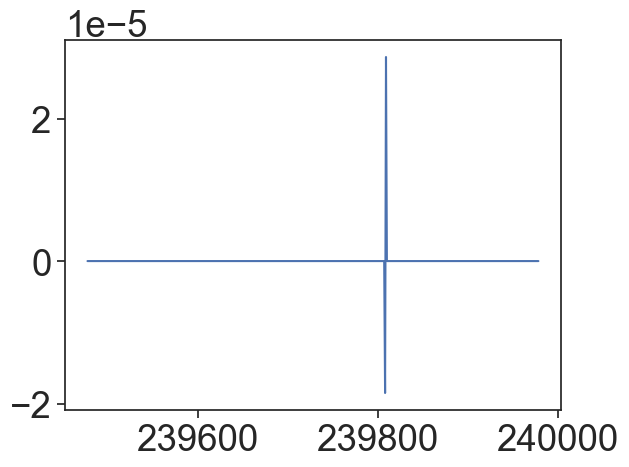

In [1188]:
plt.plot(diff_tab)

In [1189]:
sp1_tab = np.zeros(len(D_tab))
sp2_tab = np.zeros(len(D_tab))
IT_tab = np.zeros(len(D_tab))
for i,D in enumerate(D_tab):
    diff_tab = data_frame_tot[data_frame_tot[D_s]==D][logZi_s] - data_frame_tot[data_frame_tot[D_s]==D][logZu_s]
    flag=0
    for j,d in enumerate(diff_tab):
        if abs(d)>1e-10:
            if flag==0:
                flag=1
                sp1_tab[i] = T_tab[j]
                diff_f = 1
            elif flag==1 :
                if (abs(d)<abs(diff_f) ):
                    diff_f = d
                else: #if (diff_f*d<0):
                    IT_tab[i] = T_tab[j]
                    flag=2
        else:
            if flag==2:
                sp2_tab[i] = T_tab[j]
                flag=3


In [1190]:
IT_tab[339]

0.0008

In [1191]:
D_tab[339]

0.272

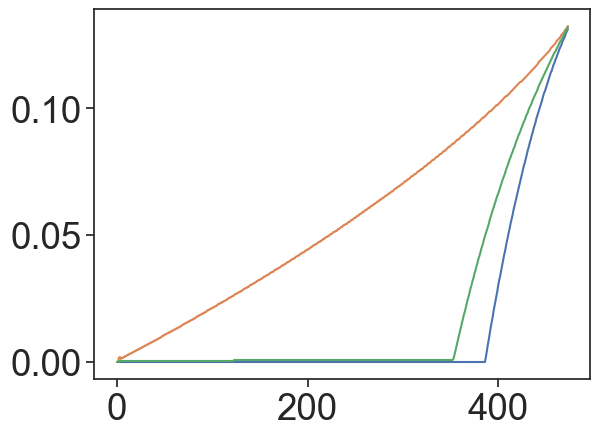

In [1192]:
x_lim=474
plt.plot(sp1_tab[:x_lim],"-")
plt.plot(sp2_tab[:x_lim],"-")
plt.plot(IT_tab[:x_lim],"-")
#plt.xlim([340,370])
#plt.ylim([0.13,0.18])

In [1193]:
#0.1328	0.3808

In [1194]:
IT_tab[350:]

array([0.0008, 0.0008, 0.0008, 0.0012, 0.0028, 0.0044, 0.006 , 0.0076,
       0.0092, 0.0108, 0.0124, 0.014 , 0.0156, 0.0172, 0.0188, 0.02  ,
       0.0216, 0.0232, 0.0248, 0.026 , 0.0276, 0.0292, 0.0304, 0.032 ,
       0.0332, 0.0348, 0.036 , 0.0376, 0.0388, 0.0404, 0.0416, 0.0428,
       0.0444, 0.0456, 0.0468, 0.0484, 0.0496, 0.0508, 0.052 , 0.0532,
       0.0544, 0.056 , 0.0572, 0.0584, 0.0596, 0.0608, 0.062 , 0.0632,
       0.0644, 0.0656, 0.0664, 0.0676, 0.0688, 0.07  , 0.0712, 0.0724,
       0.0732, 0.0744, 0.0756, 0.0768, 0.0776, 0.0788, 0.08  , 0.0808,
       0.082 , 0.0828, 0.084 , 0.0848, 0.086 , 0.0872, 0.088 , 0.0892,
       0.09  , 0.0908, 0.092 , 0.0928, 0.094 , 0.0948, 0.0956, 0.0968,
       0.0976, 0.0984, 0.0996, 0.1004, 0.1012, 0.102 , 0.1032, 0.104 ,
       0.1048, 0.1056, 0.1064, 0.1072, 0.1084, 0.1092, 0.11  , 0.1108,
       0.1116, 0.1124, 0.1132, 0.114 , 0.1148, 0.1156, 0.1164, 0.1172,
       0.118 , 0.1188, 0.1196, 0.1204, 0.1212, 0.122 , 0.1224, 0.1232,
      

In [1195]:
D_tab[352]

0.2824

In [1196]:
x_lim=474
sp1_lim=387
IT_lim=352
g2_lim=0.1355
D_lim=0.3838
Dd=0.3097
sp1_IT_Deci = np.concatenate((sp1_tab[:x_lim], np.array([g2_lim])))
sp2_IT_Deci = np.concatenate((sp2_tab[:x_lim], np.array([g2_lim])))
IT_IT_Deci = np.concatenate((IT_tab[:x_lim], np.array([g2_lim])))
x_IT_Deci = np.concatenate((D_tab[:x_lim], np.array([D_lim])))

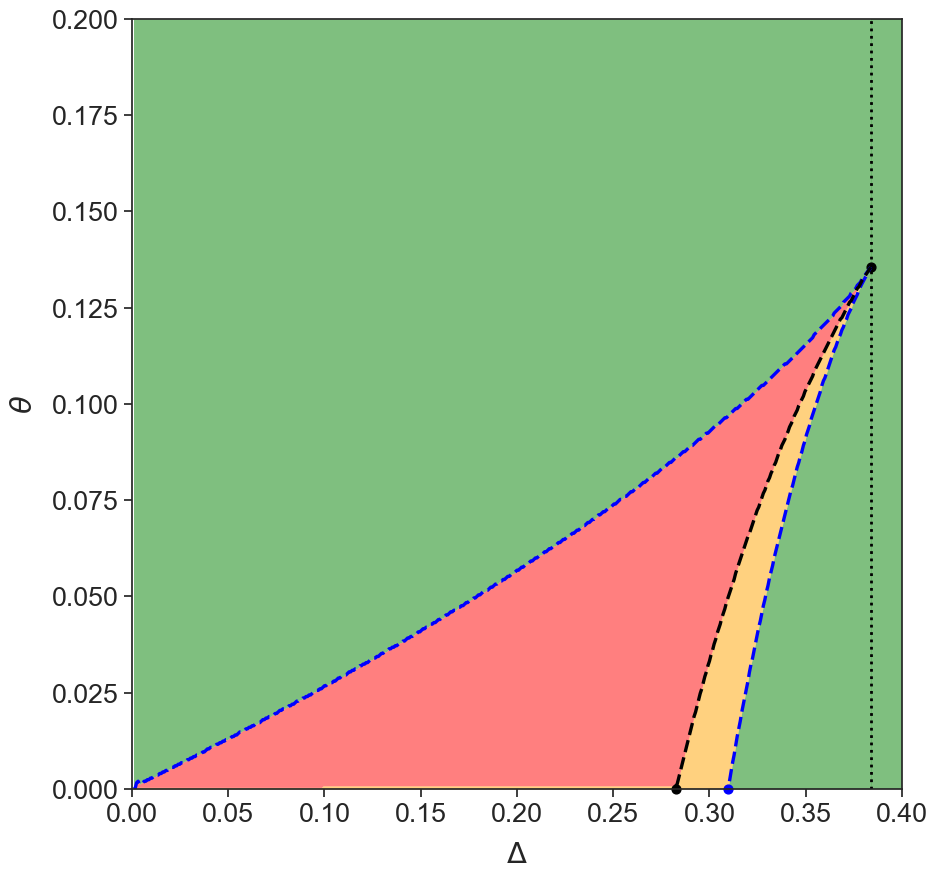

In [1135]:
sns.set_theme(font_scale=1.75, style="ticks")
fig,ax = plt.subplots(figsize=(10,10))
#ax.set_facecolor("green")
plt.plot(x_IT_Deci[sp1_lim:],sp1_IT_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Deci,sp2_IT_Deci,"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Deci[IT_lim:],IT_IT_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_IT_Deci, sp1_IT_Deci, IT_IT_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Deci, sp2_IT_Deci, IT_IT_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Deci, sp2_IT_Deci, 0.2, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Deci, 0, sp1_IT_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(D_lim,0.4001,1e-4), 0, 0.2, color='green', alpha=0.5, linewidth=0.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(D_tab[352],0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(D_lim,0,0.2,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(Delta_s,labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([0,0.4])
plt.ylim([0,0.2])
ax.set_box_aspect(1)
#fig.savefig(f"../Figures/PhD_Deci_IsiT_C.pdf")

In [1136]:
x_IT_Deci = np.sqrt(3/2*x_IT_Deci)

In [1137]:
np.sqrt(3/2*0.3838)

0.7587489703452651

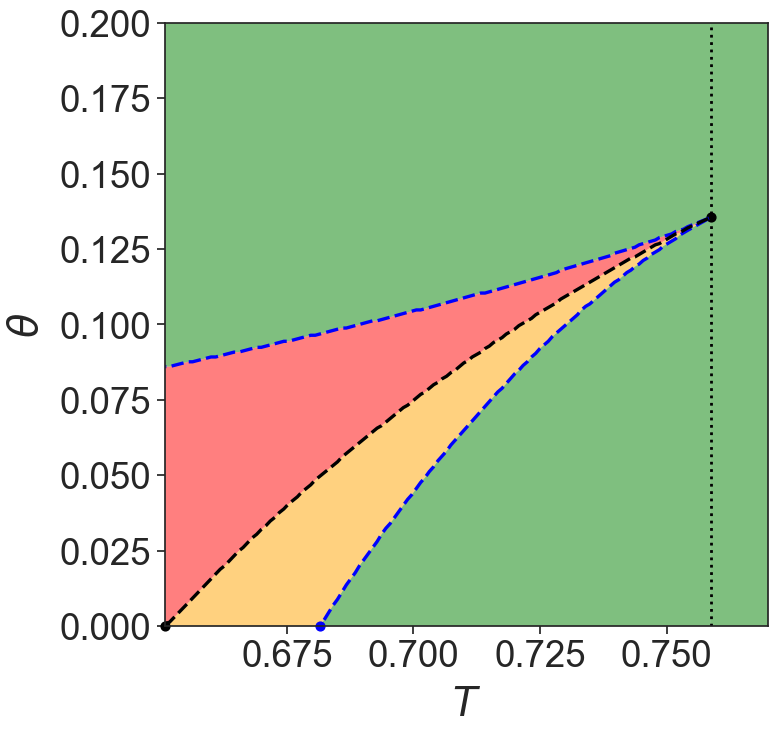

In [1138]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_IT_Deci[sp1_lim:],sp1_IT_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Deci,sp2_IT_Deci,"--",linewidth=2.4, color="blue")
plt.plot(x_IT_Deci[IT_lim:],IT_IT_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_IT_Deci, sp1_IT_Deci, IT_IT_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Deci, sp2_IT_Deci, IT_IT_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Deci, sp2_IT_Deci, 0.2, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_IT_Deci, 0, sp1_IT_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(np.sqrt(3/2*D_lim),np.sqrt(3/2*1.0001),1e-4), 0, 0.2, color='green', alpha=0.5, linewidth=0.)
plt.scatter(np.sqrt(3/2*D_lim),g2_lim,marker="o",color="black",s=40)
plt.scatter(np.sqrt(3/2*Dd),0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(np.sqrt(3/2*D_tab[352]),0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(np.sqrt(3/2*D_lim),0,0.2,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(r"$T$",labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([np.sqrt(3/2*D_tab[352]),0.77])
plt.ylim([0,0.2])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_Deci_IsiT_T.pdf",bbox_inches='tight')

### 3a - Bicoloring, Diffusion

In [1110]:
it_fit = it_fit_diff
sp1_fit = sp1_fit_diff
sp2_fit = sp2_fit_diff

In [1111]:
it_fit

array([ 0.01790988, -0.49172522,  3.15951599])

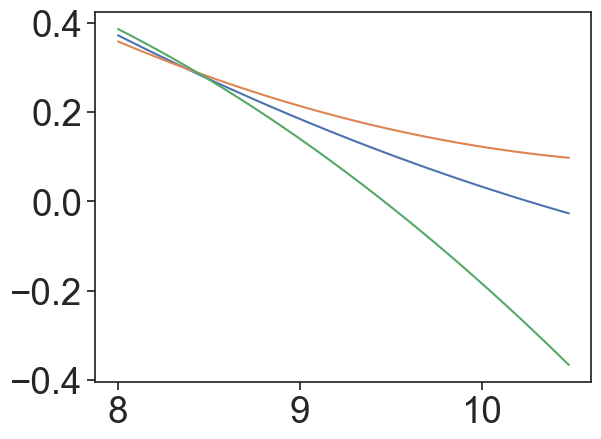

In [1112]:
plt.plot(a_tab,np.polyval(it_fit,a_tab),"-")
plt.plot(a_tab,np.polyval(sp2_fit,a_tab),"-")
plt.plot(a_tab,np.polyval(sp1_fit,a_tab),"-")

In [1113]:
a_tab = np.arange(8.,10.5,0.02)

In [1114]:
x_lim=22
sp1_lim=0
IT_lim=0
g2_lim=0.295
D_lim=8.4
Dd=9.465
alpha_lim=10.27
sp1_COL_Diff = np.concatenate((np.array([g2_lim]), np.polyval(sp1_fit,a_tab)[x_lim:]))
sp2_COL_Diff = np.concatenate((np.array([g2_lim]),np.polyval(sp2_fit,a_tab)[x_lim:]))
IT_COL_Diff = np.concatenate((np.array([g2_lim]),np.polyval(it_fit,a_tab)[x_lim:]))
x_COL_Diff = np.concatenate((np.array([D_lim]),a_tab[x_lim:]))

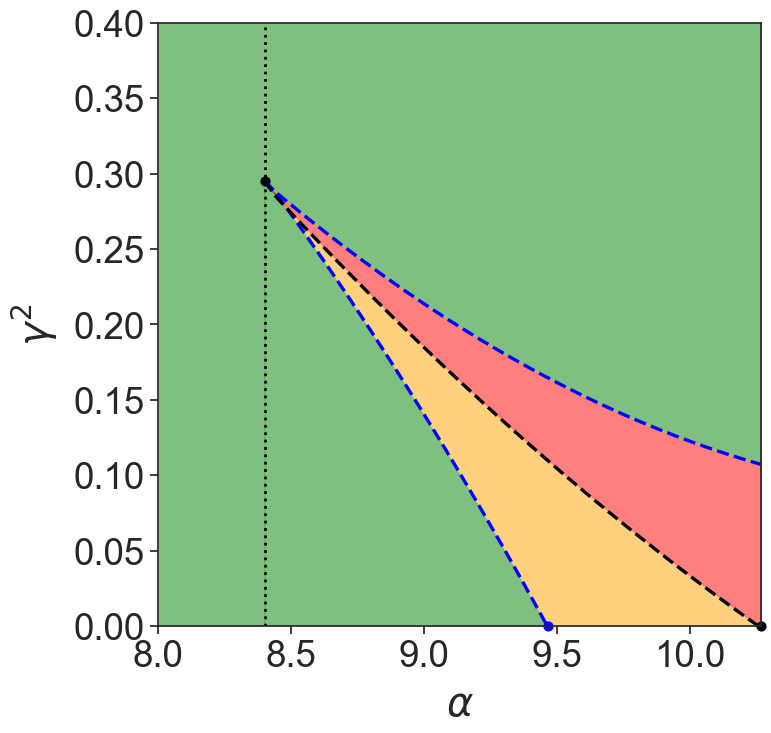

In [1116]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_COL_Diff[sp1_lim:],sp1_COL_Diff[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_COL_Diff,sp2_COL_Diff,"--",linewidth=2.4, color="blue")
plt.plot(x_COL_Diff[IT_lim:],IT_COL_Diff[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_COL_Diff, sp1_COL_Diff, IT_COL_Diff, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_COL_Diff, sp2_COL_Diff, IT_COL_Diff, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_COL_Diff, sp2_COL_Diff, 0.4, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_COL_Diff, 0, sp1_COL_Diff, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(7.9999,D_lim,1e-4), 0, 0.4, color='green', alpha=0.5, linewidth=0.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
plt.scatter(alpha_lim,0,marker="o",color="black",s=40, clip_on=False)
ax.vlines(D_lim,0,0.4,linestyle=":",color="black",linewidth=2.)
ax.set_xlabel(r"$\alpha$",labelpad=10)
ax.set_ylabel(g2_s,labelpad=10)
plt.xlim([8,alpha_lim])
plt.ylim([0,0.4])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_BICOL_C.pdf",bbox_inches='tight')

### 3b - Bicoloring, Decimation

In [1117]:
it_fit = it_fit_deci
sp1_fit = sp1_fit_deci
sp2_fit = sp2_fit_deci
a_tab = np.arange(8.,10.5,0.02)

(0.0, 0.21)

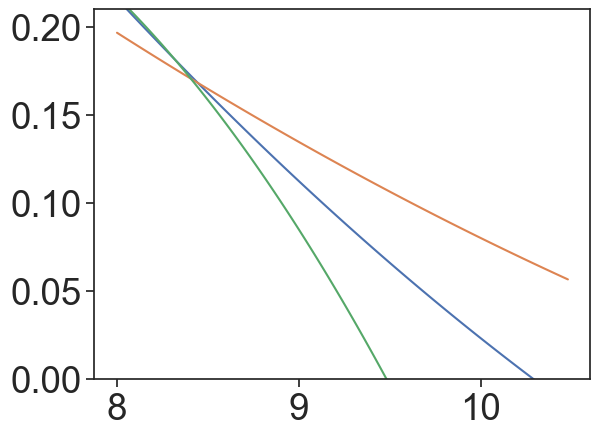

In [1118]:
plt.plot(a_tabb,np.polyval(it_fit,a_tabb),"-")
plt.plot(a_tabb,np.polyval(sp2_fit,a_tabb),"-")
plt.plot(a_tabb,np.polyval(sp1_fit,a_tabb),"-")
plt.ylim([0,0.21])

In [1119]:
alpha_lim = 10.27

In [1120]:
x_lim=21
sp1_lim=0
IT_lim=0
g2_lim=0.172
D_lim=8.4
Dd=9.472
sp1_COL_Deci = np.concatenate((np.array([g2_lim]), np.polyval(sp1_fit,a_tab)[x_lim:]))
sp2_COL_Deci = np.concatenate((np.array([g2_lim]),np.polyval(sp2_fit,a_tab)[x_lim:]))
IT_COL_Deci = np.concatenate((np.array([g2_lim]),np.polyval(it_fit,a_tab)[x_lim:]))
x_COL_Deci = np.concatenate((np.array([D_lim]),a_tab[x_lim:]))

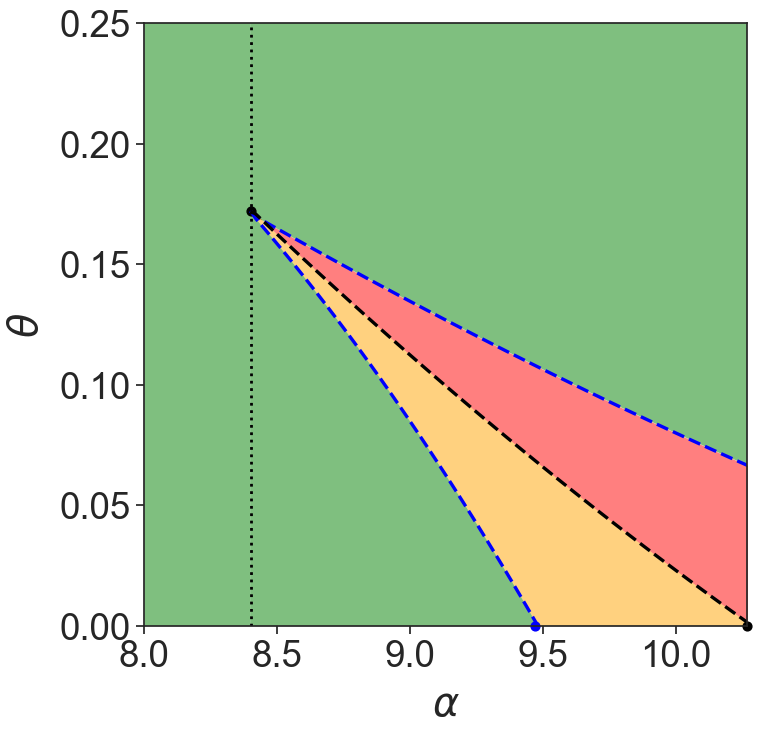

In [1121]:
sns.set_theme(font_scale=2.4, style="ticks")
fig,ax = plt.subplots(figsize=(9,8))
#ax.set_facecolor("green")
plt.plot(x_COL_Deci[sp1_lim:],sp1_COL_Deci[sp1_lim:],"--",linewidth=2.4, color="blue")
plt.plot(x_COL_Deci,sp2_COL_Deci,"--",linewidth=2.4, color="blue")
plt.plot(x_COL_Deci[IT_lim:],IT_COL_Deci[IT_lim:],"--",linewidth=2.4, color="black")
plt.fill_between(x_COL_Deci, sp1_COL_Deci, IT_COL_Deci, color='orange', alpha=0.5, linewidth=0.0)
plt.fill_between(x_COL_Deci, sp2_COL_Deci, IT_COL_Deci, color='red', alpha=0.5, linewidth=0.0)
plt.fill_between(x_COL_Deci, sp2_COL_Deci, 0.4, color='green', alpha=0.5, linewidth=0.0)
plt.fill_between(x_COL_Deci, 0, sp1_COL_Deci, color='green', alpha=0.5, linewidth=0.)
plt.fill_between(np.arange(7.9999,D_lim,1e-4), 0, 0.4, color='green', alpha=0.5, linewidth=0.)
plt.scatter(D_lim,g2_lim,marker="o",color="black",s=40, clip_on=False)
plt.scatter(Dd,0,marker="o",color="blue",s=40, clip_on=False)
ax.vlines(D_lim,0,0.4,linestyle=":",color="black",linewidth=2.)
plt.scatter(alpha_lim,0,marker="o",color="black",s=40, clip_on=False)
ax.set_xlabel(r"$\alpha$",labelpad=10)
ax.set_ylabel(T_s,labelpad=10)
plt.xlim([8,alpha_lim])
plt.ylim([0,0.25])
plt.tight_layout()
ax.set_box_aspect(1)
fig.savefig(f"../Figures/PhD_Deci_BICOL_C.pdf",bbox_inches='tight')